In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import glob
import pingouin as pg
from statsmodels.stats.weightstats import ttest_ind
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, plot_roc_curve
import statsmodels.api as sm
# pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
# !pip install graphviz
# !pip install pydotplus
# conda install graphviz
from six import StringIO
from sklearn import metrics

# File-1: Initial EDA

In [2]:
# df_ne is nonelimination data
# df_urin is urination data
# df_def is defecation data

df_ne=pd.read_csv("C:/Users/ajit.mishra/Downloads/practice/sample_labeled/VA00000000000055/non_elimination6.csv")
df_urin=pd.read_csv("C:/Users/ajit.mishra/Downloads/practice/sample_labeled/VA00000000000055/urination6.csv")
df_def=pd.read_csv("C:/Users/ajit.mishra/Downloads/practice/sample_labeled/VA00000000000055/defecation6.csv")
df_ne.head()

t   lc0   lc1  lc2   lc3  timestamp   sum
0         0 days 00:00:00  1340  2514  641  3356      0.000  7851
1  0 days 00:00:00.025000  1349  2495  627  3536      0.025  8007
2  0 days 00:00:00.050000  1412  2487  610  3508      0.050  8017
3  0 days 00:00:00.075000  1401  2515  604  3552      0.075  8072
4  0 days 00:00:00.100000  1429  2521  576  3517      0.100  8043

In [3]:
df_ne_json = pd.read_json('C:/Users/ajit.mishra/Downloads/practice/sample_labeled/VA00000000000055/non_elimination6.json',lines=True)
df_urin_json = pd.read_json("C:/Users/ajit.mishra/Downloads/practice/sample_labeled/VA00000000000055/urination6.json",lines=True)
df_def_json = pd.read_json("C:/Users/ajit.mishra/Downloads/practice/sample_labeled/VA00000000000055/defecation6.json",lines=True)
df_ne_json

Device_ID                                           Event_ID  \
0  VA00000000000055  RXZlbnRJbmZvcm1hdGlvbjo3ZTRlNWM4ZC02Yjk4LTRkZj...   

           Event_start_time               Tags  Free_text Name_of_cat  \
0 2020-09-09 09:50:37-05:00  [non_elimination]        NaN       Bucks   

   Weight_of_cat  Tare_weight  
0           5113          NaN

In [4]:
#w = Weight of cat 
w_ne = df_ne_json['Weight_of_cat'][0]
w_urin = df_urin_json['Weight_of_cat'][0]
w_def = df_def_json['Weight_of_cat'][0]
w_ne, w_urin, w_def

(5113, 4894, 2236)

## Plots of different features with timestamp

## 1. Load sensor value

### i. Plot of All sensor for non elimination case

In [5]:
sns.set(rc = {'figure.figsize':(10,8)})

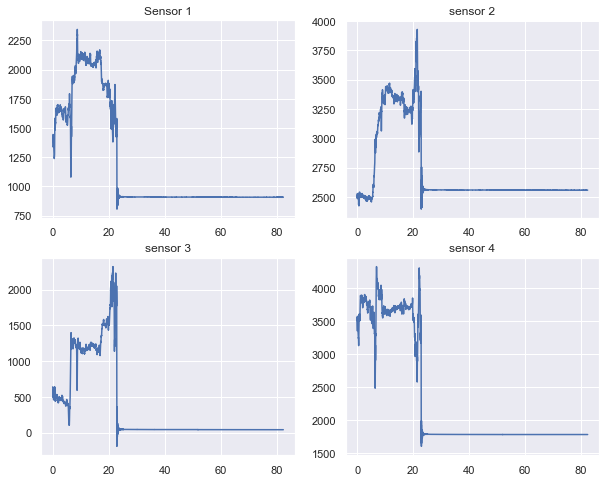

In [6]:
X = df_ne.timestamp
  
Y1 = df_ne.lc0
Y2 = df_ne.lc1
Y3 = df_ne.lc2
Y4 = df_ne.lc3
  
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)

axis[0, 0].plot(X,Y1)
axis[0, 0].set_title("Sensor 1")

axis[0, 1].plot(X, Y2)
axis[0, 1].set_title("sensor 2")
  
axis[1, 0].plot(X, Y3)
axis[1, 0].set_title("sensor 3")
  
axis[1, 1].plot(X, Y4)
axis[1, 1].set_title("sensor 4")

plt.show()

### ii. Plot of all sensor for urination

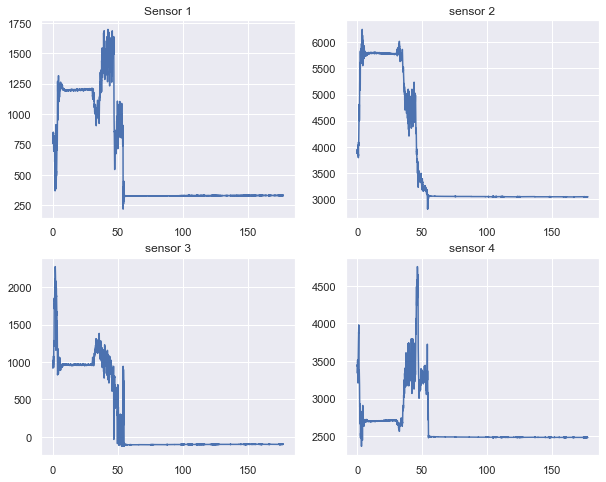

In [7]:
X = df_urin.timestamp
  
Y1 = df_urin.lc0
Y2 = df_urin.lc1
Y3 = df_urin.lc2
Y4 = df_urin.lc3
  
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)

axis[0, 0].plot(X,Y1)
axis[0, 0].set_title("Sensor 1")

axis[0, 1].plot(X, Y2)
axis[0, 1].set_title("sensor 2")
  
axis[1, 0].plot(X, Y3)
axis[1, 0].set_title("sensor 3")
  
axis[1, 1].plot(X, Y4)
axis[1, 1].set_title("sensor 4")

plt.show()

### iii. plot of all sensor for defecation

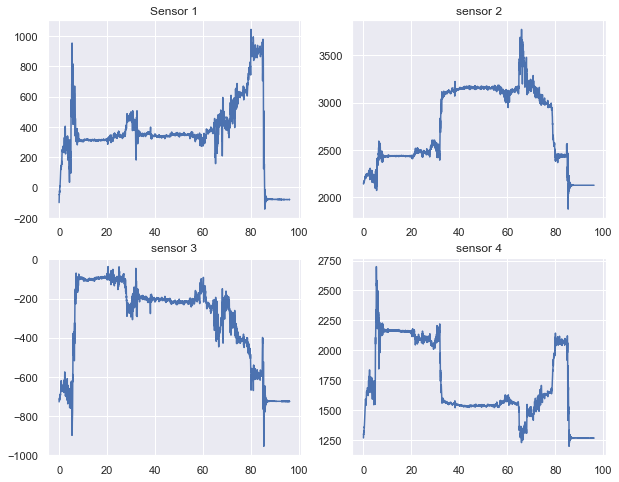

In [8]:
X = df_def.timestamp
  
Y1 = df_def.lc0
Y2 = df_def.lc1
Y3 = df_def.lc2
Y4 = df_def.lc3
  
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)

axis[0, 0].plot(X,Y1)
axis[0, 0].set_title("Sensor 1")

axis[0, 1].plot(X, Y2)
axis[0, 1].set_title("sensor 2")
  
axis[1, 0].plot(X, Y3)
axis[1, 0].set_title("sensor 3")
  
axis[1, 1].plot(X, Y4)
axis[1, 1].set_title("sensor 4")

plt.show()

### iv. Plot of one sensor for all activities

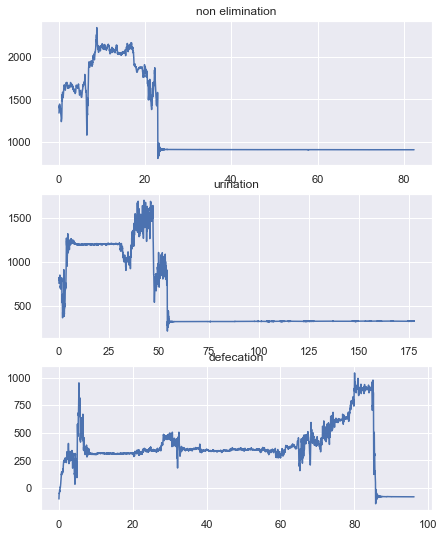

In [9]:
X1 = df_ne.timestamp
X2 = df_urin.timestamp
X3 = df_def.timestamp

Y1 = df_ne.lc0
Y2 = df_urin.lc0
Y3 = df_def.lc0

figure, axis = plt.subplots(3,1, figsize=(7,9))

axis[0].plot(X1,Y1)
axis[0].set_title("non elimination")

axis[1].plot(X2, Y2)
axis[1].set_title("urination")

axis[2].plot(X3, Y3)
axis[2].set_title("defecation")

plt.show()

## 2. Change in load

In [10]:
df_ne['diff_lc0']= df_ne['lc0'].diff()
df_ne['diff_lc1']= df_ne['lc1'].diff()
df_ne['diff_lc2']= df_ne['lc2'].diff()
df_ne['diff_lc3']= df_ne['lc3'].diff()
df_ne.head()

t   lc0   lc1  lc2   lc3  timestamp   sum  diff_lc0  \
0         0 days 00:00:00  1340  2514  641  3356      0.000  7851       NaN   
1  0 days 00:00:00.025000  1349  2495  627  3536      0.025  8007       9.0   
2  0 days 00:00:00.050000  1412  2487  610  3508      0.050  8017      63.0   
3  0 days 00:00:00.075000  1401  2515  604  3552      0.075  8072     -11.0   
4  0 days 00:00:00.100000  1429  2521  576  3517      0.100  8043      28.0   

   diff_lc1  diff_lc2  diff_lc3  
0       NaN       NaN       NaN  
1     -19.0     -14.0     180.0  
2      -8.0     -17.0     -28.0  
3      28.0      -6.0      44.0  
4       6.0     -28.0     -35.0

In [11]:
df_urin['diff_lc0']= df_urin['lc0'].diff()
df_urin['diff_lc1']= df_urin['lc1'].diff()
df_urin['diff_lc2']= df_urin['lc2'].diff()
df_urin['diff_lc3']= df_urin['lc3'].diff()
# df_urin.head()

In [12]:
df_def['diff_lc0']= df_def['lc0'].diff()
df_def['diff_lc1']= df_def['lc1'].diff()
df_def['diff_lc2']= df_def['lc2'].diff()
df_def['diff_lc3']= df_def['lc3'].diff()
# df_def.head()

### Visualisation of change in load

### i. For Non elemination

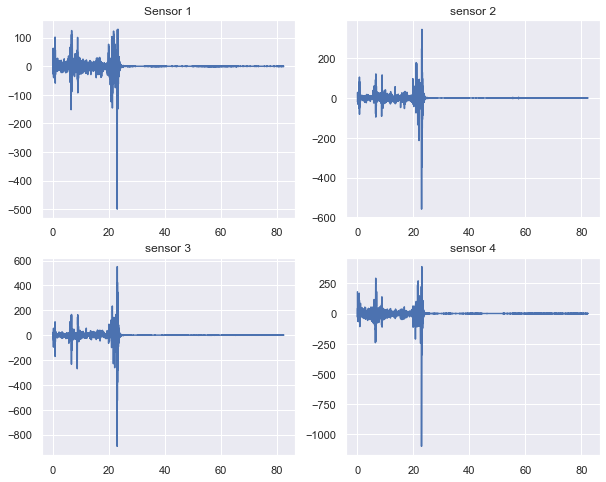

In [13]:
X = df_ne.timestamp
  
Y1 = df_ne.diff_lc0
Y2 = df_ne.diff_lc1
Y3 = df_ne.diff_lc2
Y4 = df_ne.diff_lc3
  
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)

axis[0, 0].plot(X,Y1)
axis[0, 0].set_title("Sensor 1")

axis[0, 1].plot(X, Y2)
axis[0, 1].set_title("sensor 2")
  
axis[1, 0].plot(X, Y3)
axis[1, 0].set_title("sensor 3")
  
axis[1, 1].plot(X, Y4)
axis[1, 1].set_title("sensor 4")

plt.show()

### ii. For Urination

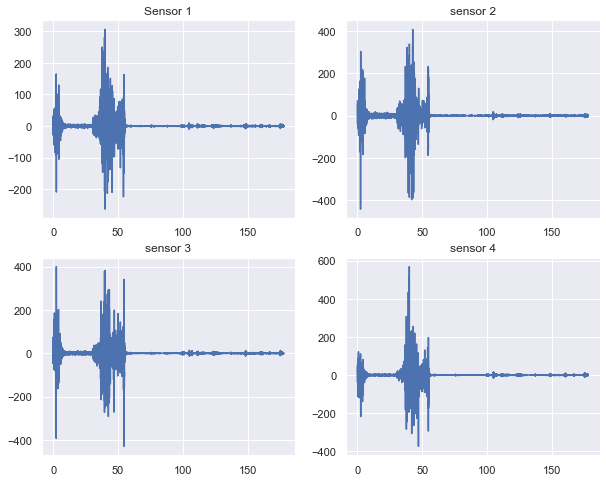

In [14]:
X = df_urin.timestamp
  
Y1 = df_urin.diff_lc0
Y2 = df_urin.diff_lc1
Y3 = df_urin.diff_lc2
Y4 = df_urin.diff_lc3
  
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)

axis[0, 0].plot(X,Y1)
axis[0, 0].set_title("Sensor 1")

axis[0, 1].plot(X, Y2)
axis[0, 1].set_title("sensor 2")
  
axis[1, 0].plot(X, Y3)
axis[1, 0].set_title("sensor 3")
  
axis[1, 1].plot(X, Y4)
axis[1, 1].set_title("sensor 4")

plt.show()

#### Here lesser loads is representing the cat is urinating and the time difference is indicating the cat is urinating in this time period. and higher loads before lesser loads are representing the cat is digging up and the higher loads after the lesser loads are representing the cat is filling his urin

### iii. For Defecation

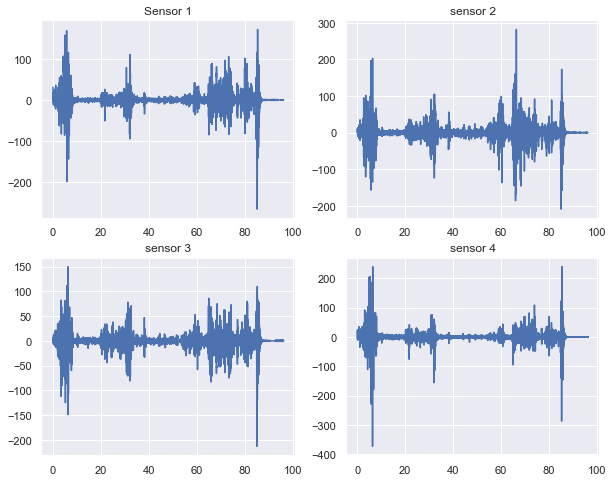

In [15]:
X = df_def.timestamp
  
Y1 = df_def.diff_lc0
Y2 = df_def.diff_lc1
Y3 = df_def.diff_lc2
Y4 = df_def.diff_lc3
  
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)

axis[0, 0].plot(X,Y1)
axis[0, 0].set_title("Sensor 1")

axis[0, 1].plot(X, Y2)
axis[0, 1].set_title("sensor 2")
  
axis[1, 0].plot(X, Y3)
axis[1, 0].set_title("sensor 3")
  
axis[1, 1].plot(X, Y4)
axis[1, 1].set_title("sensor 4")

plt.show()

#### Here lesser loads is representing the cat is defecating and the time difference is indicating the cat is defecating in this time period. and higher loads before lesser loads are representing the cat is digging up and the higher loads after the lesser loads are representing the cat is filling his defecate

### iv. For all cases

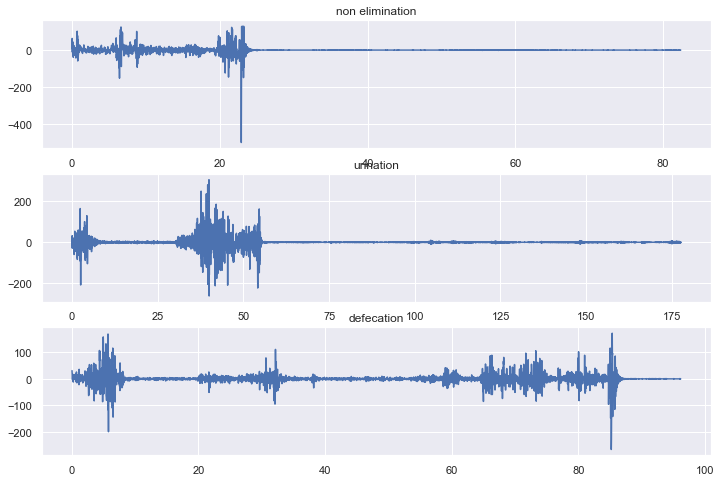

In [16]:
X1 = df_ne.timestamp
X2 = df_urin.timestamp
X3 = df_def.timestamp

Y1 = df_ne.diff_lc0
Y2 = df_urin.diff_lc0
Y3 = df_def.diff_lc0

figure, axis = plt.subplots(3,1, figsize=(12,8))

axis[0].plot(X1,Y1)
axis[0].set_title("non elimination")

axis[1].plot(X2, Y2)
axis[1].set_title("urination")

axis[2].plot(X3, Y3)
axis[2].set_title("defecation")

plt.show()

# File-2: Data Creation:

## 1. Renaming files with it's activity:

### i. Creating a list with all folders name

In [17]:
rootdir = "D:/Ajit/pip/Raw_data"
folder_list = []
for subdir, dirs, files in os.walk(rootdir):
    folder_list.append(subdir)
del folder_list[0]
folder_list

### ii. Changing files name to its activity inside all folders

In [18]:
for loc_folder in folder_list:
    ne=0        # Non-elimination
    ur=0        # Urination
    df=0        # Defecation
    os.chdir(loc_folder)
    for FileList in glob.glob('*.json'):
        loc_json=loc_folder+'/'+FileList
        tag=''
        df_json=pd.read_json(loc_json,lines=True)
        # These are the activities we are interested in:
        activities = ['non_elimination', 'urination', 'defecation']
        for val in df_json['Tags'][0]:
            if val in activities:
                tag=val
                
                if tag=='non_elimination':
                    ne+=1
                    new_name_csv =tag +str(ne)+ ".csv"
                    my_source_csv =loc_json.replace('json','csv')
                    my_dest_csv =loc_folder +('/')+ new_name_csv
                    os.rename(my_source_csv, my_dest_csv)
                    print(my_dest_csv)

                    new_name_json = tag +str(ne)+ ".json"
                    my_source_json = loc_json
                    my_dest_json = loc_folder +('/')+ new_name_json
                    os.rename(my_source_json, my_dest_json)  


                elif tag=='urination':
                    ur+=1
                    new_name_csv =tag +str(ur)+ ".csv"
                    my_source_csv =loc_json.replace('json','csv')
                    my_dest_csv =loc_folder +('/')+ new_name_csv
                    os.rename(my_source_csv, my_dest_csv)
                    print(my_dest_csv)
    
                    new_name_json = tag +str(ur)+ ".json"
                    my_source_json = loc_json
                    my_dest_json = loc_folder +('/')+ new_name_json
                    os.rename(my_source_json, my_dest_json)


                else:
                    df+=1
                    new_name_csv =tag +str(df)+ ".csv"
                    my_source_csv =loc_json.replace('json','csv')
                    my_dest_csv =loc_folder +('/')+ new_name_csv
                    os.rename(my_source_csv, my_dest_csv)
                    print(my_dest_csv)

                    new_name_json = tag +str(df)+ ".json"
                    my_source_json = loc_json
                    my_dest_json = loc_folder +('/')+ new_name_json
                    os.rename(my_source_json, my_dest_json)               
                
            else:
                continue

## 2. Creation of new csv files with outlier Treatment and all features

In [19]:
import os
rootdir = "D:/Ajit/pip/Raw_data/"
folder_list = []
for subdir, dirs, files in os.walk(rootdir):
    folder_list.append(subdir)
del folder_list[0]

### i. Creating empty folder with folder numbers:

In [20]:
# Before this create a new folder in with name 'sample_labeled9' at same location of folder 'Raw data'
for path in folder_list:
    path=path.replace('Raw_data','sample_labeled9')
    os.mkdir(path)

### ii. Outlier treatment with flooring & capping:

In [21]:
def outlier_capping(col_name):
    Q1 = 0
    Q3 = df[col_name].quantile(0.98)
    IQR = Q3
     
    upper_bound = Q3 + 3.5 * IQR   # Whisker width is 3.5
    no_upper_outlier=len(df[df[col_name]>upper_bound])
    print("number of outlier: "+str(no_upper_outlier))
    df[col_name]=np.where(df[col_name]>upper_bound,upper_bound,df[col_name])

### iii. creating new csv files in created folders with outlier treatment and new features:
#### 1.Differential load
#### 2. Sum of absolute value of differential load
#### 3. Acceleration
#### 4. Velocity
#### 5. Energy
#### 6. Power
#### 7. Momentum

In [22]:
# (This code will take an hour to run)
for folder in folder_list:
    path=folder

    for filename in os.listdir(path):
        x=path+'/'+filename
        if filename.endswith(".csv"):
#             print(x) # Print this if you want to track which folder is running while running the code
            df=pd.read_csv(x)
            df_json=pd.read_json(x.replace('csv','json'),lines=True)
# Name, Weight, Start time
            df['name'] = df_json['Name_of_cat'][0]
            df['weight'] = df_json['Weight_of_cat'][0]
            df['start_time'] = df_json['Event_start_time'][0]
# Activity
            activities = ['non_elimination', 'urination', 'defecation']
            tag=""
            for val in df_json['Tags'][0]:
                if val in activities:
                    tag=val

            df['activity']=tag

# difference of load from it's previous load (incremental or decremental load) and converted to abslolute value
            df['diff_lc0'] = df['lc0'].diff().abs()
            df['diff_lc1'] = df['lc1'].diff().abs()
            df['diff_lc2'] = df['lc2'].diff().abs()
            df['diff_lc3'] = df['lc3'].diff().abs()
            
# sum of all the loads as in aggregated datasheet all the load sensor's are corelated so we will work with only sum of all load sensor's differential value
# converting force to newton. It was in gm. Devide with 1000 to convert in kg. Then multiply with g=9.81 to convert it in Newton
            df['diff_load_sum'] = (df['diff_lc0']+df['diff_lc1']+df['diff_lc2']+df['diff_lc3'])*(9.81/1000)
            
# Outlier treatment with Q1=0 (because all differential valus are converted to absolute), Q3=0.98 quantile and whisker width = 3.5 and 
            outlier_capping('diff_load_sum')

# w = Weight of cat in kg
            w = (df_json['Weight_of_cat'][0])/1000
    
## Force = Mass * Acceleration
## Acceleration (a) = Force / Weight of cat (w)
            df['acc']= df['diff_load_sum'].apply(lambda x: x/w)
    
## Jerk = (a2-a1)/0.025         (+ve jerk means jerk felt while acceleration, and _ve jerk means jerk felt while deceleration. We focus only on jerk so, convert it to absolute.)
            df['jerk']= ((df['acc'].diff())/0.025).abs()

## Velocity, v2 = (a1*t) + v1
            df['velo'] = 0
            for i in range (1,len(df)):
                df['velo'][i]=(df['acc'][i]*0.025)+(df['velo'][i-1])              

## Energy in Joule (Kinetic Energy), e = 0.5(w*v**2)       
            df['enr']= df['velo'].apply(lambda x: 0.5*w*(x**2))

## Power in watt = Force * Velocity       
            df['power']= df['velo']*df['diff_load_sum']

## Momentum = Mass * Velocity
            df['mom']=w*df['velo']

            filename = x
            filename=filename.replace('Raw_data','sample_labeled9')

            df.to_csv(filename)

## 3. Creation of Final csv file:
#### Following are the columns:
#### 1. Name
#### 2. Activity
#### 3. Weight
#### 4. Duration 
#### 5. Event time
#### 6. mean of "change in load"
#### 7. Varience
#### 8. Maximum value
#### 9. Skewness
#### 10. Kurtosis
#### 11. 90th percentile
#### 12. Acceleration
#### 13. Jerk
#### 14. Velocity
#### 15. Energy
#### 16. Power
#### 17. Momentum

### i. Creating main csv file with all features name

In [23]:
df_main1 = pd.DataFrame(columns = ['name' ,'activity' ,'weight', 'duration','start_time' ,'change_in_load', 'variance',  'maximum', 'median', 'skewness', 'kurtosis', '0.9_quantile', 'acceleration', 'jerk', 'velocity', 'energy', 'power', 'momentum'])
df_main1

Empty DataFrame
Columns: [name, activity, weight, duration, start_time, change_in_load, variance, maximum, median, skewness, kurtosis, 0.9_quantile, acceleration, jerk, velocity, energy, power, momentum]
Index: []

### ii. Inserting all featurs value in main csv file

In [24]:
def value_insertion(loc_csv):
    df=pd.read_csv(loc_csv)
#     print(loc_csv)
    df_main1.loc[len(df_main1.index)] = [df['name'][0], df['activity'][0], df['weight'][0], df['timestamp'][len(df)-1], df['start_time'][0], df['diff_load_sum'].mean(), df['diff_load_sum'].var(), df['diff_load_sum'].max(), df['diff_load_sum'].median(), df['diff_load_sum'].skew(), df['diff_load_sum'].kurtosis(), df['diff_load_sum'].quantile(0.9), df['acc'].mean(), df['jerk'].mean(), df['velo'].mean(), df['enr'].mean(), df['power'].mean(), df['mom'].mean()]
    return df_main1

In [25]:
rootdir = "D:/Ajit/pip/sample_labeled9"
folder_list = []
for subdir, dirs, files in os.walk(rootdir):
    folder_list.append(subdir)
del folder_list[0]

In [26]:
i=0
for folder in folder_list:
    path=folder
    for filename in os.listdir(path):
        x=path+'/'+filename
#         print(i)  # Print this if you want to track which folder is running while running the code
        value_insertion(x)
        i+=1

In [27]:
# Taking backup of loaded dataset as 'df_main1'
df_main=df_main1.copy()

# File-3: Final EDA & Feature engineering:

### 1. Null values

In [28]:
df_main.isnull().sum()

name              246
activity            3
weight              0
duration            0
start_time          0
change_in_load      0
variance            0
maximum             0
median              0
skewness            0
kurtosis            0
0.9_quantile        0
acceleration        0
jerk               10
velocity            0
energy              0
power               0
momentum            0
dtype: int64

In [29]:
# Filling missing values of cat name with 'unknown' and dropping other null values
df_main['name'].fillna('unknown',inplace=True)
df_main.dropna(inplace=True)
df_main.shape

(13062, 18)

### 2. Outlier Analysis using Boxplot

In [30]:
df_main.groupby(['activity'])['activity'].count()

activity
defecation         2316
non_elimination    4137
urination          6609
Name: activity, dtype: int64

<AxesSubplot: xlabel='activity', ylabel='momentum'>

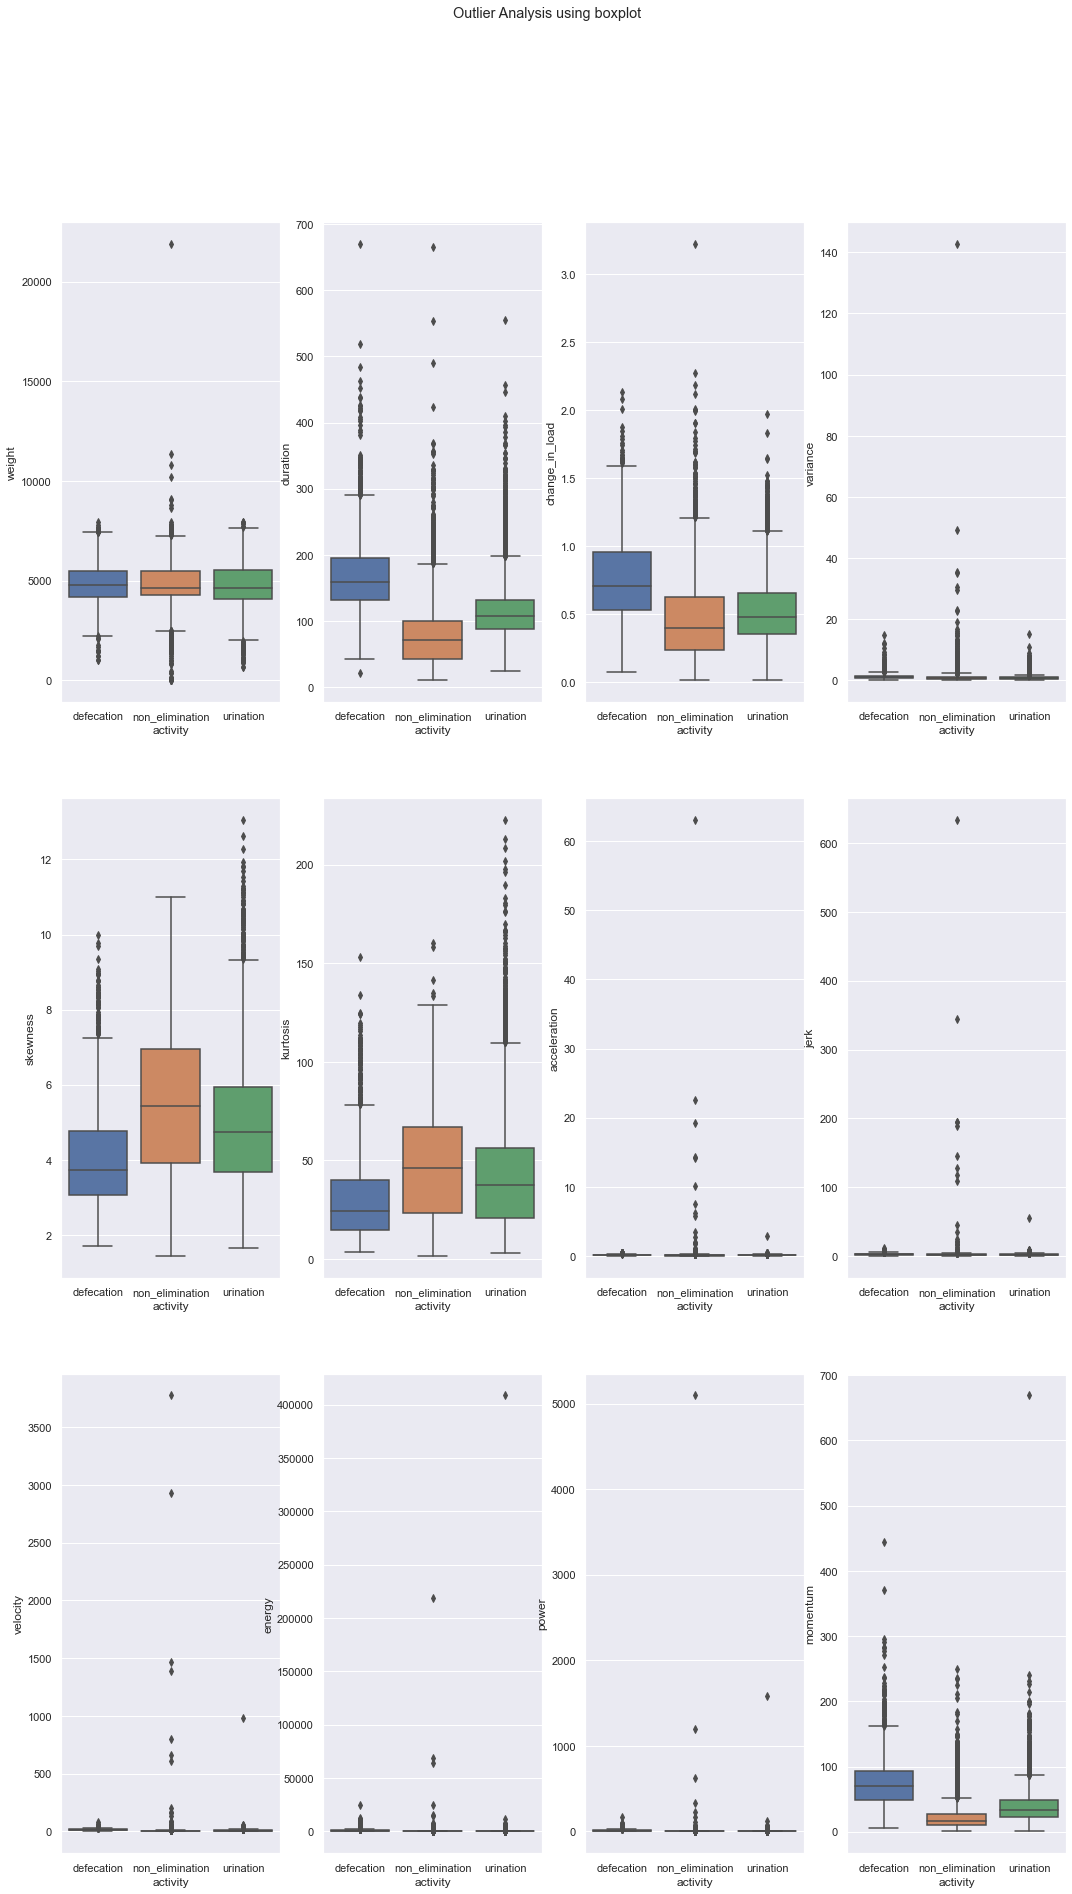

In [31]:
fig, axes = plt.subplots(3, 4, figsize=(18, 30))

fig.suptitle('Outlier Analysis using boxplot')

sns.boxplot(ax=axes[0, 0], data=df_main, x='activity', y='weight')
sns.boxplot(ax=axes[0, 1], data=df_main, x='activity', y='duration')
sns.boxplot(ax=axes[0, 2], data=df_main, x='activity', y='change_in_load')
sns.boxplot(ax=axes[0, 3], data=df_main, x='activity', y='variance')
sns.boxplot(ax=axes[1, 0], data=df_main, x='activity', y='skewness')
sns.boxplot(ax=axes[1, 1], data=df_main, x='activity', y='kurtosis')
sns.boxplot(ax=axes[1, 2], data=df_main, x='activity', y='acceleration')
sns.boxplot(ax=axes[1, 3], data=df_main, x='activity', y='jerk')
sns.boxplot(ax=axes[2, 0], data=df_main, x='activity', y='velocity')
sns.boxplot(ax=axes[2, 1], data=df_main, x='activity', y='energy')
sns.boxplot(ax=axes[2, 2], data=df_main, x='activity', y='power')
sns.boxplot(ax=axes[2, 3], data=df_main, x='activity', y='momentum')

### 3. Outliers removal

In [32]:
# i. Weight Outlier = weight < 1kg (27 Rows) or weight > 8kg (8 Rows)
df_main=df_main[(df_main['weight']>1000) & (df_main['weight']<8000)]

# ii. Activity Duration (15 Rows)
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['duration']>450))]
df_main=df_main[~((df_main['activity']=='non_elimination') & (df_main['duration']>360))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['duration']>400))]

# iii. 'Change in Load' (20 Rows)
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['change_in_load']>1.8))]
df_main=df_main[~((df_main['activity']=='non_elimination') & (df_main['change_in_load']>1.8))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['change_in_load']>1.5))]

# iv. Variance (17 Rows)
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['variance']>8))]
df_main=df_main[~((df_main['activity']=='non_elimination') & (df_main['variance']>15))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['variance']>7))]

# 'Skewness' (4 Rows)
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['skewness']>10))]
df_main=df_main[~((df_main['activity']=='non_elimination') & (df_main['skewness']>11))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['skewness']>12))]

# vii. 'Acceleration' (20 Rows)
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['acceleration']>0.41))]
df_main=df_main[~((df_main['activity']=='non_elimination') & (df_main['acceleration']>0.34))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['acceleration']>0.34))]

# viii. 'Jerk' (22 Rows)
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['jerk']>7))]
df_main=df_main[~((df_main['activity']=='non_elimination') & (df_main['jerk']>6))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['jerk']>5.8))]

# ix. 'Velocity' (23 Rows)
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['velocity']>45))]
df_main=df_main[~((df_main['activity']=='non_elimination') & (df_main['velocity']>32))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['velocity']>34))]

# 'Energy' (34 Rows)
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['energy']>5000))]
df_main=df_main[~((df_main['activity']=='non_elimination') & (df_main['energy']>2100))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['energy']>3000))]

# 'Power' (34 Rows)
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['power']>47))]
df_main=df_main[~((df_main['activity']=='non_elimination') & (df_main['power']>20))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['power']>27))]

# 'Momentum' (21 Rows)
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['momentum']>195))]
df_main=df_main[~((df_main['activity']=='non_elimination') & (df_main['momentum']>125))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['momentum']>135))]

df_main=df_main[~((df_main['activity']=='defecation') & (df_main['energy']>4500))]

df_main.shape

(12817, 18)

#### All boxplot after outlier removal

In [33]:
df_main.describe()

weight      duration  change_in_load      variance       maximum  \
count  12817.000000  12817.000000    12817.000000  12817.000000  12817.000000   
mean    4818.279473    111.208292        0.549610      0.901761     11.725056   
std      947.345484     54.690930        0.299097      0.892892      5.008284   
min     1015.000000     10.398010        0.012697      0.000319      0.176580   
25%     4183.000000     74.374927        0.334998      0.405809      8.328690   
50%     4654.000000    105.574943        0.489939      0.677268     10.967580   
75%     5500.000000    139.974931        0.696825      1.088950     14.146020   
max     7968.000000    436.774948        1.759701     14.785958     51.734408   

             median      skewness      kurtosis  0.9_quantile  acceleration  \
count  12817.000000  12817.000000  12817.000000  12817.000000  12817.000000   
mean       0.230205      4.949550     41.461375      1.355596      0.114684   
std        0.269980      1.721197     26.091677      0.663383      0.058854   
min        0.009810      1.442729      1.633635      0.019620      0.004519   
25%        0.058860      3.559681     19.823761      0.922140      0.071109   
50%        0.127530      4.702922     36.994323      1.320426      0.103130   
75%        0.294300      6.117632     57.990304      1.744218      0.148172   
max        1.265490     11.922505    208.446927      5.052150      0.383762   

               jerk      velocity        energy         power      momentum  
count  12817.000000  12817.000000  12817.000000  12817.000000  12817.000000  
mean       1.925244      8.032658    300.130809      4.586598     38.607415  
std        1.017646      5.731018    459.320711      5.712110     28.443098  
min        0.071433      0.151455      0.046659      0.002055      0.437790  
25%        1.190563      3.756457     40.191538      1.013416     17.542125  
50%        1.744161      6.518796    122.764945      2.371102     30.578279  
75%        2.466053     10.775732    353.962420      5.524999     52.438258  
max        6.936384     39.057109   4455.610817     46.628187    191.997800

In [34]:
df_main2 = df_main[['weight', 'duration', 'change_in_load', 'acceleration', 'jerk','velocity', 'energy', 'power', 'momentum']]
df_main2.columns

Index(['weight', 'duration', 'change_in_load', 'acceleration', 'jerk',
       'velocity', 'energy', 'power', 'momentum'],
      dtype='object')

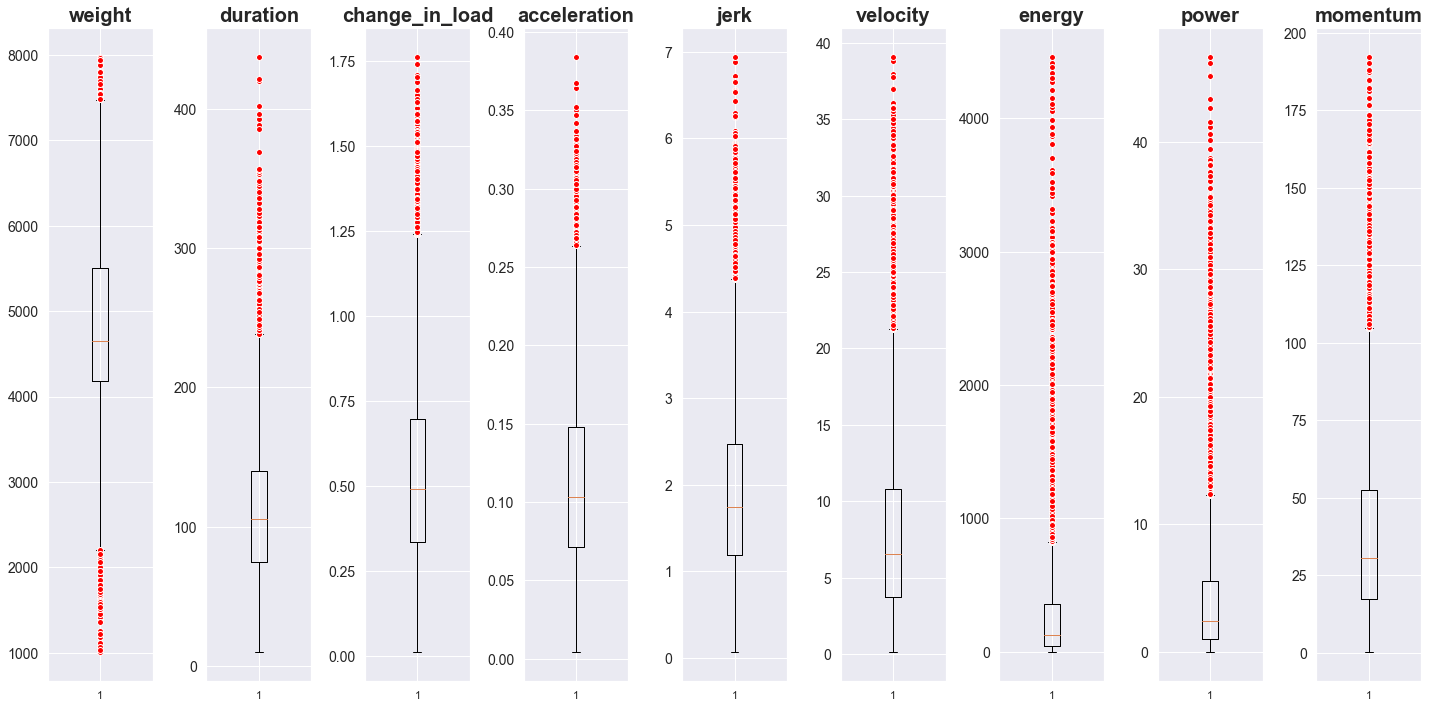

In [35]:
#Creating subplot of each column with its own scale
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df_main2.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_main2.iloc[:,i], flierprops=red_circle)
    ax.set_title(df_main2.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

In [36]:
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['energy']>4500))]

### EDA of Final datasheet:

### 1. Number of rows with different activities

#### i. Defecation, Non_elimination and Urination

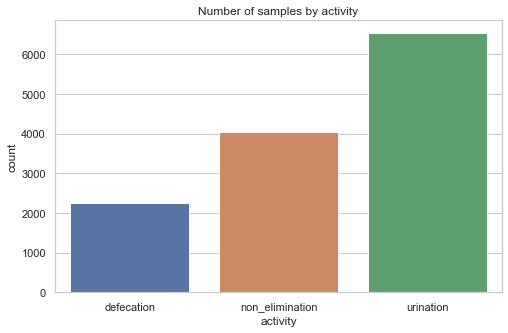

In [37]:
sns.set_style('whitegrid')
plt.figure(figsize = (8, 5))
sns.countplot(x = 'activity', data = df_main)
plt.title('Number of samples by activity')
plt.show()

### Converting urination and defecation to elimination

In [38]:
elemination_condition = ['urination', 'defecation']
df_main['activity1']=df_main['activity'].apply(lambda x: x if x not in elemination_condition else 'elemination')

#### ii. Number of rows with 'Elimination' and 'Non elimination'

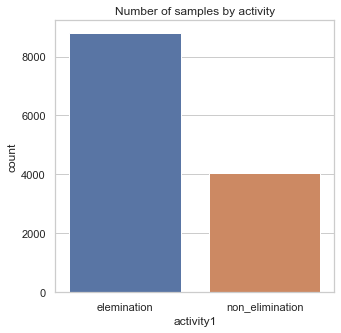

In [39]:
sns.set_style('whitegrid')
plt.figure(figsize = (5, 5))
sns.countplot(x = 'activity1', data = df_main)
plt.title('Number of samples by activity')
plt.show()

#### iii. Number of rows with 'Urination' and 'Defecation'

In [40]:
df_elimination = df_main[df_main['activity'] != 'non_elimination']

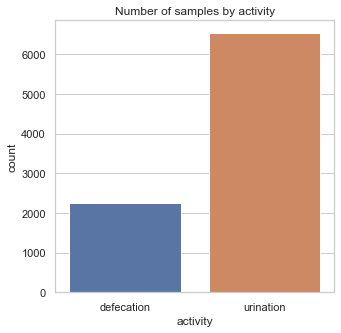

In [41]:
sns.set_style('whitegrid')
plt.figure(figsize = (5, 5))
sns.countplot(x = 'activity', data = df_elimination)
plt.title('Number of samples by activity')
plt.show()

### Distribution plot of "change in load"

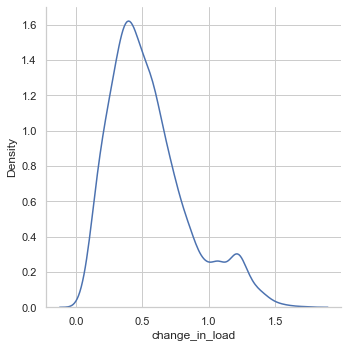

In [42]:
sns.displot(x=df_main['change_in_load'], kind="kde")

### Analysis of Individual cat

#### i. Activity Duration with weight of the cat

<AxesSubplot: xlabel='weight', ylabel='duration'>

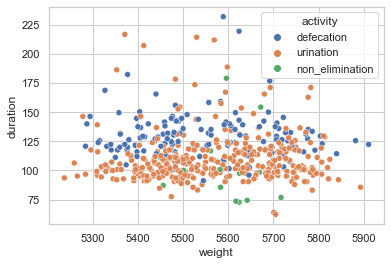

In [43]:
df_Gremlin=df_main[df_main['name']=='Gremlin']
df_Gremlin=df_Gremlin[df_Gremlin['weight']>4500]

plt.figure(figsize=(6,4))
sns.scatterplot(data=df_Gremlin,  x='weight', y='duration', hue='activity')

#### i.e. There are not much variation of activity duration with weight of cat

#### ii. Change in load vs weight of cat

<AxesSubplot: xlabel='weight', ylabel='change_in_load'>

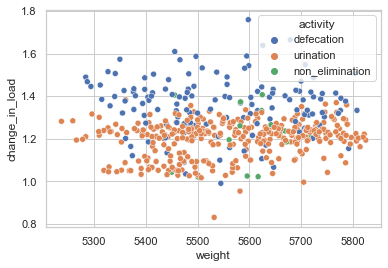

In [44]:
df_Gremlin=df_Gremlin[df_Gremlin['change_in_load']>0.75]

plt.figure(figsize=(6,4))
sns.scatterplot(data=df_Gremlin,  x='weight', y='change_in_load', hue='activity', size=None, style=None, sizes=None)

# Question Answers

### Q. How do the statistical measures (e.g., mean load value, variance etc.) of load sensor data differ for each activity?

In [45]:
df_sum_stat=pd.DataFrame()

df_sum_stat['change_in_load']=df_main.groupby(['activity'])['change_in_load'].mean()
df_sum_stat['variance']=df_main.groupby(['activity'])['variance'].mean()
df_sum_stat['median']=df_main.groupby(['activity'])['median'].mean()
df_sum_stat['skewness']=df_main.groupby(['activity'])['skewness'].mean()
df_sum_stat['kurtosis']=df_main.groupby(['activity'])['kurtosis'].mean()
df_sum_stat['0.9quantile']=df_main.groupby(['activity'])['0.9_quantile'].mean()

#### 1. Table of statistical measures

In [46]:
df_sum_stat.reset_index(inplace=True)
df_sum_stat

activity  change_in_load  variance    median  skewness   kurtosis  \
0       defecation        0.754606  1.165878  0.364262  4.040119  30.393592   
1  non_elimination        0.452967  0.969462  0.160554  5.430961  46.009675   
2        urination        0.538491  0.768751  0.226917  4.966353  42.475020   

   0.9quantile  
0     1.856310  
1     1.133186  
2     1.320014

#### 2. Plot of statistical measures

<AxesSubplot: xlabel='activity', ylabel='0.9quantile'>

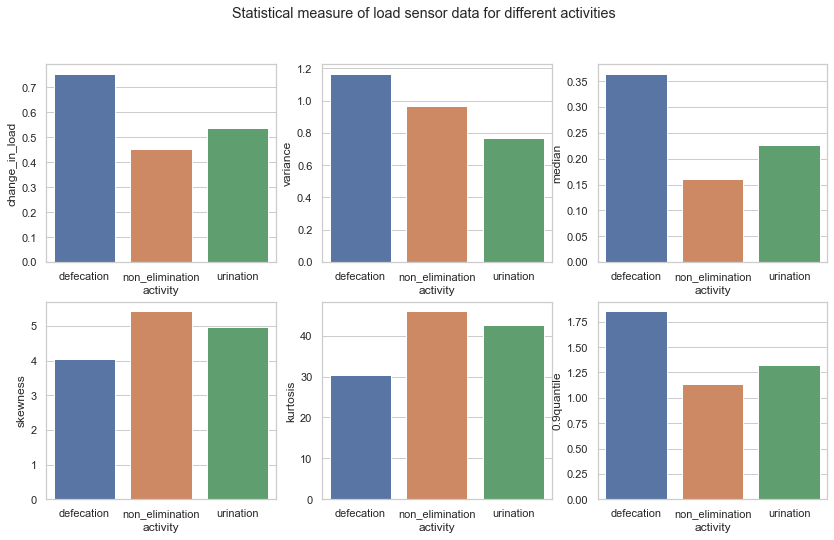

In [47]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8))

fig.suptitle('Statistical measure of load sensor data for different activities')

sns.barplot(ax=axes[0, 0], data=df_sum_stat, x='activity', y='change_in_load')
sns.barplot(ax=axes[0, 1], data=df_sum_stat, x='activity', y='variance')
sns.barplot(ax=axes[0, 2], data=df_sum_stat, x='activity', y='median')
sns.barplot(ax=axes[1, 0], data=df_sum_stat, x='activity', y='skewness')
sns.barplot(ax=axes[1, 1], data=df_sum_stat, x='activity', y='kurtosis')
sns.barplot(ax=axes[1, 2], data=df_sum_stat, x='activity', y='0.9quantile')

### Q. For elimination (defecation and urination) usually the cat digs up the litter, eliminates and covers it up. Does digging up and covering activity differ between urination and defecation? If so, how?

### 1. Hypothesis test to check whether digging and filling process of cat for Urination and Defecation is significantly different or not

In [48]:
df_elimination = df_main[df_main['activity'] != 'non_elimination']
# ~df['Platform'].str.contains('Netflix')

In [49]:
# Null Hypothesis (H0) : The average loadsensor value is same.
# Alternate Hypothesis (Ha) : The average loadsensor value is different for urination and defecation

#### i. One way ANOVA

In [50]:
aov=pg.anova(dv='change_in_load', between='activity', data=df_elimination, detailed=True)
aov

Source          SS    DF         MS          F          p-unc       np2
0  activity   78.286901     1  78.286901  976.62189  2.199122e-203  0.100068
1    Within  704.053283  8783   0.080161        NaN            NaN       NaN

In [51]:
# p-value =~ 0
# Reject Null Hypothesis
# Select Alternate hypothesis

### digging up and covering activity is significantly different between urination and defecation

#### ii. T-test

In [52]:
a=df_elimination[df_elimination['activity']=='urination']['change_in_load']
b=df_elimination[df_elimination['activity']=='defecation']['change_in_load']

ttest_ind(a,b)

(-31.25095022488876, 2.199122431561649e-203, 8783.0)

In [53]:
# t-stat=-33.82
# p-value ~= 0  
# Reject Null Hypothesis
# Select Alternate hypothesis

### digging up and covering activity is significantly different between urination and defecation

### 2. Multiple images of change in load vs timestamp

In [54]:
def multiple_image():
    activity=input("Enter activity (defecation / urination / non_elimination): ")
    file_no=input("Enter file number (017/048/192): ")
    figure, axis = plt.subplots(3,4, figsize=(18,9.5))
    for n in range (1,13):
        df = pd.read_csv("D:\Ajit\pip\sample_labeled6/VA00000000000"+file_no+"/"+activity+str(n)+".csv")
        x=df.timestamp
        y=df.diff_load_sum

        if n%12==1:
            axis[0,0].plot(x,y)
            axis[0,0].set_title(file_no+"_"+activity+"_"+(str(n)))

        elif n%12==2:
            axis[1,0].plot(x,y)
            axis[1,0].set_title(file_no+"_"+activity+"_"+(str(n)))

        elif n%12==3:
            axis[2,0].plot(x,y)
            axis[2,0].set_title(file_no+"_"+activity+"_"+(str(n)))

        elif n%12==4:
            axis[0,1].plot(x,y)
            axis[0,1].set_title(file_no+"_"+activity+"_"+(str(n)))

        elif n%12==5:
            axis[1,1].plot(x,y)
            axis[1,1].set_title(file_no+"_"+activity+"_"+(str(n)))

        elif n%12==6:
            axis[2,1].plot(x,y)
            axis[2,1].set_title(file_no+"_"+activity+"_"+(str(n)))

        elif n%12==7:
            axis[0,2].plot(x,y)
            axis[0,2].set_title(file_no+"_"+activity+"_"+(str(n)))

        elif n%12==8:
            axis[1,2].plot(x,y)
            axis[1,2].set_title(file_no+"_"+activity+"_"+(str(n)))

        elif n%12==9:
            axis[2,2].plot(x,y)
            axis[2,2].set_title(file_no+"_"+activity+"_"+(str(n)))

        elif n%12==10:
            axis[0,3].plot(x,y)
            axis[0,3].set_title(file_no+"_"+activity+"_"+(str(n)))

        elif n%12==11:
            axis[1,3].plot(x,y)
            axis[1,3].set_title(file_no+"_"+activity+"_"+(str(n)))

        elif n%12==0:
            axis[2,3].plot(x,y)
            axis[2,3].set_title(file_no+"_"+activity+"_"+(str(n)))

    # plt.savefig('load_'+file_no+'_'+activity+'1.jpg')

    plt.show()

#### i. Multiple images of Urination

Enter activity (defecation / urination / non_elimination): urination
Enter file number (017/048/192): 037


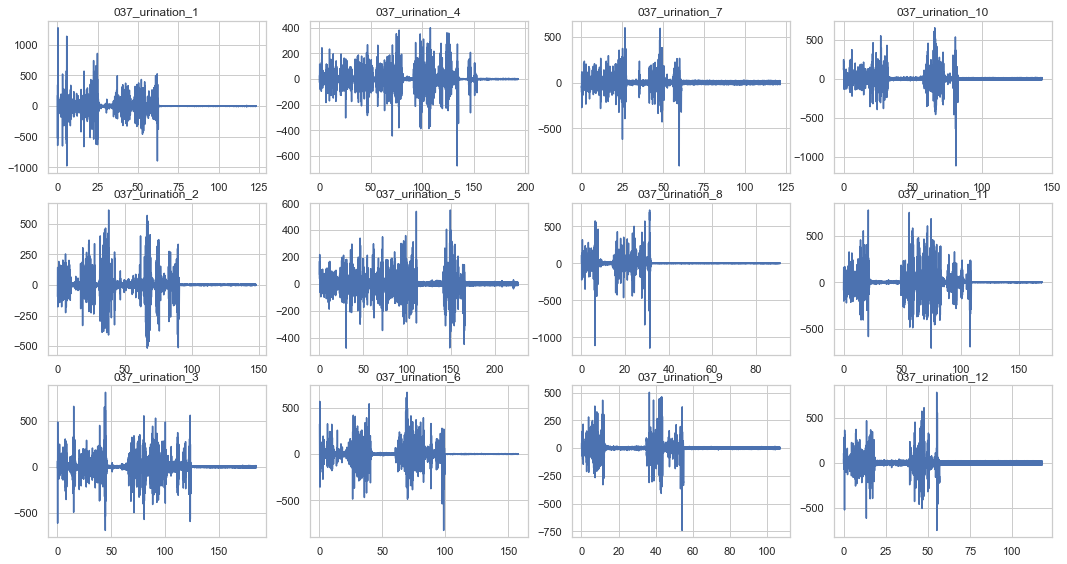

In [55]:
multiple_image()

####  ii. Multiple images of Defecaation

Enter activity (defecation / urination / non_elimination): defecation
Enter file number (017/048/192): 037


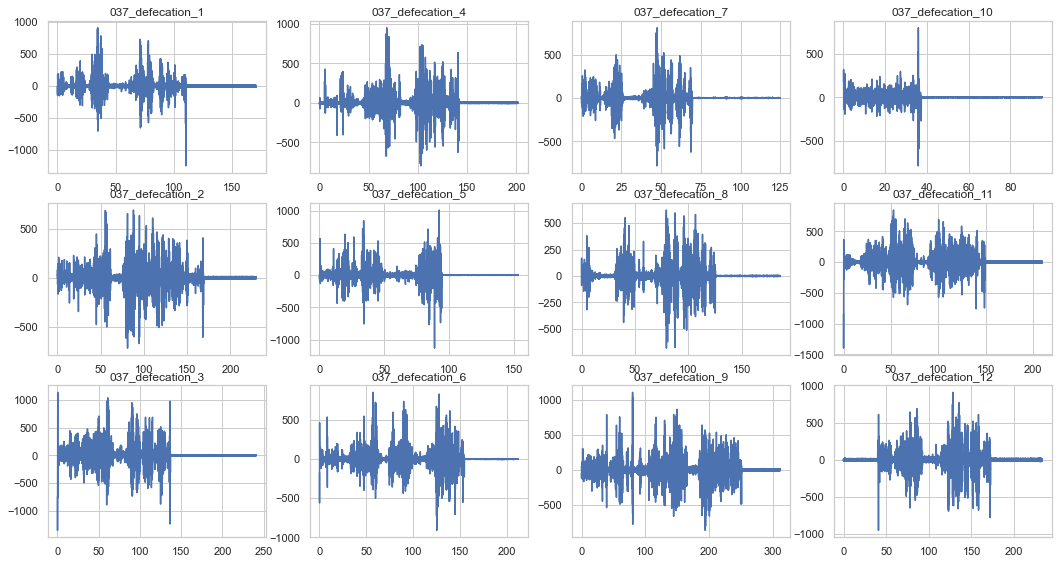

In [56]:
multiple_image()

### Q. Does each cat have a specific behaviour pattern? Are the patterns similar across different cat morphologies?

### 1. Applied Load of different cat with different activities

In [57]:
df_name_activity = pd.DataFrame(df_main.groupby(['name','activity'])['change_in_load'].mean())
df_name_activity.head(6)

change_in_load
name  activity                       
Abby  defecation             0.498415
      non_elimination        0.393147
      urination              0.476755
Azure defecation             0.456924
      non_elimination        0.616895
      urination              0.424277

### 2. Grouping the cats as per their applied load:

In [58]:
df_name = df_main[df_main['name']!='unknown']
df_name = pd.DataFrame(df_name.groupby(['name'])['change_in_load'].mean())

In [59]:
df_name['change_in_load'].min(), df_name['change_in_load'].max()

(0.29212939382733194, 1.2366807464847034)

In [60]:
bins=[0.20,0.40,0.60,0.80,1, 1.25]
df_name['cat_load_type'] = pd.cut(df_name['change_in_load'], bins=bins, labels=['very low', 'low', 'medium', 'moderate', 'high'])
df_name.reset_index()
df_name.head(5)

change_in_load cat_load_type
name                                   
Abby             0.466878           low
Azure            0.589974           low
Betty Lou        0.469304           low
Bill             0.351562      very low
Boots            0.346088      very low

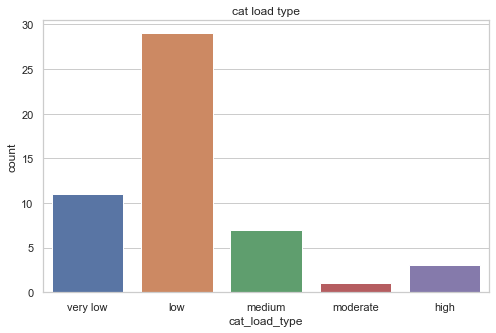

In [61]:
sns.set_style('whitegrid')
plt.figure(figsize = (8, 5))
sns.countplot(x = 'cat_load_type', data = df_name)
plt.title('cat load type')
plt.show()

### Load Catagory
#### 1. Very Low= 0.20-0.40
#### 2. Low = 0.40-0.60
#### 3. Medium= 0.60-0.80
#### 4. Moderate= 0.80-1.00
#### 5. High= 1.00 and above
#### Majority of the cat is applying average differential load between 0.4-0.6 but there are some cat who are applying load more than 1.0 as well

### 3. Hypothesis testing to check all the cat's behavious are significantly different or not:

In [62]:
# Null Hypothesis (H0) : The average loadsensor value is same.
# Alternate Hypothesis (Ha) : The average loadsensor value is different for different cats


# Perform one-way ANOVA analysis as we have 51 cats using one independent variable (mean of sum of differential load).

In [63]:
aov=pg.anova(dv='change_in_load', between='name', data=df_main, detailed=True)
aov

Source          SS     DF        MS           F  p-unc       np2
0    name  506.429844     51  9.929997  198.032962    0.0  0.441715
1  Within  640.077337  12765  0.050143         NaN    NaN       NaN

In [64]:
# p-value ~= 0  
# Reject Null Hypothesis
# Select Alternate hypothesis

### All the cats behaviour is not simmillier

### Q. Explain why and how the features would help classify the activities? 

### Relationship of all the columns with target variable

In [65]:
df_main.columns

Index(['name', 'activity', 'weight', 'duration', 'start_time',
       'change_in_load', 'variance', 'maximum', 'median', 'skewness',
       'kurtosis', '0.9_quantile', 'acceleration', 'jerk', 'velocity',
       'energy', 'power', 'momentum', 'activity1'],
      dtype='object')

In [66]:
df_stat=pd.DataFrame()

In [67]:
df_stat['Duration']=df_main.groupby(['activity'])['duration'].mean()
df_stat['Change_in_load']=df_main.groupby(['activity'])['change_in_load'].mean()
df_stat['Variance']=df_main.groupby(['activity'])['variance'].mean()
df_stat['Maximum']=df_main.groupby(['activity'])['maximum'].mean()
df_stat['Median']=df_main.groupby(['activity'])['median'].mean()
df_stat['Skewness']=df_main.groupby(['activity'])['skewness'].mean()
df_stat['Kurtosis']=df_main.groupby(['activity'])['kurtosis'].mean()
df_stat['0.9_quantile']=df_main.groupby(['activity'])['0.9_quantile'].mean()
df_stat['Acceleration']=df_main.groupby(['activity'])['acceleration'].mean()
df_stat['Jerk']=df_main.groupby(['activity'])['jerk'].mean()
df_stat['Velocity']=df_main.groupby(['activity'])['velocity'].mean()
df_stat['Energy']=df_main.groupby(['activity'])['energy'].mean()
df_stat['Power']=df_main.groupby(['activity'])['power'].mean()
df_stat['Momentum']=df_main.groupby(['activity'])['momentum'].mean()

### 1. Table of mean values of all the variables

In [68]:
df_stat=df_stat.transpose()
df_stat

activity        defecation  non_elimination   urination
Duration        165.515582        78.690760  112.532604
Change_in_load    0.754606         0.452967    0.538491
Variance          1.165878         0.969462    0.768751
Maximum          14.127516        10.860405   11.429302
Median            0.364262         0.160554    0.226917
Skewness          4.040119         5.430961    4.966353
Kurtosis         30.393592        46.009675   42.475020
0.9_quantile      1.856310         1.133186    1.320014
Acceleration      0.156119         0.095394    0.112286
Jerk              2.684904         1.702202    1.800631
Velocity         14.986688         4.606079    7.746997
Energy          835.495795       107.458002  234.220964
Power            10.864355         1.979609    4.028411
Momentum         72.328665        21.667849   37.421950

### 2. Using Box plot

<AxesSubplot: xlabel='activity', ylabel='momentum'>

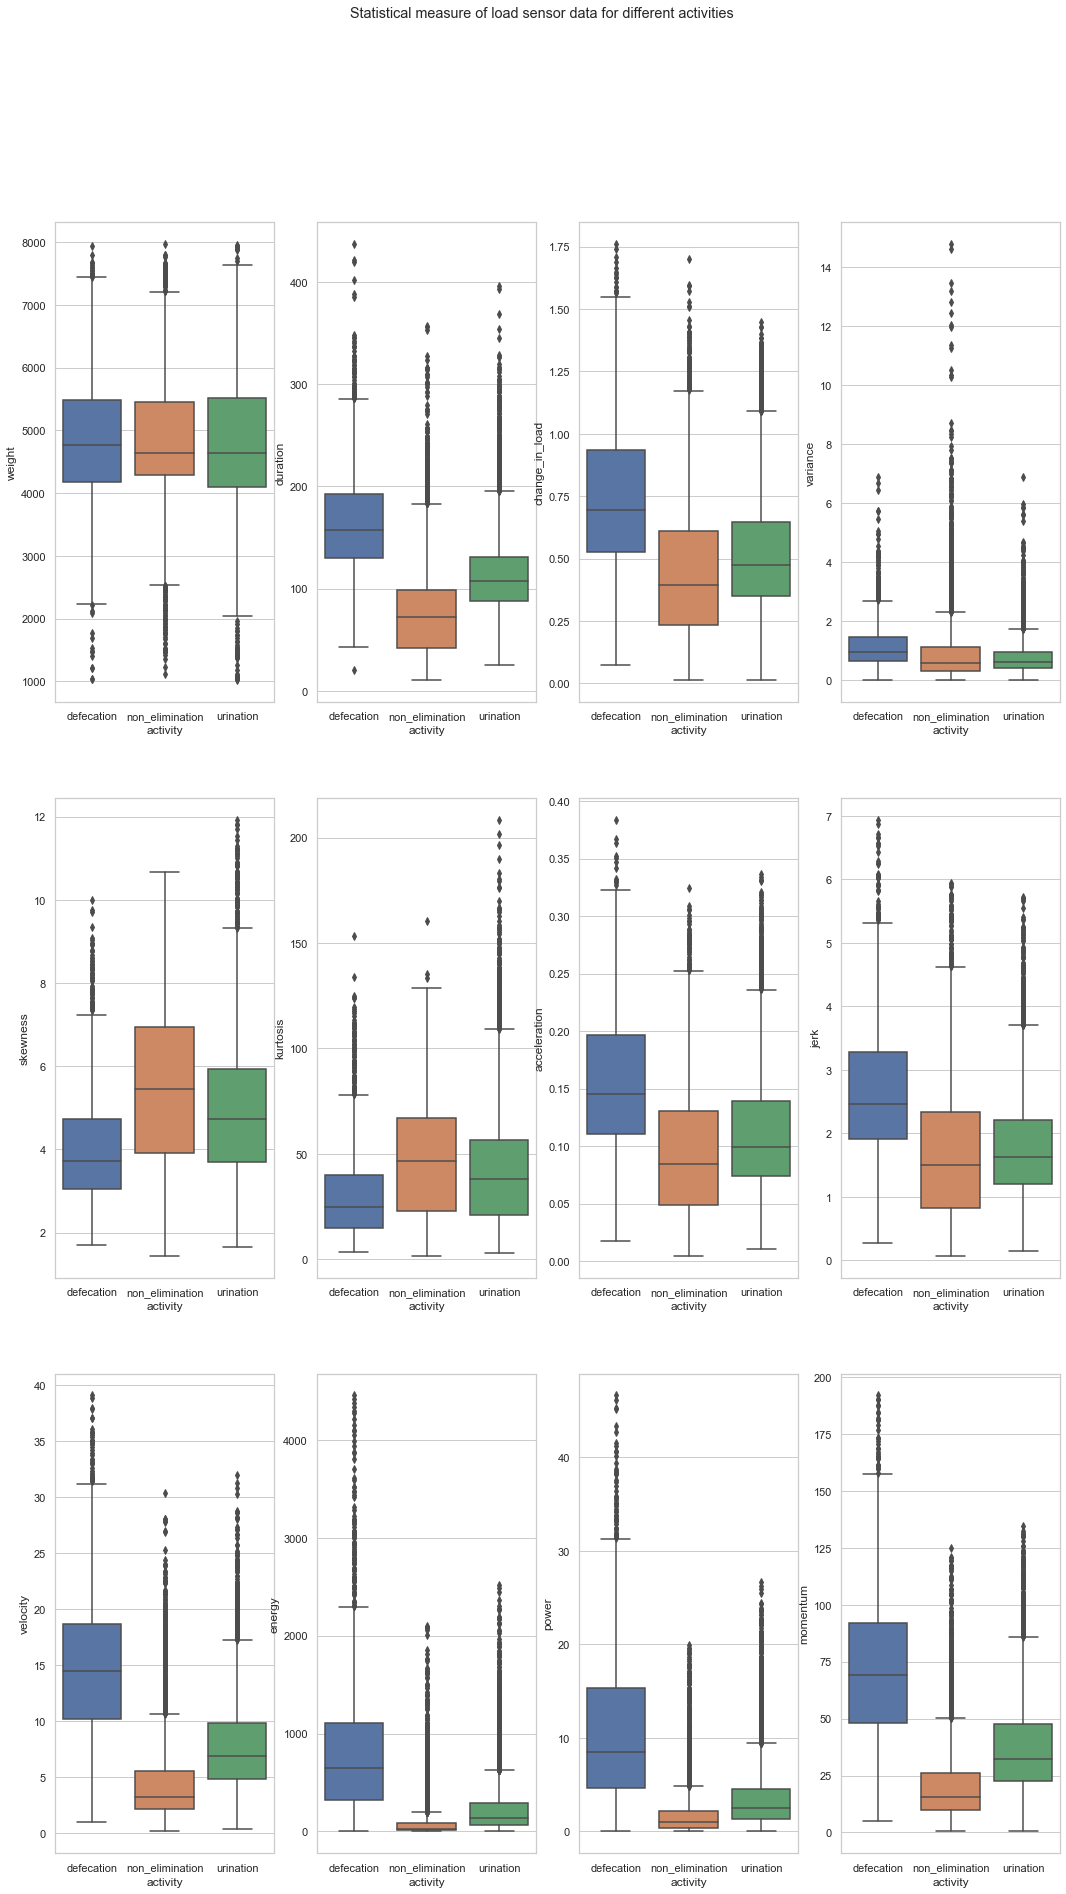

In [69]:
fig, axes = plt.subplots(3, 4, figsize=(18, 30))

fig.suptitle('Statistical measure of load sensor data for different activities')

sns.boxplot(ax=axes[0, 0], data=df_main, x='activity', y='weight')
sns.boxplot(ax=axes[0, 1], data=df_main, x='activity', y='duration')
sns.boxplot(ax=axes[0, 2], data=df_main, x='activity', y='change_in_load')
sns.boxplot(ax=axes[0, 3], data=df_main, x='activity', y='variance')
sns.boxplot(ax=axes[1, 0], data=df_main, x='activity', y='skewness')
sns.boxplot(ax=axes[1, 1], data=df_main, x='activity', y='kurtosis')
sns.boxplot(ax=axes[1, 2], data=df_main, x='activity', y='acceleration')
sns.boxplot(ax=axes[1, 3], data=df_main, x='activity', y='jerk')
sns.boxplot(ax=axes[2, 0], data=df_main, x='activity', y='velocity')
sns.boxplot(ax=axes[2, 1], data=df_main, x='activity', y='energy')
sns.boxplot(ax=axes[2, 2], data=df_main, x='activity', y='power')
sns.boxplot(ax=axes[2, 3], data=df_main, x='activity', y='momentum')

### Correlation

In [70]:
df_corr=df_main.drop(['name', 'activity', 'start_time'],axis=1)

<AxesSubplot: >

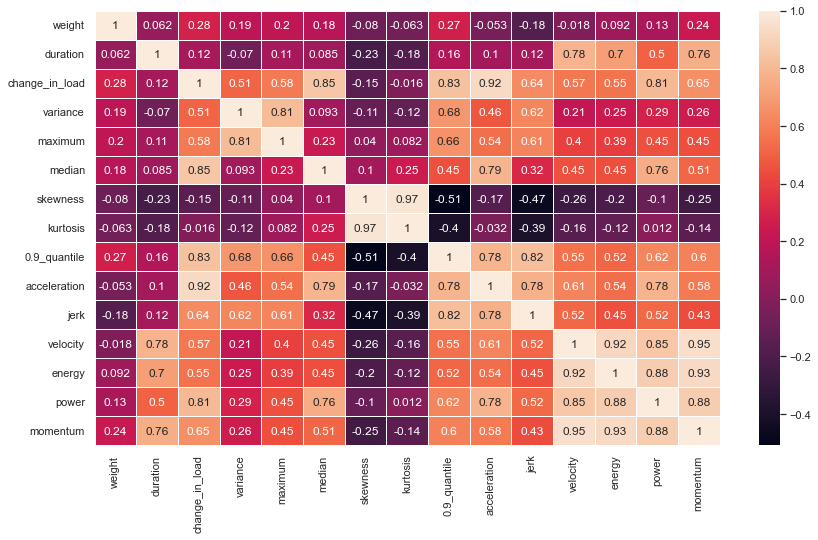

In [71]:
fig, ax = plt.subplots(figsize=(14,8))
sns.heatmap(df_corr.corr(), annot=True, linewidths=.5, ax=ax)

In [72]:
# Change in load ~ acceleration = 0.92
# Change in load ~ 0.9_quantile = 0.85
# Acceleration ~ differential load = 0.92
# skewness ~ kurtosis = 0.97
# velocity ~ energy = 0.92
# velocity ~ power = 0.86
# velocity ~ momentum = 0.95

# File-4: Feature Selection and Modelling for Elimination and Non-elimination

In [73]:
df_main.head()

name    activity  weight    duration                 start_time  \
0  Ryan  defecation    6933  163.975000  2020-08-06 10:08:05-05:00   
1  Ryan  defecation    6451  204.774940  2020-09-08 04:32:58-05:00   
2  Ryan  defecation    7240   59.975000  2020-07-16 23:03:12-05:00   
3  Ryan  defecation    7124  156.775000  2020-08-01 10:19:24-05:00   
4  Ryan  defecation    7150  183.974939  2020-08-12 10:37:19-05:00   

   change_in_load  variance   maximum   median  skewness   kurtosis  \
0        1.114670  2.425972  14.11659  0.43164  2.088879   5.125106   
1        0.996088  2.262248  19.98297  0.32373  2.502551   9.150935   
2        0.292591  0.218968   4.16925  0.05886  2.892435  11.742110   
3        0.952895  2.215583  12.43908  0.23544  2.385345   6.859419   
4        1.174555  3.997131  15.75486  0.14715  2.486553   7.492540   

   0.9_quantile  acceleration      jerk   velocity       energy      power  \
0       3.23730      0.160777  2.623752  18.629980  1422.404601  14.699895   
1       3.06072      0.154408  2.854197  20.030623  1626.238512  15.753942   
2       0.87309      0.040413  0.638543   1.792097    13.463229   0.355113   
3       2.95281      0.133758  2.379447  14.293334   898.360000   9.996573   
4       3.96324      0.164273  2.929181  21.458935  2029.562636  17.758225   

     momentum    activity1  
0  129.161654  elemination  
1  129.217548  elemination  
2   12.974780  elemination  
3  101.825709  elemination  
4  153.431382  elemination

## # Data Preparation
###  1. OnehHot Encoding

In [74]:
# Onehot encoding
df_main=pd.get_dummies(df_main, columns=['activity1'])

# Droping non numeric columns
df_main.drop(['name','activity', 'start_time', 'activity1_non_elimination'],axis=1,inplace=True)

df_main.head()

weight    duration  change_in_load  variance   maximum   median  skewness  \
0    6933  163.975000        1.114670  2.425972  14.11659  0.43164  2.088879   
1    6451  204.774940        0.996088  2.262248  19.98297  0.32373  2.502551   
2    7240   59.975000        0.292591  0.218968   4.16925  0.05886  2.892435   
3    7124  156.775000        0.952895  2.215583  12.43908  0.23544  2.385345   
4    7150  183.974939        1.174555  3.997131  15.75486  0.14715  2.486553   

    kurtosis  0.9_quantile  acceleration      jerk   velocity       energy  \
0   5.125106       3.23730      0.160777  2.623752  18.629980  1422.404601   
1   9.150935       3.06072      0.154408  2.854197  20.030623  1626.238512   
2  11.742110       0.87309      0.040413  0.638543   1.792097    13.463229   
3   6.859419       2.95281      0.133758  2.379447  14.293334   898.360000   
4   7.492540       3.96324      0.164273  2.929181  21.458935  2029.562636   

       power    momentum  activity1_elemination  
0  14.699895  129.161654                      1  
1  15.753942  129.217548                      1  
2   0.355113   12.974780                      1  
3   9.996573  101.825709                      1  
4  17.758225  153.431382                      1

### 4. Upsampling

In [75]:
df_majority = df_main[df_main.activity1_elemination==1]
df_minority = df_main[df_main.activity1_elemination==0]

df_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=0)

df_main = pd.concat([df_majority, df_upsampled])

## # Feature selection using Backward Elimination

### step 1: Data splitting to train, test and validation

In [76]:
df_shuffeled=df_main.sample(frac=1,random_state=101)

df_train=df_shuffeled[:int(len(df_shuffeled)*0.6)]
df_validate=df_shuffeled[int(len(df_shuffeled)*.6):int(len(df_shuffeled)*0.8)]
df_test=df_shuffeled[int(len(df_shuffeled)*0.8):]


x_train = df_train.drop(columns='activity1_elemination')
y_train = df_train['activity1_elemination']

x_validate = df_validate.drop(columns='activity1_elemination')
y_validate = df_validate['activity1_elemination']

x_test = df_test.drop(columns='activity1_elemination')
y_test = df_test['activity1_elemination']

### Step 2: Features coefficient and P-Value evaluation and dropping feature with maximum p val if p-val > 0.05

In [77]:
logit=sm.Logit(y_test, sm.add_constant(x_test)).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                            
=================================================================================
Dep. Variable:     activity1_elemination   No. Observations:                 3514
Model:                             Logit   Df Residuals:                     3498
Method:                              MLE   Df Model:                           15
Date:                   Thu, 15 Dec 2022   Pseudo R-squ.:                     inf
Time:                           14:15:18   Log-Likelihood:                   -inf
converged:                          True   LL-Null:                        0.0000
Covariance Type:               nonrobust   LLR p-value:                     1.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.4187      0.867     -0.483      0.629      -2.118       1.281
weight            -0.0003   9.68e-05     -2.902      0.004      -0.000   -9.12e-05
duration           0.0094      0.002      4.252      0.000       0.005       0.014
change_in_load     3.1399      2.149      1.461      0.144      -1.071       7.351
variance          -2.0135      0.243     -8.289      0.000      -2.490      -1.537
maximum            0.1526      0.023      6.566      0.000       0.107       0.198
median            -6.4205      1.129     -5.688      0.000      -8.633      -4.208
skewness          -0.4541      0.204     -2.225      0.026      -0.854      -0.054
kurtosis           0.0214      0.012      1.746      0.081      -0.003       0.045
0.9_quantile       0.5800      0.495      1.171      0.242      -0.391       1.551
acceleration       8.4527      6.585      1.284      0.199      -4.453      21.358
jerk              -0.5405      0.188     -2.877      0.004      -0.909      -0.172
velocity          -0.1282      0.057     -2.268      0.023      -0.239      -0.017
energy            -0.0037      0.000     -9.973      0.000      -0.004      -0.003
power              0.3547      0.051      6.900      0.000       0.254       0.456
momentum           0.0511      0.013      4.033      0.000       0.026       0.076
==================================================================================
"""

#### Droping the feature with maximum p-value  (0.9_quantile)

In [78]:
x_test.drop(['0.9_quantile'],axis=1,inplace=True)

#### Again Calculating P-value of all features

In [79]:
logit=sm.Logit(y_test, sm.add_constant(x_test)).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                            
=================================================================================
Dep. Variable:     activity1_elemination   No. Observations:                 3514
Model:                             Logit   Df Residuals:                     3499
Method:                              MLE   Df Model:                           14
Date:                   Thu, 15 Dec 2022   Pseudo R-squ.:                     inf
Time:                           14:15:21   Log-Likelihood:                   -inf
converged:                          True   LL-Null:                        0.0000
Covariance Type:               nonrobust   LLR p-value:                     1.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0414      0.803     -0.052      0.959      -1.615       1.532
weight            -0.0003   9.66e-05     -2.927      0.003      -0.000   -9.34e-05
duration           0.0093      0.002      4.202      0.000       0.005       0.014
change_in_load     4.8611      1.560      3.116      0.002       1.804       7.918
variance          -1.9927      0.239     -8.335      0.000      -2.461      -1.524
maximum            0.1510      0.023      6.505      0.000       0.105       0.196
median            -7.3085      0.839     -8.712      0.000      -8.953      -5.664
skewness          -0.5560      0.185     -3.012      0.003      -0.918      -0.194
kurtosis           0.0262      0.012      2.254      0.024       0.003       0.049
acceleration       6.7645      6.339      1.067      0.286      -5.659      19.188
jerk              -0.4463      0.168     -2.661      0.008      -0.775      -0.118
velocity          -0.1335      0.056     -2.373      0.018      -0.244      -0.023
energy            -0.0037      0.000    -10.000      0.000      -0.004      -0.003
power              0.3574      0.051      6.956      0.000       0.257       0.458
momentum           0.0524      0.013      4.154      0.000       0.028       0.077
==================================================================================
"""

#### Droping the feature with maximum p-value  (acceleration) 

In [80]:
x_test.drop(['acceleration'],axis=1,inplace=True)

#### Again Calculating P-value of all features

In [81]:
logit=sm.Logit(y_test, sm.add_constant(x_test)).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                            
=================================================================================
Dep. Variable:     activity1_elemination   No. Observations:                 3514
Model:                             Logit   Df Residuals:                     3500
Method:                              MLE   Df Model:                           13
Date:                   Thu, 15 Dec 2022   Pseudo R-squ.:                     inf
Time:                           14:15:23   Log-Likelihood:                   -inf
converged:                          True   LL-Null:                        0.0000
Covariance Type:               nonrobust   LLR p-value:                     1.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1228      0.790      0.155      0.876      -1.426       1.671
weight            -0.0003   8.33e-05     -4.026      0.000      -0.000      -0.000
duration           0.0090      0.002      4.103      0.000       0.005       0.013
change_in_load     6.0897      1.065      5.718      0.000       4.002       8.177
variance          -2.0555      0.234     -8.785      0.000      -2.514      -1.597
maximum            0.1502      0.023      6.488      0.000       0.105       0.196
median            -7.3920      0.839     -8.812      0.000      -9.036      -5.748
skewness          -0.5326      0.183     -2.908      0.004      -0.892      -0.174
kurtosis           0.0254      0.012      2.197      0.028       0.003       0.048
jerk              -0.3507      0.140     -2.503      0.012      -0.625      -0.076
velocity          -0.1037      0.049     -2.128      0.033      -0.199      -0.008
energy            -0.0038      0.000    -10.190      0.000      -0.005      -0.003
power              0.3622      0.051      7.048      0.000       0.261       0.463
momentum           0.0470      0.012      4.081      0.000       0.024       0.070
==================================================================================
"""

#### Now all the features has p-val < 0.05

In [82]:
x_test.columns

Index(['weight', 'duration', 'change_in_load', 'variance', 'maximum', 'median',
       'skewness', 'kurtosis', 'jerk', 'velocity', 'energy', 'power',
       'momentum'],
      dtype='object')

#### Final features are : 1. 'weight', 2. 'duration', 3. 'change_in_load', 4. 'variance', 5. 'maximum', 6. 'median', 7. 'skewness', 8. 'kurtosis', 9. 'jerk', 10. 'velocity', 11. 'energy', 12.  'power', 13. 'momentum'

## # Modelling

###  Final data

In [83]:
df_main_final=df_main.copy()

In [84]:
# Removed by backward elimination method
df_main_final.drop(['0.9_quantile','acceleration'],axis=1,inplace=True)

# Dropping 'Weight' column as there are no variation shown across activities in boxplot of final EDA
df_main_final.drop(['weight'],axis=1,inplace=True)

In [85]:
# Splitting the data into train, validation and test set

df_shuffeled=df_main_final.sample(frac=1,random_state=101)

df_train=df_shuffeled[:int(len(df_shuffeled)*0.6)]
df_validate=df_shuffeled[int(len(df_shuffeled)*.6):int(len(df_shuffeled)*0.8)]
df_test=df_shuffeled[int(len(df_shuffeled)*0.8):]


x_train = df_train.drop(columns='activity1_elemination')
y_train = df_train['activity1_elemination']

x_validate = df_validate.drop(columns='activity1_elemination')
y_validate = df_validate['activity1_elemination']

x_test = df_test.drop(columns='activity1_elemination')
y_test = df_test['activity1_elemination']

### 1. Modelling with Logistic Regression:

In [86]:
def error_metrics(actual, predicted, x_data):
    print('Accuracy %age: ' + str(np.round(accuracy_score(actual, predicted)*100,2)))
    print('ROC-AUC Score: ' + str(np.round(roc_auc_score(actual, log_reg.predict_proba(x_data)[:,1]),2)))
    print('\nClassification Report: ')
    print(classification_report(actual, predicted))
    print('\nConfusion Matrix: ')
    print(confusion_matrix(actual, predicted))
    return 'Done'

#### i. Training Data


Training
--------------------------
Accuracy %age: 75.66
ROC-AUC Score: 0.83

Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.78      0.76      5267
           1       0.77      0.74      0.75      5275

    accuracy                           0.76     10542
   macro avg       0.76      0.76      0.76     10542
weighted avg       0.76      0.76      0.76     10542


Confusion Matrix: 
[[4093 1174]
 [1392 3883]]

 ROC-AUC Curve for training set


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


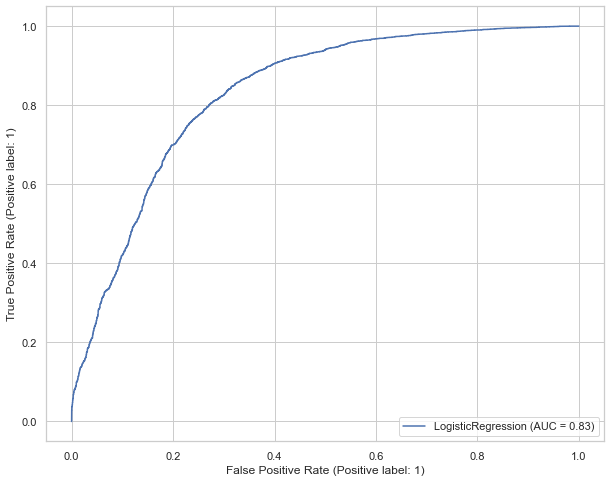

In [87]:
# Training the model with Logistic Regression:
log_reg = LogisticRegression(random_state=10)
log_reg.fit(x_train, y_train)

print('\nTraining\n--------------------------')
y_train_pred=log_reg.predict(x_train)
error_metrics(y_train, y_train_pred, x_train)
print('\n ROC-AUC Curve for training set')
plot_roc_curve(log_reg, x_train, y_train)
plt.show()

#### ii. Validation Data


Validation
--------------------------
Accuracy %age: 76.18
ROC-AUC Score: 0.83

Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.78      0.76      1745
           1       0.77      0.75      0.76      1769

    accuracy                           0.76      3514
   macro avg       0.76      0.76      0.76      3514
weighted avg       0.76      0.76      0.76      3514


Confusion Matrix: 
[[1357  388]
 [ 449 1320]]

 ROC-AUC Curve for validate set


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


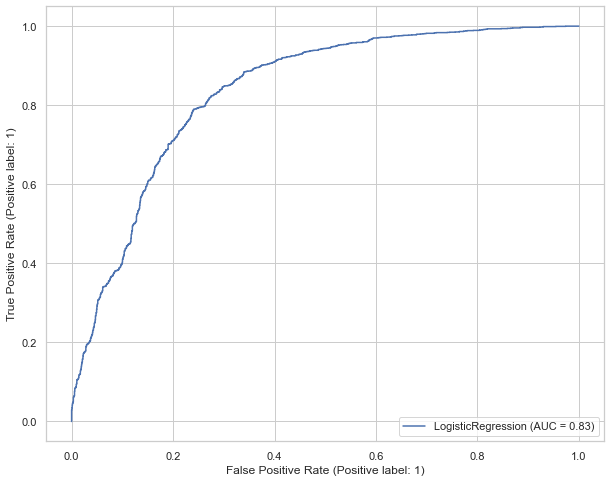

In [88]:
print('\nValidation\n--------------------------')
y_validate_pred=log_reg.predict(x_validate)
error_metrics(y_validate, y_validate_pred, x_validate)
print('\n ROC-AUC Curve for validate set')
plot_roc_curve(log_reg, x_validate, y_validate)
plt.show()

#### iii. Test Data


Testing
--------------------------
Accuracy %age: 74.47
ROC-AUC Score: 0.82

Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1773
           1       0.75      0.73      0.74      1741

    accuracy                           0.74      3514
   macro avg       0.74      0.74      0.74      3514
weighted avg       0.74      0.74      0.74      3514


Confusion Matrix: 
[[1345  428]
 [ 469 1272]]

 ROC-AUC Curve for test set


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


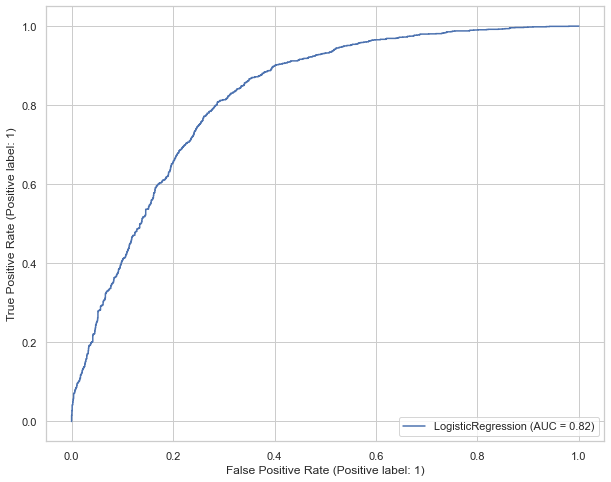

In [89]:
print('\nTesting\n--------------------------')
y_test_pred=log_reg.predict(x_test)
error_metrics(y_test, y_test_pred, x_test)
print('\n ROC-AUC Curve for test set')
plot_roc_curve(log_reg, x_test, y_test)
plt.show()

### 2. Modelling with XG Boost

In [90]:
def error_metrics(actual, predicted, x_data):
    print('Accuracy %age: ' + str(np.round(accuracy_score(actual, predicted)*100,2)))
    print('ROC-AUC Score: ' + str(np.round(roc_auc_score(actual, xgb_grid_search.predict_proba(x_data)[:,1]),2)))
    print('\nClassification Report: ')
    print(classification_report(actual, predicted))
    print('\nConfusion Matrix: ')
    print(confusion_matrix(actual, predicted))
    return 'Done'

In [91]:
xgb_weighted = XGBClassifier(verbsity=0, random_state=3)
grid_list={'nthread':[4], 'objective':['binary:logistic'], 'learning_rate':[0.001, 0.01, 0.03], 
           'max_depth':[5,6,7], 'min_child_weight':[3,4], 'silent':[1],
           'subsample':[0.7], 'colsample_bytree':[0.7],'n_estimators':[100]}
xgb_grid_search = GridSearchCV(estimator=xgb_weighted, param_grid=grid_list, cv=10, n_jobs=4, verbose=False, scoring='roc_auc')
xgb_grid_search.fit(x_train, y_train)
xgb_best_model = xgb_grid_search.best_estimator_

[14:16:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent", "verbsity" } are not used.



#### i. Train Set


Training
--------------------------
Accuracy %age: 86.61
ROC-AUC Score: 0.94

Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      5267
           1       0.82      0.93      0.87      5275

    accuracy                           0.87     10542
   macro avg       0.87      0.87      0.87     10542
weighted avg       0.87      0.87      0.87     10542


Confusion Matrix: 
[[4223 1044]
 [ 368 4907]]

 ROC-AUC Curve for test set


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


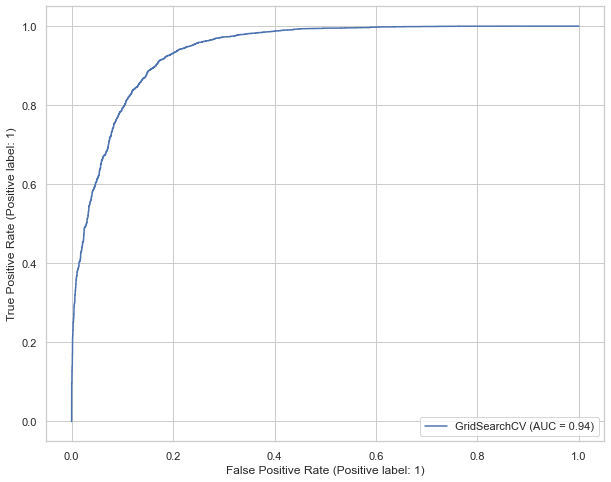

In [92]:
print('\nTraining\n--------------------------')
y_train_pred=xgb_best_model.predict(x_train)
error_metrics(y_train, y_train_pred, x_train)
print('\n ROC-AUC Curve for test set')
plot_roc_curve(xgb_grid_search, x_train, y_train)
plt.show()

#### ii. Validation Set


Validation
--------------------------
Accuracy %age: 83.1
ROC-AUC Score: 0.91

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1745
           1       0.79      0.90      0.84      1769

    accuracy                           0.83      3514
   macro avg       0.84      0.83      0.83      3514
weighted avg       0.84      0.83      0.83      3514


Confusion Matrix: 
[[1322  423]
 [ 171 1598]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


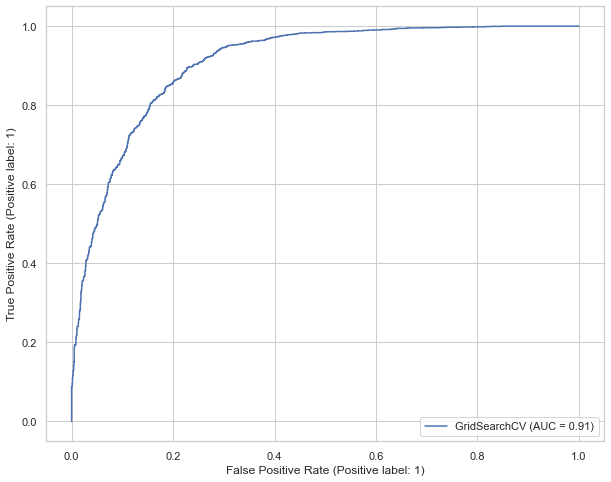

In [93]:
print('\nValidation\n--------------------------')
y_validate_pred=xgb_best_model.predict(x_validate)
error_metrics(y_validate, y_validate_pred, x_validate)
plot_roc_curve(xgb_grid_search, x_validate, y_validate)
plt.show()

#### iii. Test Set


Testing
--------------------------
Accuracy %age: 81.64
ROC-AUC Score: 0.89

Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.75      0.80      1773
           1       0.78      0.88      0.83      1741

    accuracy                           0.82      3514
   macro avg       0.82      0.82      0.82      3514
weighted avg       0.82      0.82      0.82      3514


Confusion Matrix: 
[[1330  443]
 [ 202 1539]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


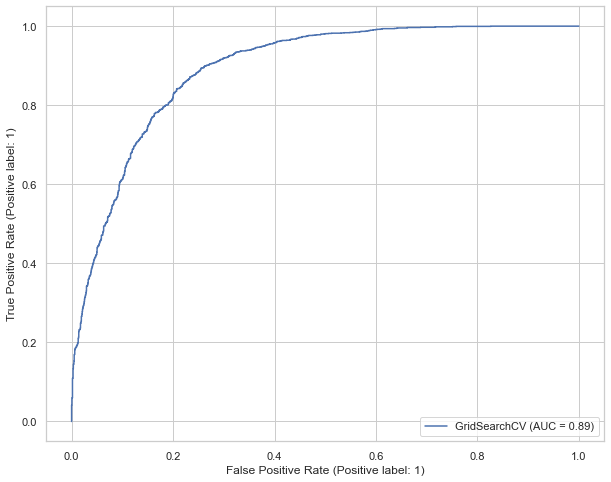

In [94]:
print('\nTesting\n--------------------------')
y_test_pred=xgb_best_model.predict(x_test)
error_metrics(y_test, y_test_pred, x_test)
plot_roc_curve(xgb_grid_search, x_test, y_test)
plt.show()

#### # Feature Importance

In [95]:
xgb_imp_df = pd.DataFrame()
xgb_imp_df['Features'] = x_test.columns
xgb_imp_df['Importance'] = xgb_best_model.feature_importances_
xgb_imp_df = xgb_imp_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
xgb_imp_df

Features  Importance
0         velocity    0.295971
1           energy    0.251070
2         duration    0.089081
3           median    0.057342
4   change_in_load    0.048192
5            power    0.046702
6         variance    0.039433
7             jerk    0.037312
8         momentum    0.036748
9         skewness    0.035690
10         maximum    0.031832
11        kurtosis    0.030628

<AxesSubplot: xlabel='Importance', ylabel='Features'>

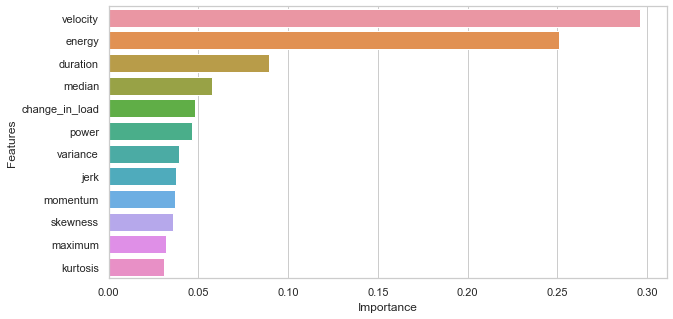

In [96]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Importance', y = 'Features', data = xgb_imp_df)

### 3. Modelling with SVM

In [116]:
def error_metrics(actual, predicted, x_data):
    print('Accuracy %age: ' + str(np.round(accuracy_score(actual, predicted)*100,2)))
    print('ROC-AUC Score: ' + str(np.round(roc_auc_score(actual, classifier.predict_proba(x_data)[:,1]),2)))
    print('\nClassification Report: ')
    print(classification_report(actual, predicted))
    print('\nConfusion Matrix: ')
    print(confusion_matrix(actual, predicted))
    return 'Done'

In [45]:
from sklearn.svm import SVC  
classifier = SVC(kernel='linear', probability=True) 
  
# fitting x samples and y classes 
classifier.fit(x_train, y_train)

SVC(kernel='linear', probability=True)

#### i. Train Set


Training
--------------------------
Accuracy %age: 75.79
ROC-AUC Score: 0.83

Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      5267
           1       0.78      0.72      0.75      5275

    accuracy                           0.76     10542
   macro avg       0.76      0.76      0.76     10542
weighted avg       0.76      0.76      0.76     10542


Confusion Matrix: 
[[4209 1058]
 [1494 3781]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


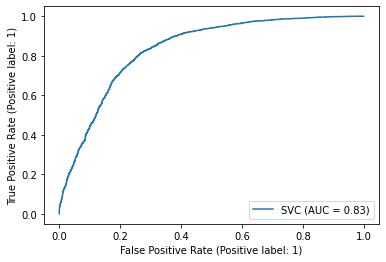

In [46]:
print('\nTraining\n--------------------------')
y_train_pred=classifier.predict(x_train)
error_metrics(y_train, y_train_pred, x_train)
plot_roc_curve(classifier, x_train, y_train)
plt.show()

#### ii. Validation set


Validation
--------------------------
Accuracy %age: 76.55
ROC-AUC Score: 0.84

Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.80      0.77      1745
           1       0.79      0.73      0.76      1769

    accuracy                           0.77      3514
   macro avg       0.77      0.77      0.77      3514
weighted avg       0.77      0.77      0.77      3514


Confusion Matrix: 
[[1392  353]
 [ 471 1298]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


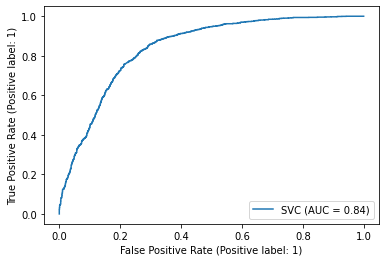

In [47]:
print('\nValidation\n--------------------------')
y_validate_pred=classifier.predict(x_validate)
error_metrics(y_validate, y_validate_pred, x_validate)
plot_roc_curve(classifier, x_validate, y_validate)
plt.show()

#### iii. Test Set


Testing
--------------------------
Accuracy %age: 73.93
ROC-AUC Score: 0.82

Classification Report: 
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1773
           1       0.75      0.71      0.73      1741

    accuracy                           0.74      3514
   macro avg       0.74      0.74      0.74      3514
weighted avg       0.74      0.74      0.74      3514


Confusion Matrix: 
[[1363  410]
 [ 506 1235]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


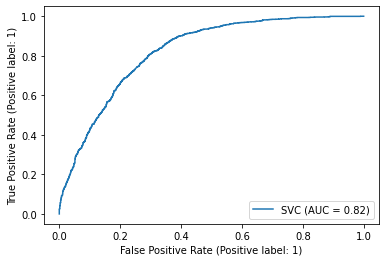

In [48]:
print('\nTesting\n--------------------------')
y_test_pred=classifier.predict(x_test)
error_metrics(y_test, y_test_pred, x_test)
plot_roc_curve(classifier, x_test, y_test)
plt.show()

### 4. Modelling with KNN

In [97]:
def error_metrics(actual, predicted, x_data):
    print('Accuracy %age: ' + str(np.round(accuracy_score(actual, predicted)*100,2)))
    print('ROC-AUC Score: ' + str(np.round(roc_auc_score(actual, classifier.predict_proba(x_data)[:,1]),2)))
    print('\nClassification Report: ')
    print(classification_report(actual, predicted))
    print('\nConfusion Matrix: ')
    print(confusion_matrix(actual, predicted))
    return 'Done'

In [98]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train) 

KNeighborsClassifier(n_neighbors=10)

#### i. Train Set


Training
--------------------------
Accuracy %age: 81.49
ROC-AUC Score: 0.91

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.83      0.82      5267
           1       0.83      0.80      0.81      5275

    accuracy                           0.81     10542
   macro avg       0.82      0.81      0.81     10542
weighted avg       0.82      0.81      0.81     10542


Confusion Matrix: 
[[4396  871]
 [1080 4195]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


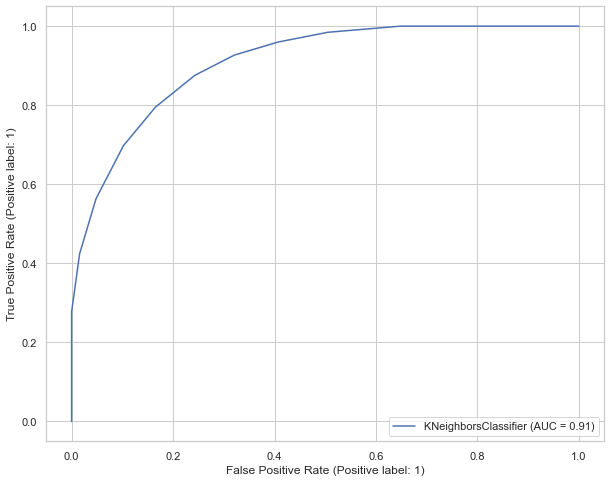

In [99]:
print('\nTraining\n--------------------------')
y_train_pred=classifier.predict(x_train)
error_metrics(y_train, y_train_pred, x_train)
plot_roc_curve(classifier, x_train, y_train)
plt.show()

#### ii. Validation Set


Validation
--------------------------
Accuracy %age: 77.77
ROC-AUC Score: 0.87

Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1745
           1       0.78      0.77      0.78      1769

    accuracy                           0.78      3514
   macro avg       0.78      0.78      0.78      3514
weighted avg       0.78      0.78      0.78      3514


Confusion Matrix: 
[[1371  374]
 [ 407 1362]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


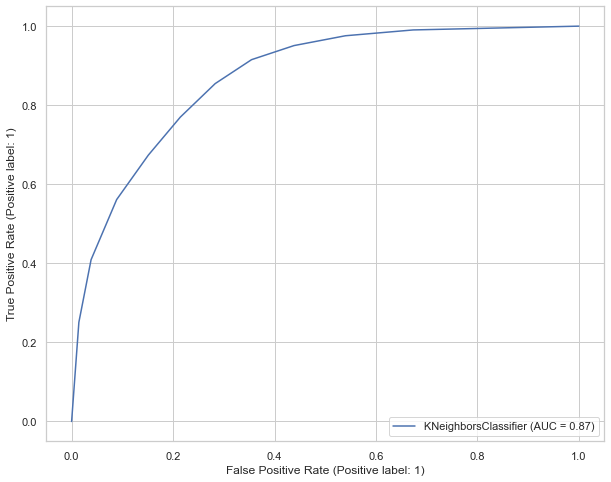

In [100]:
print('\nValidation\n--------------------------')
y_validate_pred=classifier.predict(x_validate)
error_metrics(y_validate, y_validate_pred, x_validate)
plot_roc_curve(classifier, x_validate, y_validate)
plt.show()

#### iii. Test Set


Testing
--------------------------
Accuracy %age: 77.26
ROC-AUC Score: 0.85

Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1773
           1       0.78      0.76      0.77      1741

    accuracy                           0.77      3514
   macro avg       0.77      0.77      0.77      3514
weighted avg       0.77      0.77      0.77      3514


Confusion Matrix: 
[[1392  381]
 [ 418 1323]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


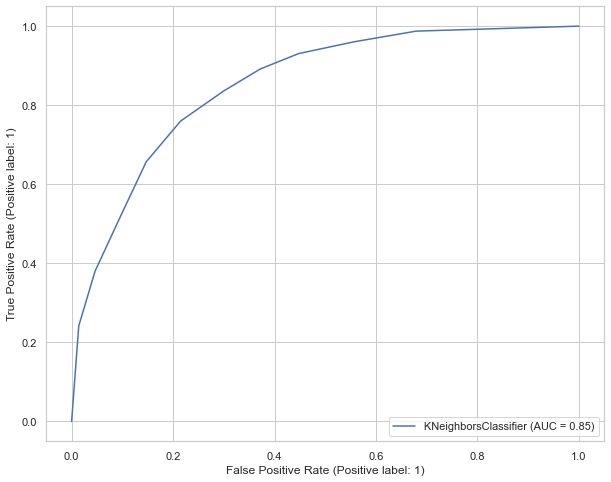

In [101]:
print('\nTesting\n--------------------------')
y_test_pred=classifier.predict(x_test)
error_metrics(y_test, y_test_pred, x_test)
plot_roc_curve(classifier, x_test, y_test)
plt.show()

### 5. Modelling with Decision Tree 

In [102]:
def error_metrics(actual, predicted, x_data):
    print('Accuracy %age: ' + str(np.round(accuracy_score(actual, predicted)*100,2)))
    print('ROC-AUC Score: ' + str(np.round(roc_auc_score(actual, classifier.predict_proba(x_data)[:,1]),2)))
    print('\nClassification Report: ')
    print(classification_report(actual, predicted))
    print('\nConfusion Matrix: ')
    print(confusion_matrix(actual, predicted))
    return 'Done'

#### i. Training Set


Training
--------------------------
Accuracy %age: 86.41
ROC-AUC Score: 0.94

Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      5267
           1       0.83      0.91      0.87      5275

    accuracy                           0.86     10542
   macro avg       0.87      0.86      0.86     10542
weighted avg       0.87      0.86      0.86     10542


Confusion Matrix: 
[[4295  972]
 [ 461 4814]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


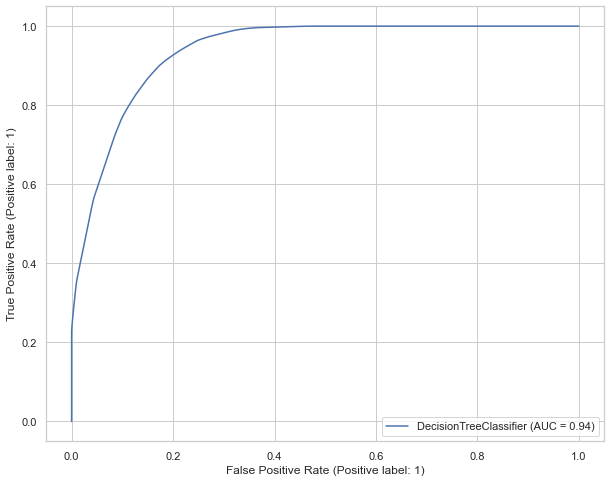

In [103]:
classifier = DecisionTreeClassifier(criterion='entropy', max_depth =10, random_state=10)
classifier.fit(x_train, y_train)

print('\nTraining\n--------------------------')
y_train_pred=classifier.predict(x_train)
error_metrics(y_train, y_train_pred, x_train)
plot_roc_curve(classifier, x_train, y_train)
plt.show()

#### ii. Validation Set


Validation
--------------------------
Accuracy %age: 80.76
ROC-AUC Score: 0.87

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.76      0.80      1745
           1       0.79      0.85      0.82      1769

    accuracy                           0.81      3514
   macro avg       0.81      0.81      0.81      3514
weighted avg       0.81      0.81      0.81      3514


Confusion Matrix: 
[[1334  411]
 [ 265 1504]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


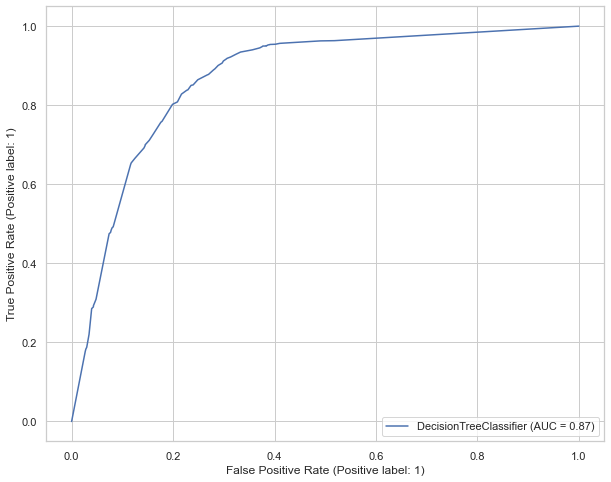

In [104]:
print('\nValidation\n--------------------------')
y_validate_pred=classifier.predict(x_validate)
error_metrics(y_validate, y_validate_pred, x_validate)
plot_roc_curve(classifier, x_validate, y_validate)
plt.show()

#### iii. Test Set


Testing
--------------------------
Accuracy %age: 79.62
ROC-AUC Score: 0.86

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.75      0.79      1773
           1       0.77      0.84      0.80      1741

    accuracy                           0.80      3514
   macro avg       0.80      0.80      0.80      3514
weighted avg       0.80      0.80      0.80      3514


Confusion Matrix: 
[[1329  444]
 [ 272 1469]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


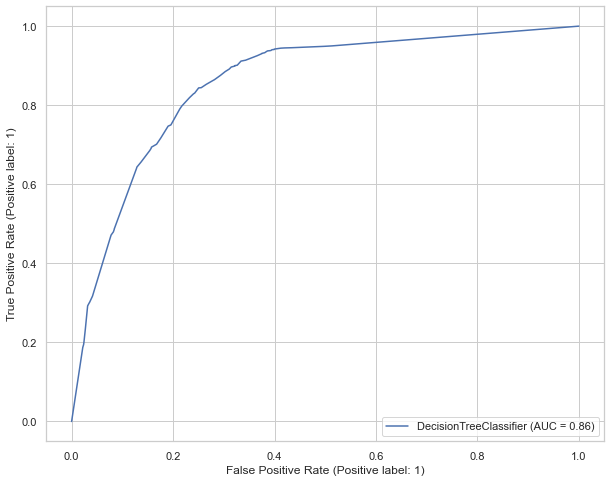

In [105]:
print('\nTesting\n--------------------------')
y_test_pred=classifier.predict(x_test)
error_metrics(y_test, y_test_pred, x_test)
plot_roc_curve(classifier, x_test, y_test)
plt.show()

#### # Feature Importance

In [106]:
dt_df = pd.DataFrame()
dt_df['Features'] = x_test.columns
dt_df['Importance'] = classifier.feature_importances_
dt_df = dt_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
dt_df

Features  Importance
0         velocity    0.392576
1         duration    0.160983
2           median    0.073315
3             jerk    0.060238
4           energy    0.056145
5         skewness    0.050071
6   change_in_load    0.047901
7         variance    0.047344
8         momentum    0.030201
9            power    0.028594
10         maximum    0.027357
11        kurtosis    0.025274

<AxesSubplot: xlabel='Importance', ylabel='Features'>

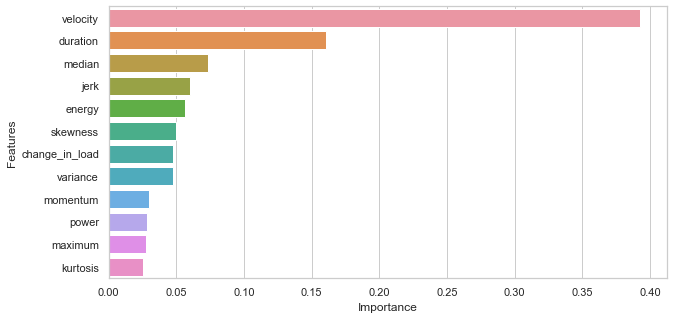

In [107]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Importance', y = 'Features', data = dt_df)

#### # Visualization of tree

In [108]:
x_train.columns

Index(['duration', 'change_in_load', 'variance', 'maximum', 'median',
       'skewness', 'kurtosis', 'jerk', 'velocity', 'energy', 'power',
       'momentum'],
      dtype='object')

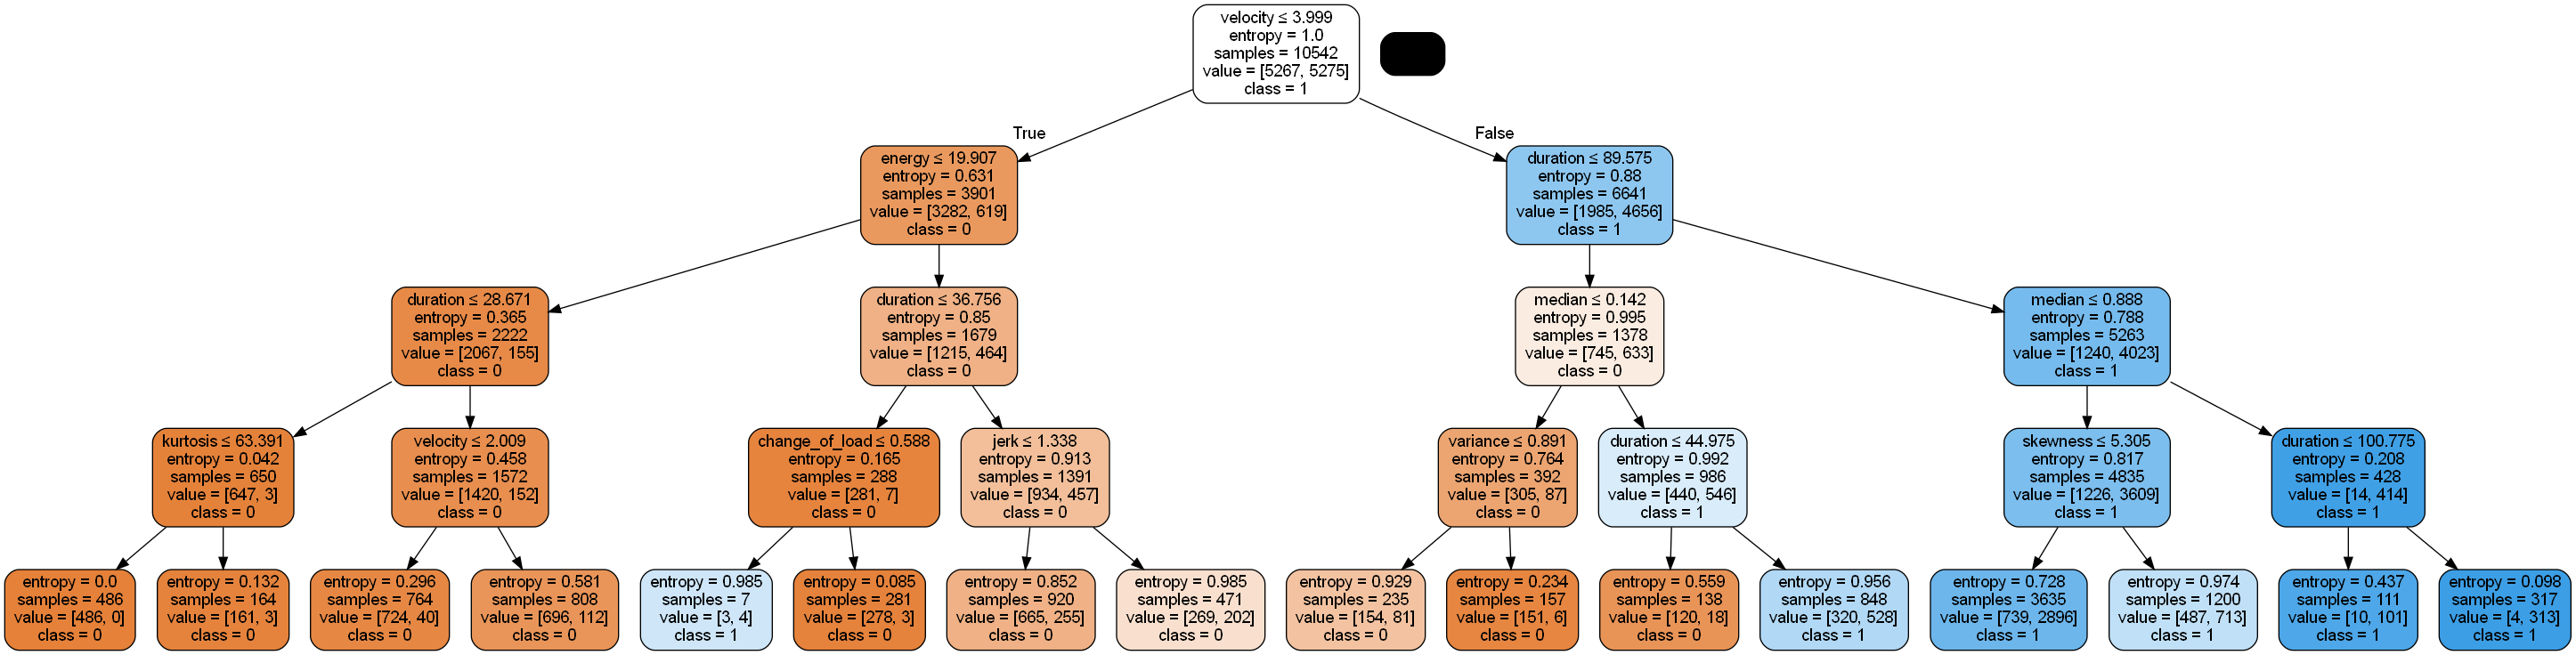

In [109]:
feature_cols=['duration', 'change_of_load', 'variance', 'maximum', 'median',
       'skewness', 'kurtosis', 'jerk', 'velocity', 'energy', 'power',
       'momentum']

# Create Decision Tree classifer object
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
classifier.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = classifier.predict(x_test)

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('main.jpg')
Image(graph.create_png())

### 6. Modelling with Random Forest

In [110]:
def error_metrics(actual, predicted, x_data):
    print('Accuracy %age: ' + str(np.round(accuracy_score(actual, predicted)*100,2)))
    print('ROC-AUC Score: ' + str(np.round(roc_auc_score(actual, classifier.predict_proba(x_data)[:,1]),2)))
    print('\nClassification Report: ')
    print(classification_report(actual, predicted))
    print('\nConfusion Matrix: ')
    print(confusion_matrix(actual, predicted))
    return 'Done'

#### i. Training Set

## ***( As with this hyper parameter I am getting good Valodation and Test result, though Train result is coming 100%, I have used this hyper parameter for best model performance)


Training
--------------------------
Accuracy %age: 99.97
ROC-AUC Score: 1.0

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5267
           1       1.00      1.00      1.00      5275

    accuracy                           1.00     10542
   macro avg       1.00      1.00      1.00     10542
weighted avg       1.00      1.00      1.00     10542


Confusion Matrix: 
[[5265    2]
 [   1 5274]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


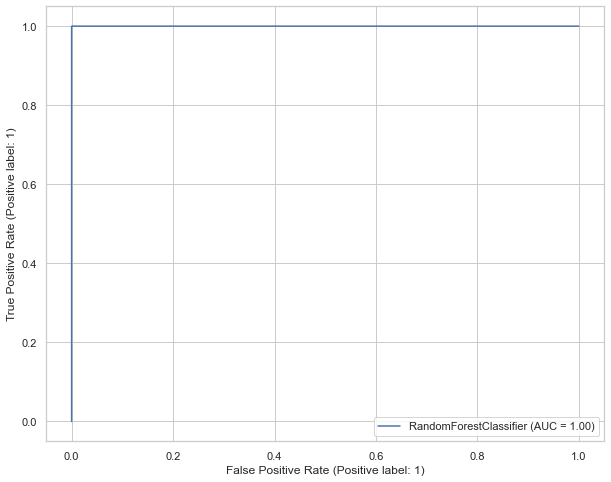

In [111]:
classifier = RandomForestClassifier(n_estimators=55, criterion='entropy',max_depth =35, random_state=10)
classifier.fit(x_train, y_train)

print('\nTraining\n--------------------------')
y_train_pred=classifier.predict(x_train)
error_metrics(y_train, y_train_pred, x_train)
plot_roc_curve(classifier, x_train, y_train)
plt.show()

#### ii. Validation Set


Validation
--------------------------
Accuracy %age: 91.8
ROC-AUC Score: 0.97

Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1745
           1       0.92      0.92      0.92      1769

    accuracy                           0.92      3514
   macro avg       0.92      0.92      0.92      3514
weighted avg       0.92      0.92      0.92      3514


Confusion Matrix: 
[[1604  141]
 [ 147 1622]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


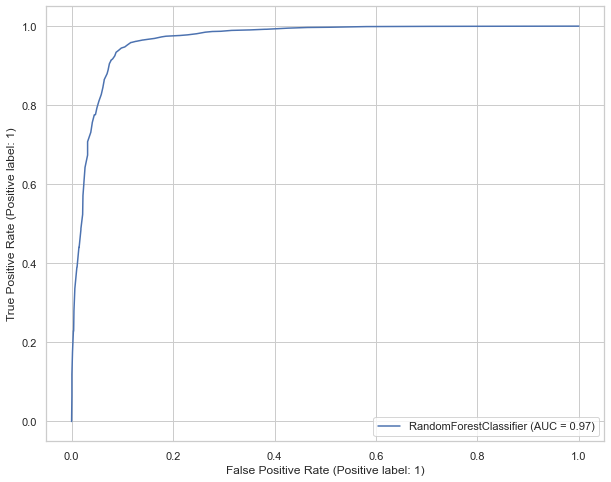

In [112]:
print('\nValidation\n--------------------------')
y_validate_pred=classifier.predict(x_validate)
error_metrics(y_validate, y_validate_pred, x_validate)
plot_roc_curve(classifier, x_validate, y_validate)
plt.show()

#### iii. Test Set


Testing
--------------------------
Accuracy %age: 90.81
ROC-AUC Score: 0.96

Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1773
           1       0.91      0.90      0.91      1741

    accuracy                           0.91      3514
   macro avg       0.91      0.91      0.91      3514
weighted avg       0.91      0.91      0.91      3514


Confusion Matrix: 
[[1618  155]
 [ 168 1573]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


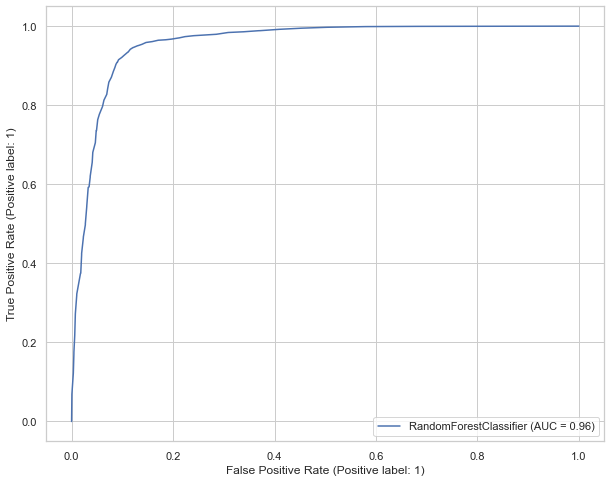

In [113]:
print('\nTesting\n--------------------------')
y_test_pred=classifier.predict(x_test)
error_metrics(y_test, y_test_pred, x_test)
plot_roc_curve(classifier, x_test, y_test)
plt.show()

#### # Feature Importance

In [114]:
RF_df = pd.DataFrame()
RF_df['Features'] = x_test.columns
RF_df['Importance'] = classifier.feature_importances_
RF_df = RF_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
RF_df

Features  Importance
0         velocity    0.138373
1         duration    0.132932
2           energy    0.114559
3         momentum    0.106842
4   change_in_load    0.075884
5            power    0.070602
6             jerk    0.068148
7         variance    0.063502
8           median    0.060501
9         kurtosis    0.057483
10        skewness    0.056963
11         maximum    0.054211

<AxesSubplot: xlabel='Importance', ylabel='Features'>

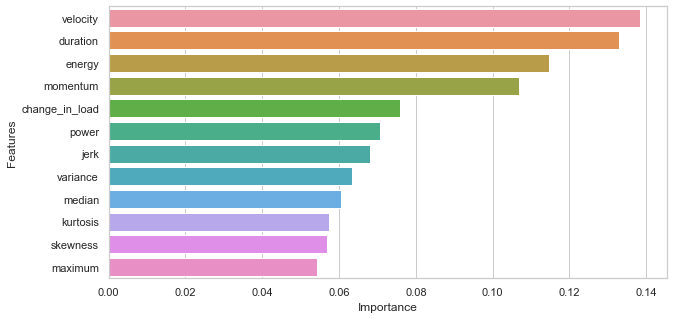

In [115]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Importance', y = 'Features', data = RF_df)

## PDP Plots

In [116]:
# PDPplot is not installing properly so, I am using seaborn to plot PDP plots

In [117]:
from sklearn.inspection import (partial_dependence, PartialDependenceDisplay)

In [118]:
classifier = RandomForestClassifier(n_estimators=55, criterion='entropy',max_depth =35, random_state=10)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=35, n_estimators=55,
                       random_state=10)

#### # Velocity

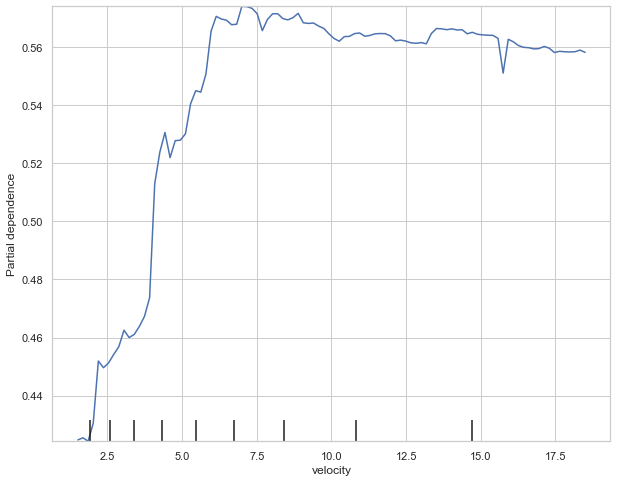

In [119]:
var = 'velocity'
PartialDependenceDisplay.from_estimator(classifier, x_train, [var]);

#### # Duration

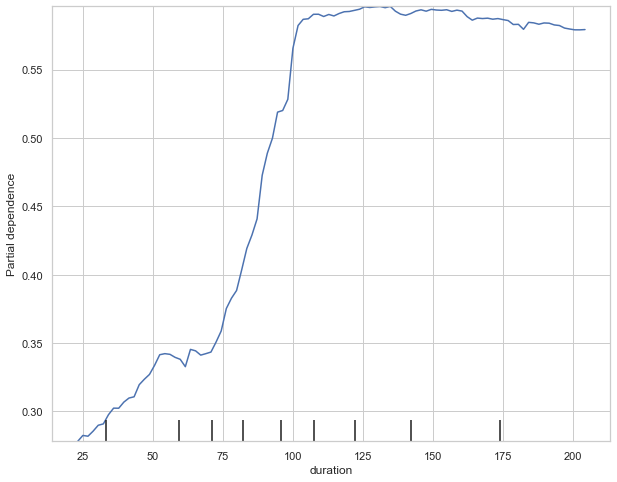

In [120]:
var = 'duration'
PartialDependenceDisplay.from_estimator(classifier, x_train, [var]);

#### # Energy

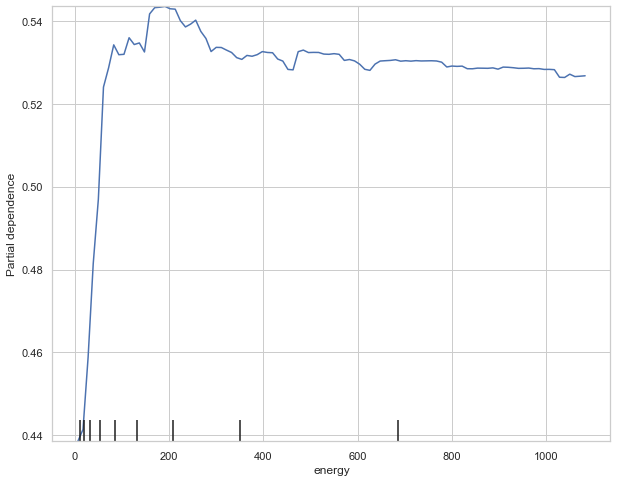

In [121]:
var = 'energy'
PartialDependenceDisplay.from_estimator(classifier, x_train, [var]);

#### # Momentum

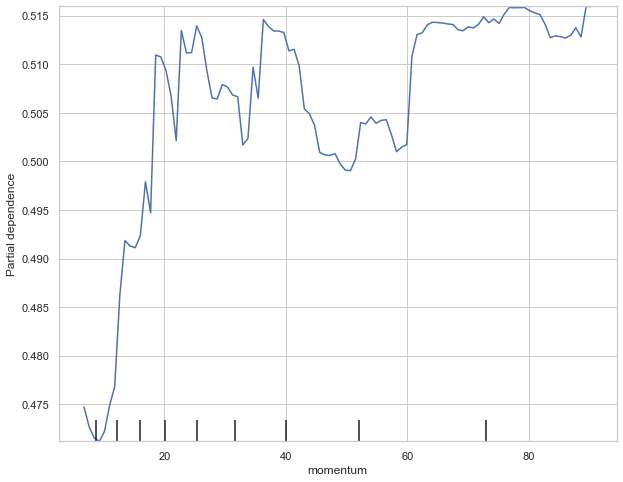

In [122]:
var = 'momentum'
PartialDependenceDisplay.from_estimator(classifier, x_train, [var]);

#### # Change in load

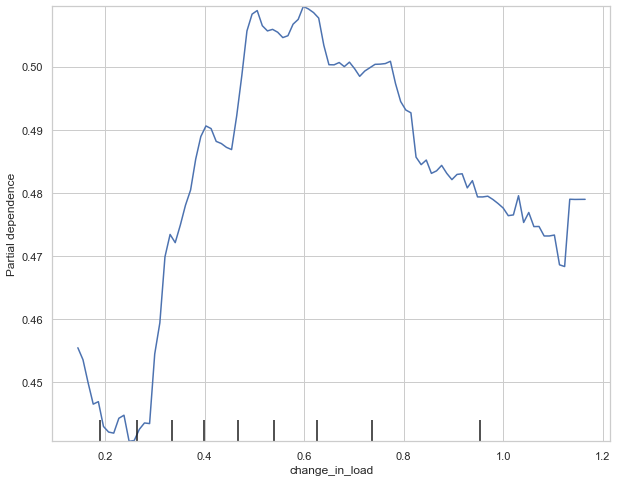

In [123]:
var = 'change_in_load'
PartialDependenceDisplay.from_estimator(classifier, x_train, [var]);

#### As the dataset has correlated columns so PDP (Partial Dependance Plots) will not show a good result. Alternative method is ALE (Accumulated Local Effects)

# File-5: Residual Analysis & Insights for Elimination & Non-elimination

## # Residual Analysis

### Using Random Forest Test set

In [126]:
classifier = RandomForestClassifier(n_estimators=55, criterion='entropy',max_depth =35, random_state=10)
classifier.fit(x_train, y_train)

print('\nTesting\n--------------------------')
y_test_pred=classifier.predict(x_test)
error_metrics(y_test, y_test_pred, x_test)


Testing
--------------------------
Accuracy %age: 90.81
ROC-AUC Score: 0.96

Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1773
           1       0.91      0.90      0.91      1741

    accuracy                           0.91      3514
   macro avg       0.91      0.91      0.91      3514
weighted avg       0.91      0.91      0.91      3514


Confusion Matrix: 
[[1618  155]
 [ 168 1573]]


'Done'

### 1. Falsely identified as Non-elimination (False 0)

#### Number of Rows misidentified as Non-elimination

In [127]:
False_0 = x_test[(y_test == 1) & (y_test_pred[:].T == 0)]
False_0.shape

(168, 12)

#### Table of Feature's mean

In [128]:
# Features average value for 'Elimination
df_main_elimination=df_main[df_main['activity1_elemination']==1]
elimination_mean=df_main_elimination[['duration', 'change_in_load', 'variance', 'maximum', 'median',
       'skewness', 'kurtosis', 'jerk', 'velocity', 'energy', 'power',
       'momentum']].mean()

#Features average value for 'Non-limination'
df_main_nonelimination=df_main[df_main['activity1_elemination']==0]
nonelimination_mean=df_main_nonelimination[['duration', 'change_in_load', 'variance', 'maximum', 'median',
       'skewness', 'kurtosis', 'jerk', 'velocity', 'energy', 'power',
       'momentum']].mean()

# Features average values for elimination misidentified as non-elimination
False_0_mean=False_0[['duration', 'change_in_load', 'variance', 'maximum', 'median',
       'skewness', 'kurtosis', 'jerk', 'velocity', 'energy', 'power',
       'momentum']].mean()

# Table of Feature's mean
data = {"Elimination": elimination_mean,
        "Non-elimination": nonelimination_mean,
        "Misidentified_as_nonelimination": False_0_mean}
df_mean = pd.concat(data,axis = 1)
df_mean

Elimination  Non-elimination  Misidentified_as_nonelimination
duration         126.132674        78.902046                        83.888392
change_in_load     0.593965         0.450300                         0.404234
variance           0.870689         0.960174                         0.803806
maximum           12.121900        10.840219                        10.545529
median             0.262172         0.160269                         0.128523
skewness           4.728600         5.472606                         5.534470
kurtosis          39.373868        46.545640                        47.760614
jerk               2.027612         1.695237                         1.597785
velocity           9.605335         4.589300                         4.537571
energy           388.560718       106.579710                        83.921048
power              5.783112         1.967955                         1.803493
momentum          46.382069        21.572966                        20.999388

#### ( Those elimination has features value nearer to non-elimination values are misidentified as non-elimination )

#### Box plots of elimination misidentified as non-elimination

In [129]:
False_0 = False_0[['duration', 'skewness', 'change_in_load', 'jerk', 'velocity', 'energy', 'power','momentum']]
False_0.columns

Index(['duration', 'skewness', 'change_in_load', 'jerk', 'velocity', 'energy',
       'power', 'momentum'],
      dtype='object')

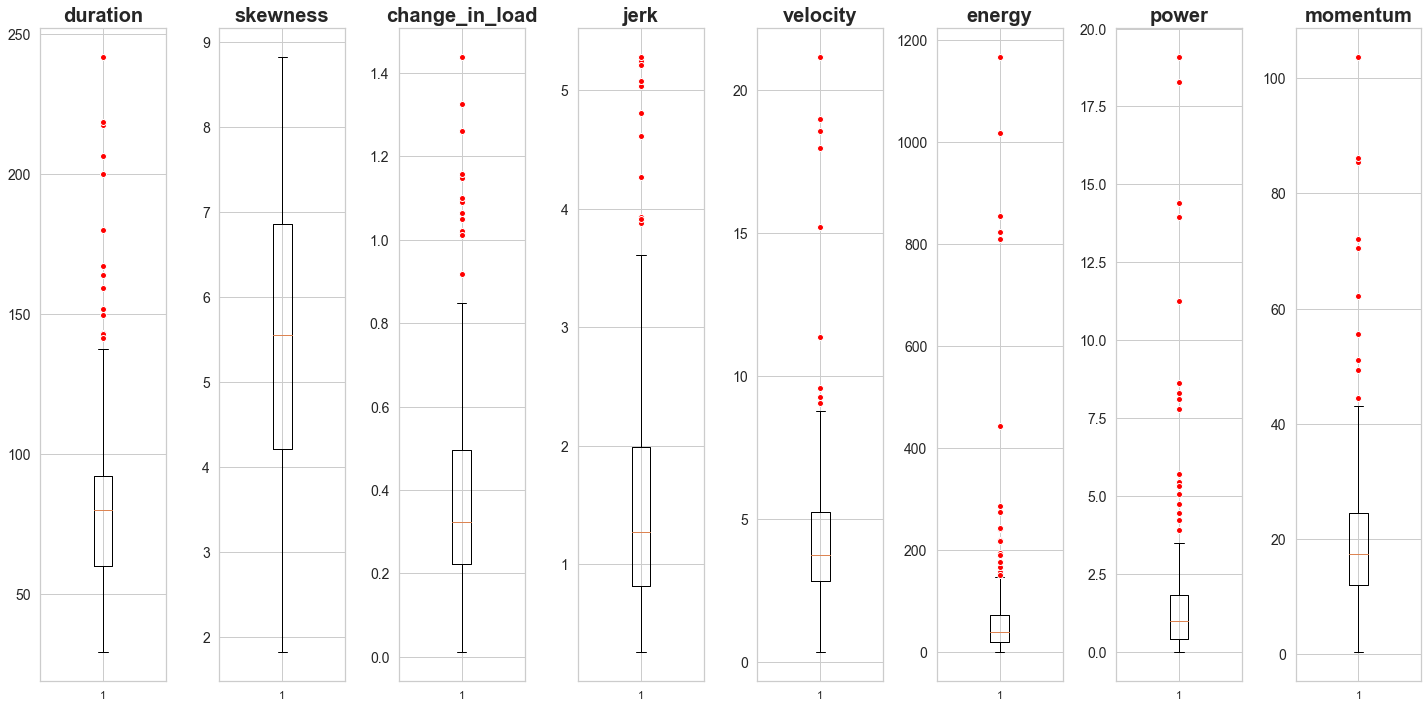

In [130]:
#Creating subplot of each column with its own scale
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(False_0.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(False_0.iloc[:,i], flierprops=red_circle)
    ax.set_title(False_0.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

#### Count of urination and defication among misidentified as non-elimination

In [131]:
# List of index number of misidentfied as non-elimination:
index_list=list(False_0.index)

# Activities of misidentfied rows:
df_main2=df_main1.copy()
urination_count=0
defecation_count=0
for index in index_list:
    if df_main2.loc[index]['activity']=='urination':
        urination_count +=1
    else:
        defecation_count +=1
print( 'Urination Rows : '+str(urination_count))
print( 'Defecation Rows : '+str(defecation_count))

Urination Rows : 158
Defecation Rows : 10


#### ( Among the rows misidentified as non-elimination, 158 rows are urination & 10 rows are defecation )

### 2. Falsely identified as Elimination (False 1)

#### Number of Rows misidentified as Elimination

In [132]:
False_1 = x_test[(y_test == 0) & (y_test_pred[:].T == 1)]
False_1.shape

(155, 12)

#### Table of Feature's mean

In [133]:
# Features average value for 'Elimination'
df_main_elimination=df_main[df_main['activity1_elemination']==1]
elimination_mean = df_main_elimination[['duration', 'change_in_load', 'variance', 'maximum', 'median',
       'skewness', 'kurtosis', 'jerk', 'velocity', 'energy', 'power',
       'momentum']].mean()

# Features average value for 'Non-limination'
df_main_nonelimination=df_main[df_main['activity1_elemination']==0]
nonelimination_mean=df_main_nonelimination[['duration', 'change_in_load', 'variance', 'maximum', 'median',
       'skewness', 'kurtosis', 'jerk', 'velocity', 'energy', 'power',
       'momentum']].mean()

# Features average values for non-elimination misidentified as elimination
False_1_mean = False_1[['duration', 'change_in_load', 'variance', 'maximum', 'median',
       'skewness', 'kurtosis', 'jerk', 'velocity', 'energy', 'power',
       'momentum']].mean()

# Table of Feature's mean
data = {"Elimination": elimination_mean,
        "Non-elimination": nonelimination_mean,
        "Misidentified_as_elimination": False_1_mean}
df_mean = pd.concat(data,
               axis = 1)
df_mean

Elimination  Non-elimination  Misidentified_as_elimination
duration         126.132674        78.902046                    121.659248
change_in_load     0.593965         0.450300                      0.528859
variance           0.870689         0.960174                      0.809879
maximum           12.121900        10.840219                     11.556879
median             0.262172         0.160269                      0.219301
skewness           4.728600         5.472606                      4.894638
kurtosis          39.373868        46.545640                     41.462552
jerk               2.027612         1.695237                      2.020110
velocity           9.605335         4.589300                      8.596379
energy           388.560718       106.579710                    291.848067
power              5.783112         1.967955                      4.324942
momentum          46.382069        21.572966                     39.695034

#### ( Those non-elimination has features value nearer to elimination values are misidentified as elimination )

In [134]:
df_False_1 = pd.DataFrame()
df_False_1['Non-elimination'] = df_main_elimination.mean()
df_False_1['Elimination'] = False_1.mean()
df_False_1

Non-elimination  Elimination
weight                     4837.561867          NaN
duration                    126.132674   121.659248
change_in_load                0.593965     0.528859
variance                      0.870689     0.809879
maximum                      12.121900    11.556879
median                        0.262172     0.219301
skewness                      4.728600     4.894638
kurtosis                     39.373868    41.462552
0.9_quantile                  1.457674          NaN
acceleration                  0.123537          NaN
jerk                          2.027612     2.020110
velocity                      9.605335     8.596379
energy                      388.560718   291.848067
power                         5.783112     4.324942
momentum                     46.382069    39.695034
activity1_elemination         1.000000          NaN

#### Box plots of non-elimination misidentified as elimination

In [135]:
False_1_box = False_1[['duration', 'skewness', 'change_in_load', 'jerk', 'velocity', 'energy', 'power','momentum']]
False_1_box.columns

Index(['duration', 'skewness', 'change_in_load', 'jerk', 'velocity', 'energy',
       'power', 'momentum'],
      dtype='object')

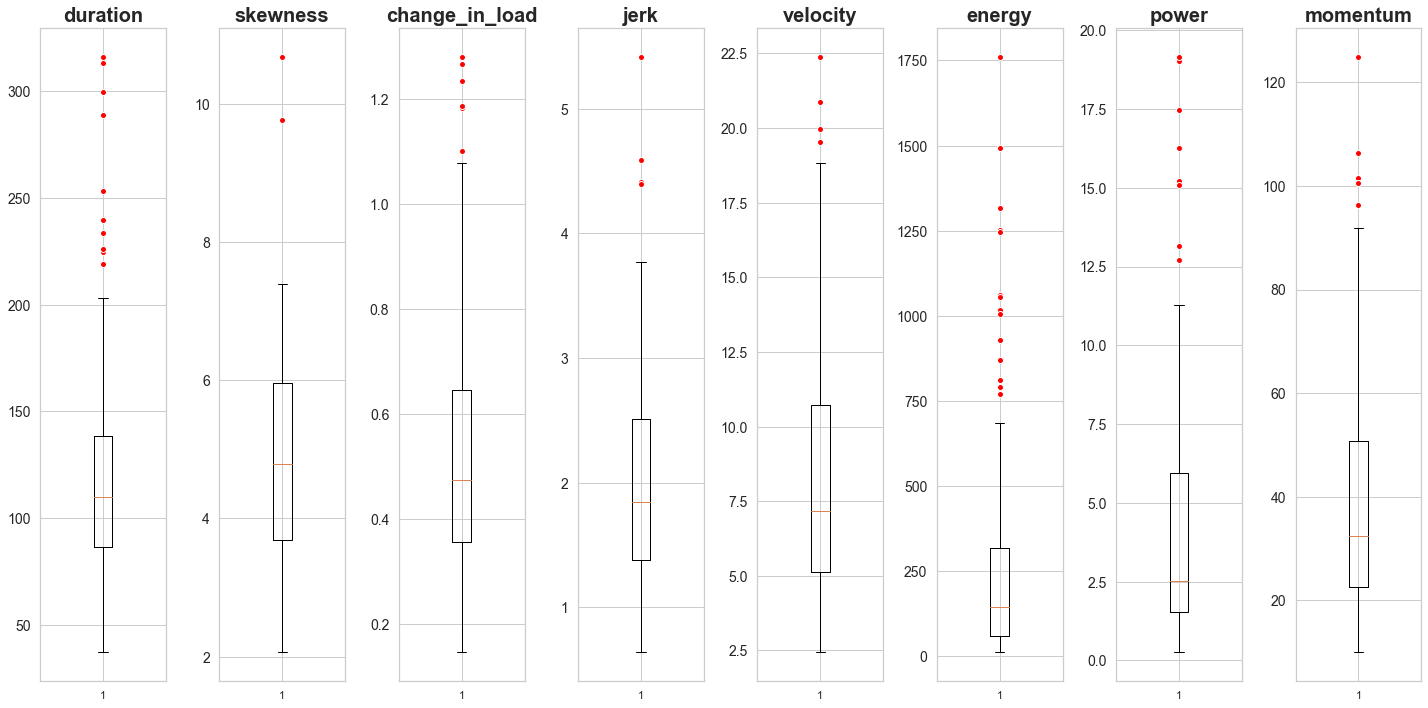

In [136]:
#Creating subplot of each column with its own scale

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(False_1_box.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(False_1_box.iloc[:,i], flierprops=red_circle)
    ax.set_title(False_1_box.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

#### ( Among the rows misidentified as elimination, all rows are of defecation )

## # Insights

### 1. Rightly identifies as elimination

In [137]:
True_1 = x_test[(y_test == 1) & (y_test_pred[:].T == 1)]
True_1.shape

(1573, 12)

In [138]:
True_1.mean()

duration          130.946486
change_in_load      0.613592
variance            0.886113
maximum            12.359243
median              0.273370
skewness            4.616363
kurtosis           38.113096
jerk                2.076319
velocity           10.143223
energy            430.082183
power               6.211223
momentum           49.296167
dtype: float64

### 2. Rightly identified as non-elimination

In [139]:
True_0 = x_test[(y_test == 0) & (y_test_pred[:].T == 0)]
True_0.shape

(1618, 12)

In [140]:
True_0.mean()

duration          75.299859
change_in_load     0.447634
variance           0.924049
maximum           10.532929
median             0.161210
skewness           5.402899
kurtosis          45.248753
jerk               1.691787
velocity           4.281409
energy            90.678733
power              1.800096
momentum          20.058240
dtype: float64

#### Mean table of rightly identified activities

In [141]:
df_insight = pd.DataFrame()
df_insight['Non-elimination'] = True_0.mean()
df_insight['Elimination'] = True_1.mean()
df_insight

Non-elimination  Elimination
duration              75.299859   130.946486
change_in_load         0.447634     0.613592
variance               0.924049     0.886113
maximum               10.532929    12.359243
median                 0.161210     0.273370
skewness               5.402899     4.616363
kurtosis              45.248753    38.113096
jerk                   1.691787     2.076319
velocity               4.281409    10.143223
energy                90.678733   430.082183
power                  1.800096     6.211223
momentum              20.058240    49.296167

# File-6: Feature_Selection & Modelling for Urination and Defecation

In [142]:
df_main=df_main1.copy()

#### # Rows with only 'Urination' and 'Defication'

In [143]:
df_main=df_main[df_main['activity']!='non_elimination']
df_main.shape

(8929, 18)

### 2. Data cleaning and Outlier removal

In [144]:
# Replacing NaN Name as 'unknown'
df_main['name'].fillna('unknown',inplace=True)

# Dropping NaN Rows 
df_main.dropna(inplace=True)

# Dropping rows with weight less than 1kg and more than 8kg
df_main=df_main[(df_main['weight']>1000) & (df_main['weight']<8000)]

# Activity "duration" 
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['duration']>450))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['duration']>400))]

# "Change in load" 
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['change_in_load']>1.8))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['change_in_load']>1.5))]

# 'Variance' 
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['variance']>8))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['variance']>7))]

# 'Skewness' 
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['skewness']>10))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['skewness']>12))]

# 'Acceleration' 
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['acceleration']>0.41))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['acceleration']>0.34))]

# 'Jerk' 
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['jerk']>7))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['jerk']>5.8))]

# 'Velocity'
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['velocity']>45))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['velocity']>34))]

# 'Energy' 
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['energy']>5000))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['energy']>3000))]

# 'Power' 
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['power']>47))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['power']>27))]

# 'Momentum' 
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['momentum']>195))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['momentum']>135))]

df_main=df_main[~((df_main['activity']=='defecation') & (df_main['energy']>4500))]

df_main.shape

(8785, 18)

### 3. Final Data (Removing Non numeric Columns )

In [145]:
# Onehot encoding
df_main=pd.get_dummies(df_main, columns=['activity'])

# Droping non numeric columns
df_main.drop(['name', 'start_time', 'activity_defecation'],axis=1,inplace=True)
df_main.head()

weight    duration  change_in_load  variance   maximum   median  skewness  \
0    6933  163.975000        1.114670  2.425972  14.11659  0.43164  2.088879   
1    6451  204.774940        0.996088  2.262248  19.98297  0.32373  2.502551   
2    7240   59.975000        0.292591  0.218968   4.16925  0.05886  2.892435   
3    7124  156.775000        0.952895  2.215583  12.43908  0.23544  2.385345   
4    7150  183.974939        1.174555  3.997131  15.75486  0.14715  2.486553   

    kurtosis  0.9_quantile  acceleration      jerk   velocity       energy  \
0   5.125106       3.23730      0.160777  2.623752  18.629980  1422.404601   
1   9.150935       3.06072      0.154408  2.854197  20.030623  1626.238512   
2  11.742110       0.87309      0.040413  0.638543   1.792097    13.463229   
3   6.859419       2.95281      0.133758  2.379447  14.293334   898.360000   
4   7.492540       3.96324      0.164273  2.929181  21.458935  2029.562636   

       power    momentum  activity_urination  
0  14.699895  129.161654                   0  
1  15.753942  129.217548                   0  
2   0.355113   12.974780                   0  
3   9.996573  101.825709                   0  
4  17.758225  153.431382                   0

### 4. Upsampling

In [146]:
df_majority = df_main[df_main.activity_urination==1]
df_minority = df_main[df_main.activity_urination==0]

df_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=0)

df_main = pd.concat([df_majority, df_upsampled])

## # Feature selection using Backward Elimination

### step 1: Data splitting to train, test and validation

In [147]:
df_shuffeled=df_main.sample(frac=1,random_state=101)

df_train=df_shuffeled[:int(len(df_shuffeled)*0.6)]
df_validate=df_shuffeled[int(len(df_shuffeled)*.6):int(len(df_shuffeled)*0.8)]
df_test=df_shuffeled[int(len(df_shuffeled)*0.8):]


x_train = df_train.drop(columns='activity_urination')
y_train = df_train['activity_urination']

x_validate = df_validate.drop(columns='activity_urination')
y_validate = df_validate['activity_urination']

x_test = df_test.drop(columns='activity_urination')
y_test = df_test['activity_urination']

### Step 3: Features coefficient and P-Value evaluation and dropping feature with maximum p val if p-val > 0.05

In [148]:
logit=sm.Logit(y_test, sm.add_constant(x_test)).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     activity_urination   No. Observations:                 2612
Model:                          Logit   Df Residuals:                     2596
Method:                           MLE   Df Model:                           15
Date:                Thu, 15 Dec 2022   Pseudo R-squ.:                     inf
Time:                        14:23:47   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.5274      1.222      1.250      0.211      -0.867       3.922
weight             0.0002      0.000      1.143      0.253      -0.000       0.000
duration          -0.0111      0.003     -3.925      0.000      -0.017      -0.006
change_in_load     7.7287      3.132      2.468      0.014       1.591      13.866
variance           0.1194      0.270      0.442      0.658      -0.409       0.648
maximum           -0.0312      0.028     -1.111      0.266      -0.086       0.024
median            -3.7890      1.573     -2.408      0.016      -6.873      -0.705
skewness           0.1700      0.271      0.627      0.531      -0.362       0.701
kurtosis        8.132e-05      0.015      0.005      0.996      -0.030       0.030
0.9_quantile      -1.1628      0.736     -1.580      0.114      -2.605       0.280
acceleration      28.7380     10.090      2.848      0.004       8.963      48.513
jerk              -1.1474      0.242     -4.746      0.000      -1.621      -0.674
velocity          -0.0946      0.080     -1.188      0.235      -0.251       0.061
energy             0.0052      0.001      9.815      0.000       0.004       0.006
power             -0.5491      0.069     -8.005      0.000      -0.684      -0.415
momentum          -0.0442      0.017     -2.537      0.011      -0.078      -0.010
==================================================================================
"""

#### Droping the feature with maximum p-value  ("kurtosis")

In [149]:
x_test.drop(['kurtosis'],axis=1,inplace=True)

#### Again Calculating P-value of all features 

In [150]:
logit=sm.Logit(y_test, sm.add_constant(x_test)).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     activity_urination   No. Observations:                 2612
Model:                          Logit   Df Residuals:                     2597
Method:                           MLE   Df Model:                           14
Date:                Thu, 15 Dec 2022   Pseudo R-squ.:                     inf
Time:                        14:23:50   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.5232      0.934      1.630      0.103      -0.308       3.355
weight             0.0002      0.000      1.145      0.252      -0.000       0.000
duration          -0.0111      0.003     -3.929      0.000      -0.017      -0.006
change_in_load     7.7265      3.104      2.489      0.013       1.643      13.810
variance           0.1188      0.251      0.474      0.636      -0.373       0.610
maximum           -0.0312      0.028     -1.112      0.266      -0.086       0.024
median            -3.7870      1.529     -2.477      0.013      -6.784      -0.790
skewness           0.1713      0.082      2.087      0.037       0.010       0.332
0.9_quantile      -1.1613      0.684     -1.698      0.090      -2.502       0.179
acceleration      28.7402     10.082      2.851      0.004       8.980      48.500
jerk              -1.1474      0.241     -4.751      0.000      -1.621      -0.674
velocity          -0.0946      0.080     -1.189      0.234      -0.250       0.061
energy             0.0052      0.001      9.818      0.000       0.004       0.006
power             -0.5491      0.068     -8.126      0.000      -0.682      -0.417
momentum          -0.0442      0.017     -2.538      0.011      -0.078      -0.010
==================================================================================
"""

#### Droping the feature with maximum p-value  (variance)

In [151]:
x_test.drop(['variance'],axis=1,inplace=True)

#### Again Calculating P-value of all features

In [152]:
logit=sm.Logit(y_test, sm.add_constant(x_test)).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     activity_urination   No. Observations:                 2612
Model:                          Logit   Df Residuals:                     2598
Method:                           MLE   Df Model:                           13
Date:                Thu, 15 Dec 2022   Pseudo R-squ.:                     inf
Time:                        14:23:53   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.4453      0.919      1.572      0.116      -0.356       3.247
weight             0.0002      0.000      1.092      0.275      -0.000       0.000
duration          -0.0111      0.003     -3.915      0.000      -0.017      -0.006
change_in_load     8.2609      2.892      2.856      0.004       2.593      13.929
maximum           -0.0284      0.027     -1.033      0.302      -0.082       0.025
median            -4.1675      1.304     -3.197      0.001      -6.722      -1.613
skewness           0.1802      0.080      2.254      0.024       0.023       0.337
0.9_quantile      -1.1654      0.684     -1.704      0.088      -2.506       0.175
acceleration      27.8659      9.883      2.819      0.005       8.495      47.237
jerk              -1.1140      0.231     -4.832      0.000      -1.566      -0.662
velocity          -0.0996      0.079     -1.259      0.208      -0.255       0.055
energy             0.0052      0.001      9.928      0.000       0.004       0.006
power             -0.5453      0.067     -8.145      0.000      -0.677      -0.414
momentum          -0.0445      0.017     -2.549      0.011      -0.079      -0.010
==================================================================================
"""

#### Droping the feature with maximum p-value  (maximum)

In [153]:
x_test.drop(['maximum'],axis=1,inplace=True)

#### Again Calculating P-value of all features

In [154]:
logit=sm.Logit(y_test, sm.add_constant(x_test)).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     activity_urination   No. Observations:                 2612
Model:                          Logit   Df Residuals:                     2599
Method:                           MLE   Df Model:                           12
Date:                Thu, 15 Dec 2022   Pseudo R-squ.:                     inf
Time:                        14:23:56   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.7475      0.870      2.008      0.045       0.042       3.453
weight             0.0001      0.000      0.981      0.327      -0.000       0.000
duration          -0.0110      0.003     -3.919      0.000      -0.017      -0.006
change_in_load     7.8954      2.868      2.753      0.006       2.273      13.517
median            -3.8954      1.276     -3.053      0.002      -6.397      -1.394
skewness           0.1246      0.059      2.126      0.033       0.010       0.239
0.9_quantile      -1.2284      0.681     -1.803      0.071      -2.564       0.107
acceleration      29.2590      9.810      2.983      0.003      10.033      48.485
jerk              -1.2025      0.214     -5.617      0.000      -1.622      -0.783
velocity          -0.1070      0.079     -1.347      0.178      -0.263       0.049
energy             0.0053      0.001     10.092      0.000       0.004       0.006
power             -0.5475      0.067     -8.204      0.000      -0.678      -0.417
momentum          -0.0445      0.018     -2.533      0.011      -0.079      -0.010
==================================================================================
"""

#### Droping the feature with maximum p-value  (weight)

In [155]:
x_test.drop(['weight'],axis=1,inplace=True)

#### Again Calculating P-value of all features

In [156]:
logit=sm.Logit(y_test, sm.add_constant(x_test)).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     activity_urination   No. Observations:                 2612
Model:                          Logit   Df Residuals:                     2600
Method:                           MLE   Df Model:                           11
Date:                Thu, 15 Dec 2022   Pseudo R-squ.:                     inf
Time:                        14:23:57   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.3843      0.584      4.085      0.000       1.240       3.528
duration          -0.0108      0.003     -3.851      0.000      -0.016      -0.005
change_in_load     8.8403      2.697      3.278      0.001       3.554      14.126
median            -3.9185      1.275     -3.074      0.002      -6.417      -1.420
skewness           0.1222      0.058      2.091      0.037       0.008       0.237
0.9_quantile      -1.1991      0.679     -1.767      0.077      -2.529       0.131
acceleration      25.2358      8.820      2.861      0.004       7.950      42.522
jerk              -1.2064      0.212     -5.678      0.000      -1.623      -0.790
velocity          -0.1188      0.079     -1.506      0.132      -0.273       0.036
energy             0.0053      0.001     10.106      0.000       0.004       0.006
power             -0.5566      0.066     -8.385      0.000      -0.687      -0.427
momentum          -0.0423      0.018     -2.408      0.016      -0.077      -0.008
==================================================================================
"""

#### Droping the feature with maximum p-value  (velocity)

In [157]:
x_test.drop(['velocity'],axis=1,inplace=True)

#### Again Calculating P-value of all features

In [158]:
logit=sm.Logit(y_test, sm.add_constant(x_test)).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     activity_urination   No. Observations:                 2612
Model:                          Logit   Df Residuals:                     2601
Method:                           MLE   Df Model:                           10
Date:                Thu, 15 Dec 2022   Pseudo R-squ.:                     inf
Time:                        14:23:59   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.4053      0.585      4.113      0.000       1.259       3.552
duration          -0.0117      0.003     -4.278      0.000      -0.017      -0.006
change_in_load    10.4739      2.470      4.240      0.000       5.633      15.315
median            -3.7134      1.267     -2.932      0.003      -6.196      -1.231
skewness           0.1295      0.058      2.225      0.026       0.015       0.244
0.9_quantile      -1.1248      0.677     -1.662      0.096      -2.451       0.202
acceleration      14.8262      5.310      2.792      0.005       4.418      25.234
jerk              -1.1653      0.208     -5.594      0.000      -1.574      -0.757
energy             0.0052      0.001     10.049      0.000       0.004       0.006
power             -0.5581      0.066     -8.394      0.000      -0.688      -0.428
momentum          -0.0630      0.011     -5.830      0.000      -0.084      -0.042
==================================================================================
"""

#### Droping the feature with maximum p-value  (0.9_quantile)

In [159]:
x_test.drop(['0.9_quantile'],axis=1,inplace=True)

#### Again Calculating P-value of all features

In [160]:
logit=sm.Logit(y_test, sm.add_constant(x_test)).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     activity_urination   No. Observations:                 2612
Model:                          Logit   Df Residuals:                     2602
Method:                           MLE   Df Model:                            9
Date:                Thu, 15 Dec 2022   Pseudo R-squ.:                     inf
Time:                        14:24:01   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.1052      0.558      3.774      0.000       1.012       3.199
duration          -0.0115      0.003     -4.208      0.000      -0.017      -0.006
change_in_load     6.8253      1.113      6.133      0.000       4.644       9.006
median            -1.9971      0.729     -2.741      0.006      -3.425      -0.569
skewness           0.1854      0.048      3.882      0.000       0.092       0.279
acceleration      18.3485      4.941      3.714      0.000       8.665      28.032
jerk              -1.3530      0.178     -7.620      0.000      -1.701      -1.005
energy             0.0051      0.001      9.937      0.000       0.004       0.006
power             -0.5477      0.066     -8.283      0.000      -0.677      -0.418
momentum          -0.0627      0.011     -5.818      0.000      -0.084      -0.042
==================================================================================
"""

#### Now all the features has p-val < 0.05

In [161]:
x_test.columns

Index(['duration', 'change_in_load', 'median', 'skewness', 'acceleration',
       'jerk', 'energy', 'power', 'momentum'],
      dtype='object')

#### Final features are  1. duration,  2. change_in_load, 3. median, 4. skewness,  5. jerk, 6. energy,  8. power, 9. momentum

# # Modelling

### # Final data

In [162]:
df_main_final=df_main.copy()

In [163]:
# Dropping columns from as a result of Backward Elimination:
df_main_final.drop(['kurtosis','variance','maximum','velocity','0.9_quantile'],axis=1,inplace=True)

# Dropping 'Weight' column as there are no variation shown across activities in boxplot of final EDA
df_main_final.drop(['weight'],axis=1,inplace=True)

In [164]:
df_shuffeled=df_main_final.sample(frac=1,random_state=101)

df_train=df_shuffeled[:int(len(df_shuffeled)*0.6)]
df_validate=df_shuffeled[int(len(df_shuffeled)*.6):int(len(df_shuffeled)*0.8)]
df_test=df_shuffeled[int(len(df_shuffeled)*0.8):]


x_train = df_train.drop(columns='activity_urination')
y_train = df_train['activity_urination']

x_validate = df_validate.drop(columns='activity_urination')
y_validate = df_validate['activity_urination']

x_test = df_test.drop(columns='activity_urination')
y_test = df_test['activity_urination']

### 1. Modelling with Logistic Regression:

#### i. Training Data

In [165]:
def error_metrics(actual, predicted, x_data):
    print('Accuracy %age: ' + str(np.round(accuracy_score(actual, predicted)*100,2)))
    print('ROC-AUC Score: ' + str(np.round(roc_auc_score(actual, log_reg.predict_proba(x_data)[:,1]),2)))
    print('\nClassification Report: ')
    print(classification_report(actual, predicted))
    print('\nConfusion Matrix: ')
    print(confusion_matrix(actual, predicted))
    return 'Done'


Training
--------------------------
Accuracy %age: 80.54
ROC-AUC Score: 0.88

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      3938
           1       0.79      0.83      0.81      3898

    accuracy                           0.81      7836
   macro avg       0.81      0.81      0.81      7836
weighted avg       0.81      0.81      0.81      7836


Confusion Matrix: 
[[3085  853]
 [ 672 3226]]

 ROC-AUC Curve for training set


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


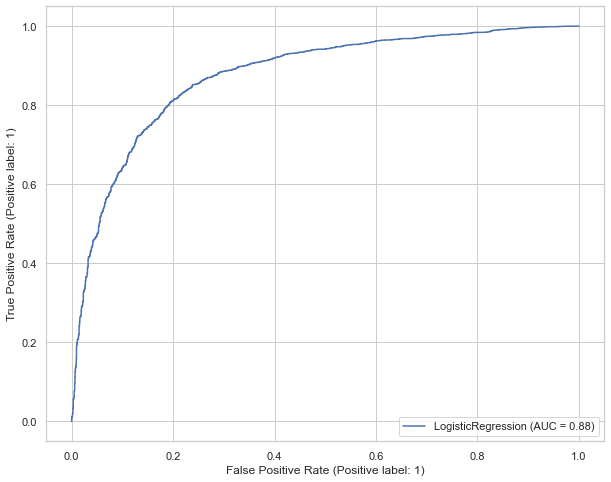

In [166]:
log_reg = LogisticRegression(random_state=10)
log_reg.fit(x_train, y_train)

print('\nTraining\n--------------------------')
y_train_pred=log_reg.predict(x_train)
error_metrics(y_train, y_train_pred, x_train)
print('\n ROC-AUC Curve for training set')
plot_roc_curve(log_reg, x_train, y_train)
plt.show()

#### ii. Validation Data


Validation
--------------------------
Accuracy %age: 79.82
ROC-AUC Score: 0.88

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1315
           1       0.79      0.80      0.80      1297

    accuracy                           0.80      2612
   macro avg       0.80      0.80      0.80      2612
weighted avg       0.80      0.80      0.80      2612


Confusion Matrix: 
[[1046  269]
 [ 258 1039]]

 ROC-AUC Curve for validate set


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


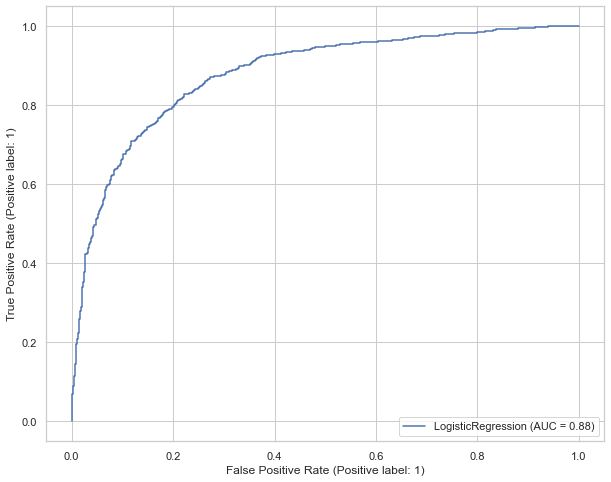

In [167]:
print('\nValidation\n--------------------------')
y_validate_pred=log_reg.predict(x_validate)
error_metrics(y_validate, y_validate_pred, x_validate)
print('\n ROC-AUC Curve for validate set')
plot_roc_curve(log_reg, x_validate, y_validate)
plt.show()

#### iii. Test Data


Testing
--------------------------
Accuracy %age: 80.55
ROC-AUC Score: 0.88

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1277
           1       0.80      0.83      0.81      1335

    accuracy                           0.81      2612
   macro avg       0.81      0.80      0.81      2612
weighted avg       0.81      0.81      0.81      2612


Confusion Matrix: 
[[ 991  286]
 [ 222 1113]]

 ROC-AUC Curve for test set


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


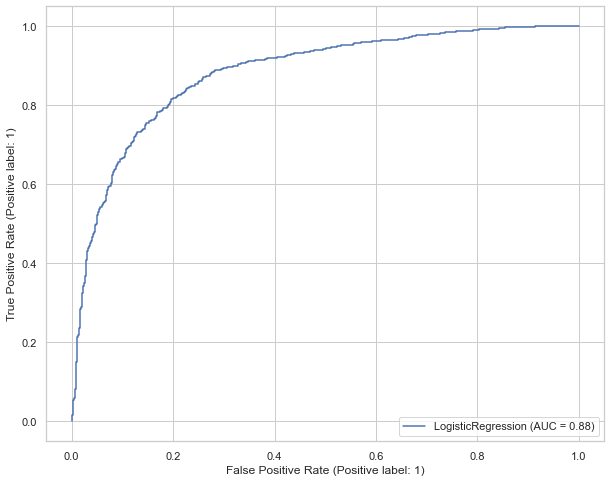

In [168]:
print('\nTesting\n--------------------------')
y_test_pred=log_reg.predict(x_test)
error_metrics(y_test, y_test_pred, x_test)
print('\n ROC-AUC Curve for test set')
plot_roc_curve(log_reg, x_test, y_test)
plt.show()

### 2. Modelling with XG Boost

In [169]:
xgb_weighted = XGBClassifier(verbsity=0, random_state=3)
grid_list={'nthread':[4], 'objective':['binary:logistic'], 'learning_rate':[0.001, 0.01, 0.03], 
           'max_depth':[5,6,7], 'min_child_weight':[3,4], 'silent':[1],
           'subsample':[0.7], 'colsample_bytree':[0.7],'n_estimators':[100]}
xgb_grid_search = GridSearchCV(estimator=xgb_weighted, param_grid=grid_list, cv=10, n_jobs=4, verbose=False, scoring='roc_auc')
xgb_grid_search.fit(x_train, y_train)
xgb_best_model = xgb_grid_search.best_estimator_

[14:25:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent", "verbsity" } are not used.



In [170]:
def error_metrics(actual, predicted, x_data):
    print('Accuracy %age: ' + str(np.round(accuracy_score(actual, predicted)*100,2)))
    print('ROC-AUC Score: ' + str(np.round(roc_auc_score(actual, xgb_grid_search.predict_proba(x_data)[:,1]),2)))
    print('\nClassification Report: ')
    print(classification_report(actual, predicted))
    print('\nConfusion Matrix: ')
    print(confusion_matrix(actual, predicted))
    return 'Done'

#### i. Train Set


Training
--------------------------
Accuracy %age: 89.27
ROC-AUC Score: 0.96

Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      3938
           1       0.91      0.87      0.89      3898

    accuracy                           0.89      7836
   macro avg       0.89      0.89      0.89      7836
weighted avg       0.89      0.89      0.89      7836


Confusion Matrix: 
[[3621  317]
 [ 524 3374]]

 ROC-AUC Curve for test set


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


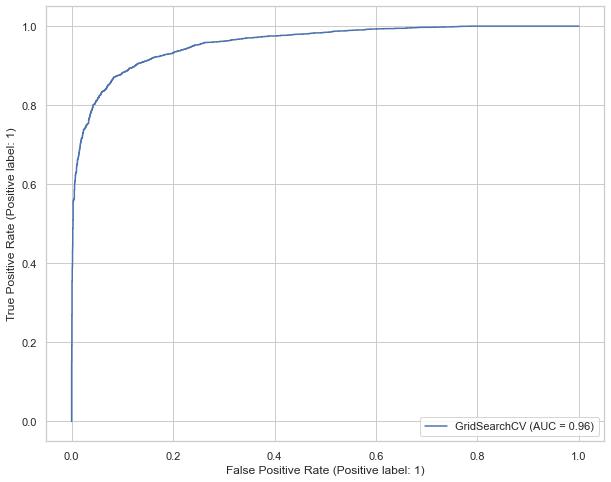

In [171]:
print('\nTraining\n--------------------------')
y_train_pred=xgb_best_model.predict(x_train)
error_metrics(y_train, y_train_pred, x_train)
print('\n ROC-AUC Curve for test set')
plot_roc_curve(xgb_grid_search, x_train, y_train)
plt.show()

#### ii. Validation Set


Validation
--------------------------
Accuracy %age: 85.11
ROC-AUC Score: 0.92

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1315
           1       0.87      0.82      0.84      1297

    accuracy                           0.85      2612
   macro avg       0.85      0.85      0.85      2612
weighted avg       0.85      0.85      0.85      2612


Confusion Matrix: 
[[1163  152]
 [ 237 1060]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


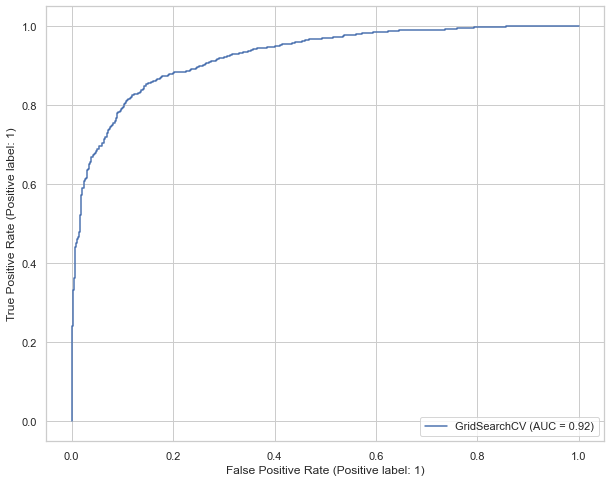

In [172]:
print('\nValidation\n--------------------------')
y_validate_pred=xgb_best_model.predict(x_validate)
error_metrics(y_validate, y_validate_pred, x_validate)
plot_roc_curve(xgb_grid_search, x_validate, y_validate)
plt.show()

#### iii. Test Set


Testing
--------------------------
Accuracy %age: 86.18
ROC-AUC Score: 0.93

Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1277
           1       0.89      0.84      0.86      1335

    accuracy                           0.86      2612
   macro avg       0.86      0.86      0.86      2612
weighted avg       0.86      0.86      0.86      2612


Confusion Matrix: 
[[1136  141]
 [ 220 1115]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


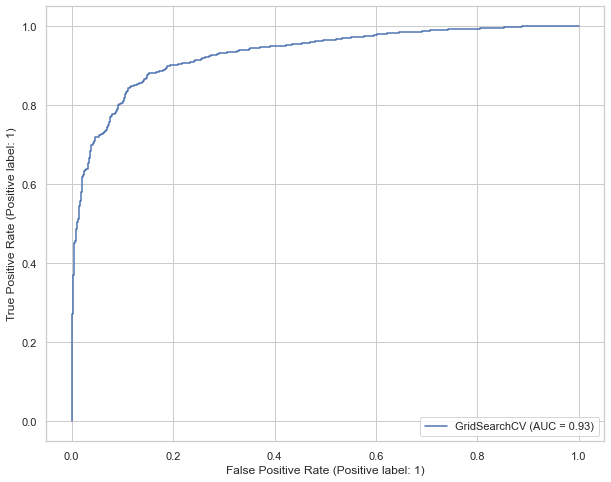

In [173]:
print('\nTesting\n--------------------------')
y_test_pred=xgb_best_model.predict(x_test)
error_metrics(y_test, y_test_pred, x_test)
plot_roc_curve(xgb_grid_search, x_test, y_test)
plt.show()

#### # Feature Importance

In [174]:
xgb_imp_df = pd.DataFrame()
xgb_imp_df['Features'] = x_test.columns
xgb_imp_df['Importance'] = xgb_best_model.feature_importances_
xgb_imp_df = xgb_imp_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
xgb_imp_df

Features  Importance
0          energy    0.365126
1            jerk    0.108998
2        momentum    0.104856
3           power    0.102817
4        duration    0.095510
5          median    0.073140
6        skewness    0.051062
7  change_in_load    0.050811
8    acceleration    0.047679

<AxesSubplot: xlabel='Importance', ylabel='Features'>

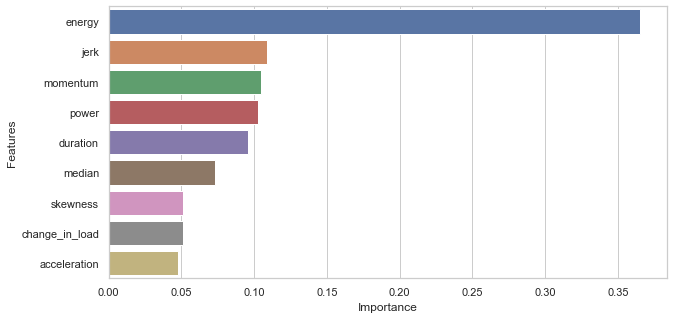

In [175]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Importance', y = 'Features', data = xgb_imp_df)

### 3. Modelling with SVM

In [290]:
from sklearn.svm import SVC  
classifier = SVC(kernel='linear', probability=True) 
  
# fitting x samples and y classes 
classifier.fit(x_train, y_train)

SVC(kernel='linear', probability=True)

In [291]:
def error_metrics(actual, predicted, x_data):
    print('Accuracy %age: ' + str(np.round(accuracy_score(actual, predicted)*100,2)))
    print('ROC-AUC Score: ' + str(np.round(roc_auc_score(actual, classifier.predict_proba(x_data)[:,1]),2)))
    print('\nClassification Report: ')
    print(classification_report(actual, predicted))
    print('\nConfusion Matrix: ')
    print(confusion_matrix(actual, predicted))
    return 'Done'

#### i. Train Set


Training
--------------------------
Accuracy %age: 80.53
ROC-AUC Score: 0.88

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      3938
           1       0.79      0.83      0.81      3898

    accuracy                           0.81      7836
   macro avg       0.81      0.81      0.81      7836
weighted avg       0.81      0.81      0.81      7836


Confusion Matrix: 
[[3079  859]
 [ 667 3231]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


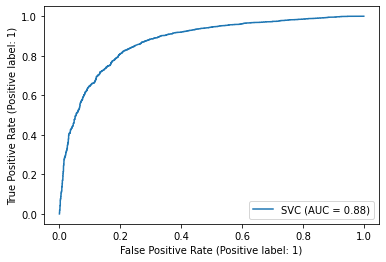

In [51]:
print('\nTraining\n--------------------------')
y_train_pred=classifier.predict(x_train)
error_metrics(y_train, y_train_pred, x_train)
plot_roc_curve(classifier, x_train, y_train)
plt.show()

#### ii. Validation set

In [41]:
print('\nValidation\n--------------------------')
y_validate_pred=classifier.predict(x_validate)
error_metrics(y_validate, y_validate_pred, x_validate)
plot_roc_curve(classifier, x_validate, y_validate)
plt.show()

#### iii. Test Set


Testing
--------------------------
Accuracy %age: 80.78
ROC-AUC Score: 0.88

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1277
           1       0.80      0.83      0.82      1335

    accuracy                           0.81      2612
   macro avg       0.81      0.81      0.81      2612
weighted avg       0.81      0.81      0.81      2612


Confusion Matrix: 
[[1003  274]
 [ 228 1107]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


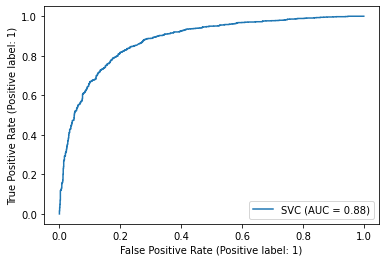

In [53]:
print('\nTesting\n--------------------------')
y_test_pred=classifier.predict(x_test)
error_metrics(y_test, y_test_pred, x_test)
plot_roc_curve(classifier, x_test, y_test)
plt.show()

### 4. Modelling with KNN

In [176]:
def error_metrics(actual, predicted, x_data):
    print('Accuracy %age: ' + str(np.round(accuracy_score(actual, predicted)*100,2)))
    print('ROC-AUC Score: ' + str(np.round(roc_auc_score(actual, classifier.predict_proba(x_data)[:,1]),2)))
    print('\nClassification Report: ')
    print(classification_report(actual, predicted))
    print('\nConfusion Matrix: ')
    print(confusion_matrix(actual, predicted))
    return 'Done'

In [177]:
classifier= KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train) 

KNeighborsClassifier(n_neighbors=10)

#### i. Train Set


Training
--------------------------
Accuracy %age: 83.07
ROC-AUC Score: 0.92

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      3938
           1       0.87      0.78      0.82      3898

    accuracy                           0.83      7836
   macro avg       0.83      0.83      0.83      7836
weighted avg       0.83      0.83      0.83      7836


Confusion Matrix: 
[[3464  474]
 [ 853 3045]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


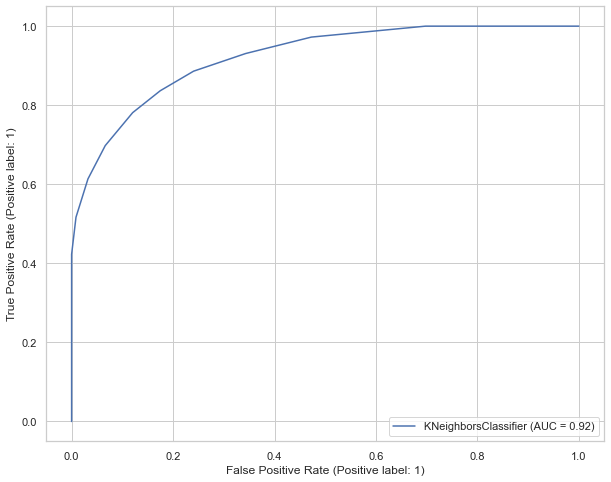

In [178]:
print('\nTraining\n--------------------------')
y_train_pred=classifier.predict(x_train)
error_metrics(y_train, y_train_pred, x_train)
plot_roc_curve(classifier, x_train, y_train)
plt.show()

#### ii. Validation Set


Validation
--------------------------
Accuracy %age: 79.25
ROC-AUC Score: 0.87

Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.85      0.81      1315
           1       0.83      0.73      0.78      1297

    accuracy                           0.79      2612
   macro avg       0.80      0.79      0.79      2612
weighted avg       0.80      0.79      0.79      2612


Confusion Matrix: 
[[1123  192]
 [ 350  947]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


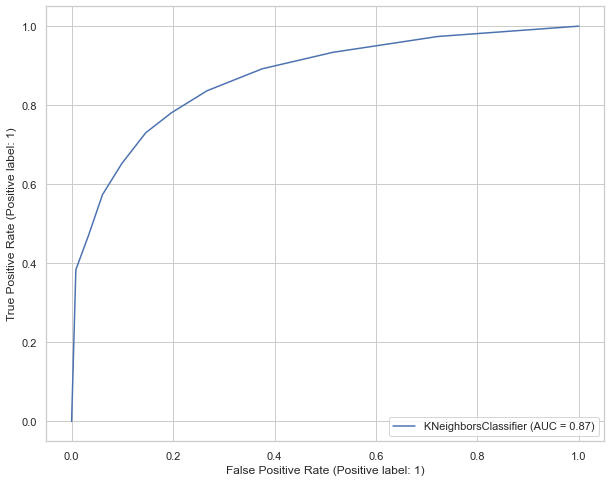

In [179]:
print('\nValidation\n--------------------------')
y_validate_pred=classifier.predict(x_validate)
error_metrics(y_validate, y_validate_pred, x_validate)
plot_roc_curve(classifier, x_validate, y_validate)
plt.show()

#### iii. Test Set


Testing
--------------------------
Accuracy %age: 79.52
ROC-AUC Score: 0.88

Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.85      0.80      1277
           1       0.84      0.74      0.79      1335

    accuracy                           0.80      2612
   macro avg       0.80      0.80      0.79      2612
weighted avg       0.80      0.80      0.79      2612


Confusion Matrix: 
[[1084  193]
 [ 342  993]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


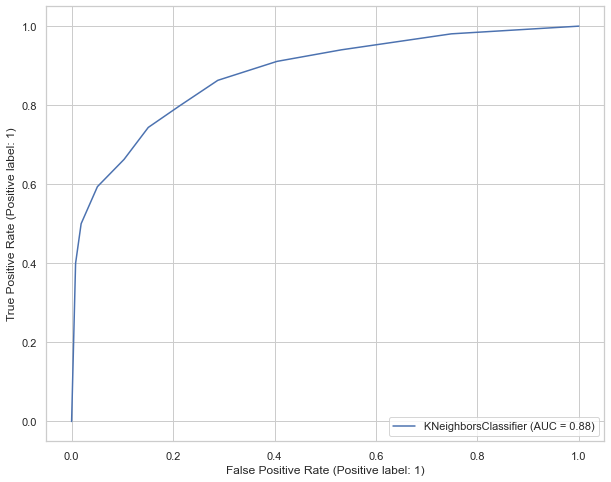

In [180]:
print('\nTesting\n--------------------------')
y_test_pred=classifier.predict(x_test)
error_metrics(y_test, y_test_pred, x_test)
plot_roc_curve(classifier, x_test, y_test)
plt.show()

### 3. Modelling with Decision Tree

In [181]:
def error_metrics(actual, predicted, x_data):
    print('Accuracy %age: ' + str(np.round(accuracy_score(actual, predicted)*100,2)))
    print('ROC-AUC Score: ' + str(np.round(roc_auc_score(actual, classifier.predict_proba(x_data)[:,1]),2)))
    print('\nClassification Report: ')
    print(classification_report(actual, predicted))
    print('\nConfusion Matrix: ')
    print(confusion_matrix(actual, predicted))
    return 'Done'

#### i. Training Set


Training
--------------------------
Accuracy %age: 93.26
ROC-AUC Score: 0.98

Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3938
           1       0.96      0.90      0.93      3898

    accuracy                           0.93      7836
   macro avg       0.93      0.93      0.93      7836
weighted avg       0.93      0.93      0.93      7836


Confusion Matrix: 
[[3790  148]
 [ 380 3518]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


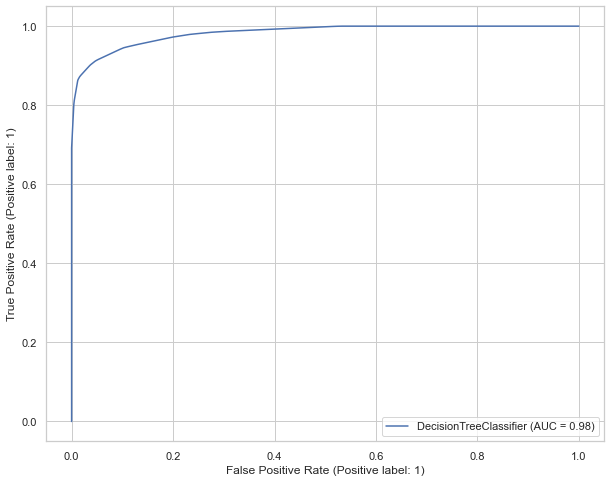

In [182]:
classifier = DecisionTreeClassifier(criterion='entropy', max_depth =12, random_state=10)
classifier.fit(x_train, y_train)

print('\nTraining\n--------------------------')
y_train_pred=classifier.predict(x_train)
error_metrics(y_train, y_train_pred, x_train)
plot_roc_curve(classifier, x_train, y_train)
plt.show()

#### ii. Validation Set


Validation
--------------------------
Accuracy %age: 85.45
ROC-AUC Score: 0.88

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1315
           1       0.91      0.78      0.84      1297

    accuracy                           0.85      2612
   macro avg       0.86      0.85      0.85      2612
weighted avg       0.86      0.85      0.85      2612


Confusion Matrix: 
[[1219   96]
 [ 284 1013]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


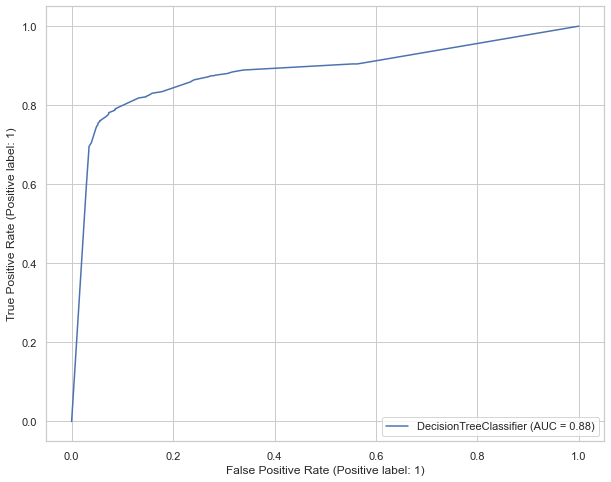

In [183]:
print('\nValidation\n--------------------------')
y_validate_pred=classifier.predict(x_validate)
error_metrics(y_validate, y_validate_pred, x_validate)
plot_roc_curve(classifier, x_validate, y_validate)
plt.show()

#### iii. Test Set


Testing
--------------------------
Accuracy %age: 85.64
ROC-AUC Score: 0.89

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1277
           1       0.91      0.80      0.85      1335

    accuracy                           0.86      2612
   macro avg       0.86      0.86      0.86      2612
weighted avg       0.86      0.86      0.86      2612


Confusion Matrix: 
[[1174  103]
 [ 272 1063]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


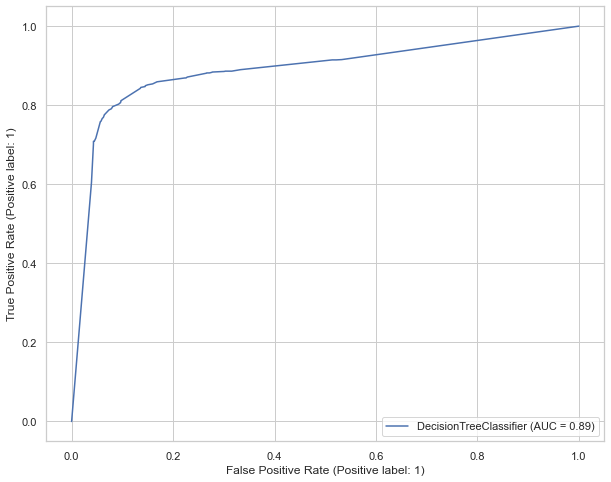

In [184]:
print('\nTesting\n--------------------------')
y_test_pred=classifier.predict(x_test)
error_metrics(y_test, y_test_pred, x_test)
plot_roc_curve(classifier, x_test, y_test)
plt.show()

#### # Feature Importance

In [185]:
dt_df = pd.DataFrame()
dt_df['Features'] = x_test.columns
dt_df['Importance'] = classifier.feature_importances_
dt_df = dt_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
dt_df

Features  Importance
0          energy    0.401986
1            jerk    0.114926
2        duration    0.105745
3          median    0.073745
4        skewness    0.066923
5           power    0.065122
6        momentum    0.064358
7  change_in_load    0.063984
8    acceleration    0.043212

<AxesSubplot: xlabel='Importance', ylabel='Features'>

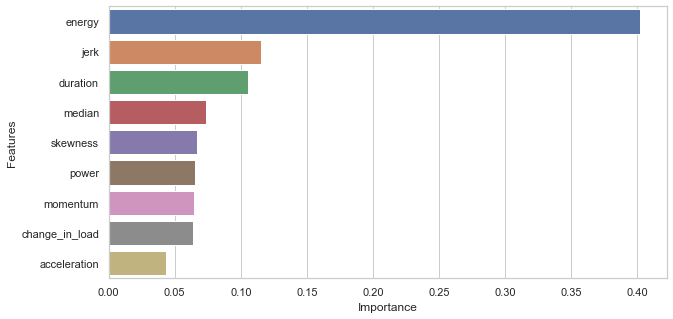

In [186]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Importance', y = 'Features', data = dt_df)

#### # Visualization of tree

In [187]:
x_train.columns

Index(['duration', 'change_in_load', 'median', 'skewness', 'acceleration',
       'jerk', 'energy', 'power', 'momentum'],
      dtype='object')

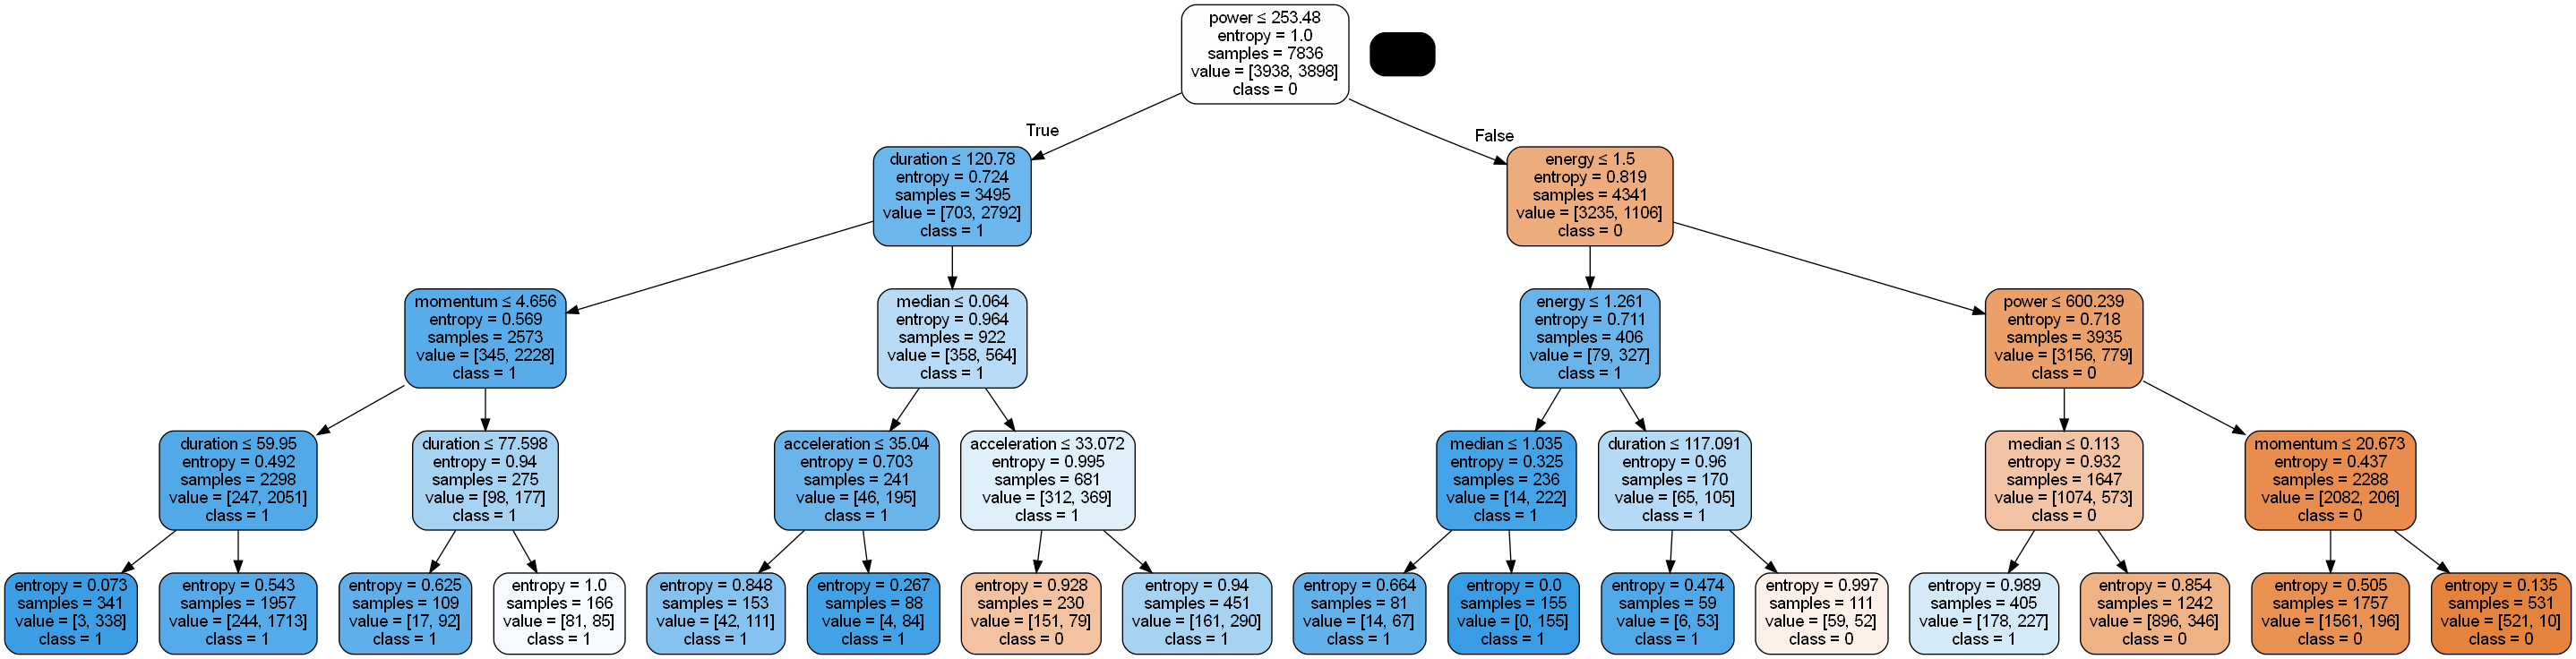

In [188]:
feature_cols=['duration', 'change_in_load', 'median', 'skewness', 'jerk', 'energy',
       'power', 'momentum','acceleration']

# Create Decision Tree classifer object
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
classifier.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = classifier.predict(x_test)

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('main.jpg')
Image(graph.create_png())

### 4. Modelling with Random Forest

In [189]:
def error_metrics(actual, predicted, x_data):
    print('Accuracy %age: ' + str(np.round(accuracy_score(actual, predicted)*100,2)))
    print('ROC-AUC Score: ' + str(np.round(roc_auc_score(actual, classifier.predict_proba(x_data)[:,1]),2)))
    print('\nClassification Report: ')
    print(classification_report(actual, predicted))
    print('\nConfusion Matrix: ')
    print(confusion_matrix(actual, predicted))
    return 'Done'

#### i. Training Set

## ***( As with this hyper parameter I am getting good Valodation and Test result, though Train result is coming 100%, I have used this hyper parameter for best model performance)


Training
--------------------------
Accuracy %age: 99.99
ROC-AUC Score: 1.0

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3938
           1       1.00      1.00      1.00      3898

    accuracy                           1.00      7836
   macro avg       1.00      1.00      1.00      7836
weighted avg       1.00      1.00      1.00      7836


Confusion Matrix: 
[[3937    1]
 [   0 3898]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


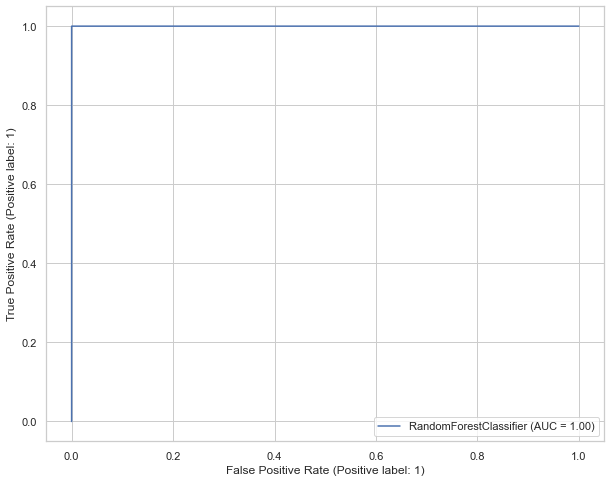

In [190]:
classifier = RandomForestClassifier(n_estimators=55, criterion='entropy',max_depth =35, random_state=10)
classifier.fit(x_train, y_train)

print('\nTraining\n--------------------------')
y_train_pred=classifier.predict(x_train)
error_metrics(y_train, y_train_pred, x_train)
plot_roc_curve(classifier, x_train, y_train)
plt.show()

#### ii. Validation Set


Validation
--------------------------
Accuracy %age: 91.16
ROC-AUC Score: 0.97

Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1315
           1       0.96      0.86      0.91      1297

    accuracy                           0.91      2612
   macro avg       0.92      0.91      0.91      2612
weighted avg       0.92      0.91      0.91      2612


Confusion Matrix: 
[[1267   48]
 [ 183 1114]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


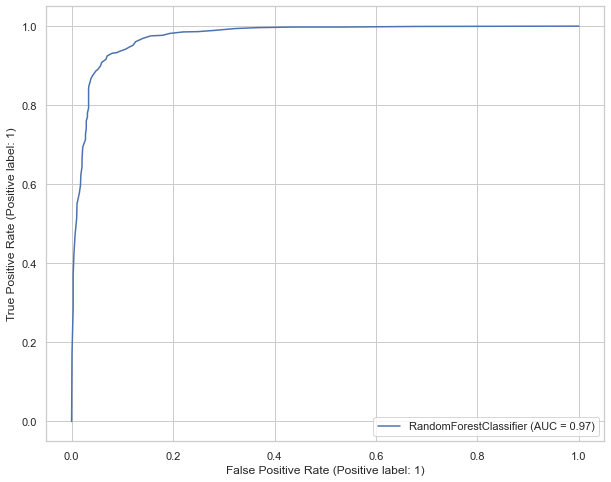

In [191]:
print('\nValidation\n--------------------------')
y_validate_pred=classifier.predict(x_validate)
error_metrics(y_validate, y_validate_pred, x_validate)
plot_roc_curve(classifier, x_validate, y_validate)
plt.show()

#### iii. Test Set


Testing
--------------------------
Accuracy %age: 91.16
ROC-AUC Score: 0.97

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1277
           1       0.95      0.87      0.91      1335

    accuracy                           0.91      2612
   macro avg       0.91      0.91      0.91      2612
weighted avg       0.91      0.91      0.91      2612


Confusion Matrix: 
[[1216   61]
 [ 170 1165]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


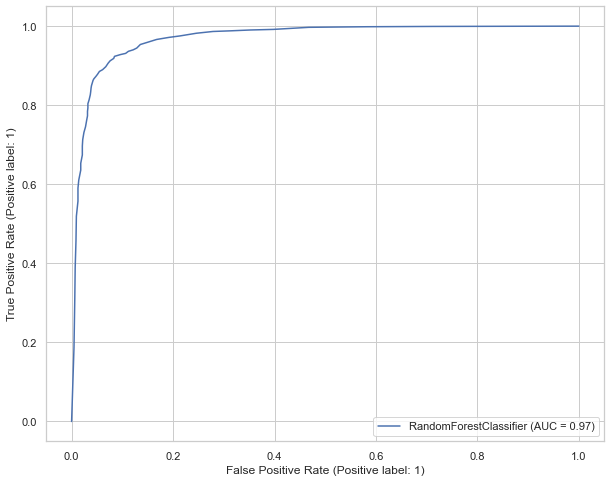

In [192]:
print('\nTesting\n--------------------------')
y_test_pred=classifier.predict(x_test)
error_metrics(y_test, y_test_pred, x_test)
plot_roc_curve(classifier, x_test, y_test)
plt.show()

#### # Feature Importance

In [193]:
RF_df = pd.DataFrame()
RF_df['Features'] = x_test.columns
RF_df['Importance'] = classifier.feature_importances_
RF_df = RF_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
RF_df

Features  Importance
0          energy    0.163581
1        duration    0.144656
2        momentum    0.138884
3           power    0.128892
4            jerk    0.119468
5          median    0.081242
6  change_in_load    0.078454
7        skewness    0.075762
8    acceleration    0.069062

<AxesSubplot: xlabel='Importance', ylabel='Features'>

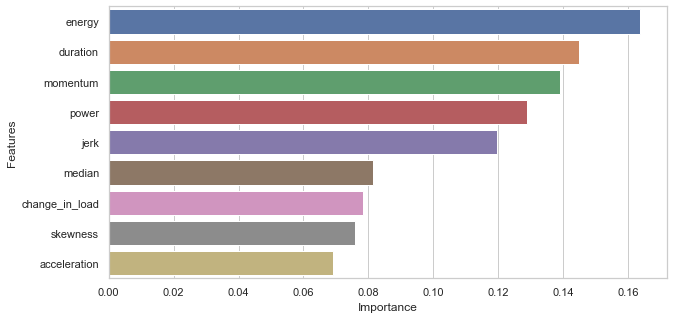

In [194]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Importance', y = 'Features', data = RF_df)

## PDP Plots (Partial Dependance Plot)

In [195]:
# PDP plot is not installing properly so, I am using seaborn to plot PDP plots

In [196]:
from sklearn.inspection import (partial_dependence, PartialDependenceDisplay)

In [197]:
classifier = RandomForestClassifier(n_estimators=41, criterion='entropy',max_depth =26, random_state=10)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=26, n_estimators=41,
                       random_state=10)

#### # Jerk

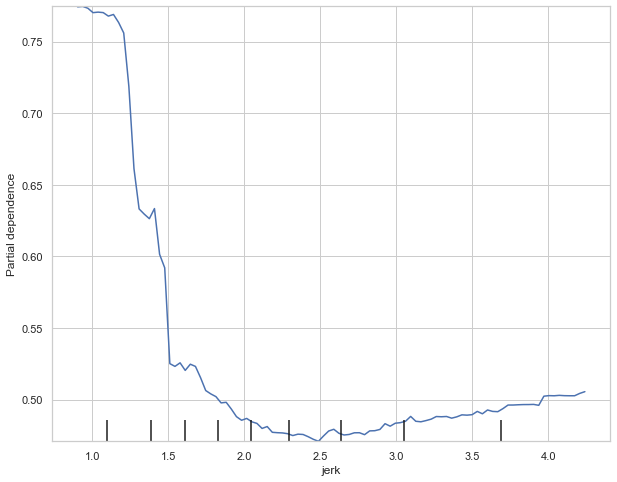

In [198]:
var = 'jerk'
PartialDependenceDisplay.from_estimator(classifier, x_train, [var]);

#### # Momentum

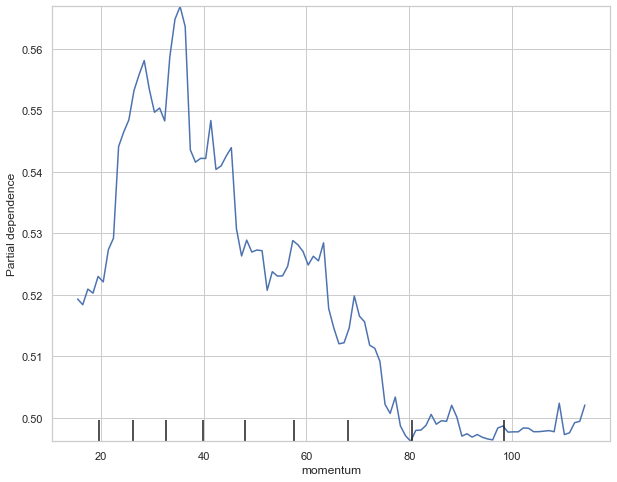

In [199]:
var = 'momentum'
PartialDependenceDisplay.from_estimator(classifier, x_train, [var]);

#### # Power

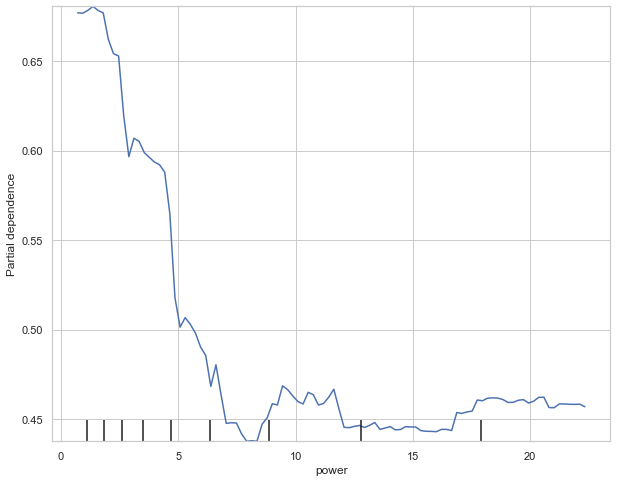

In [200]:
var = 'power'
PartialDependenceDisplay.from_estimator(classifier, x_train, [var]);

#### # Duratrion

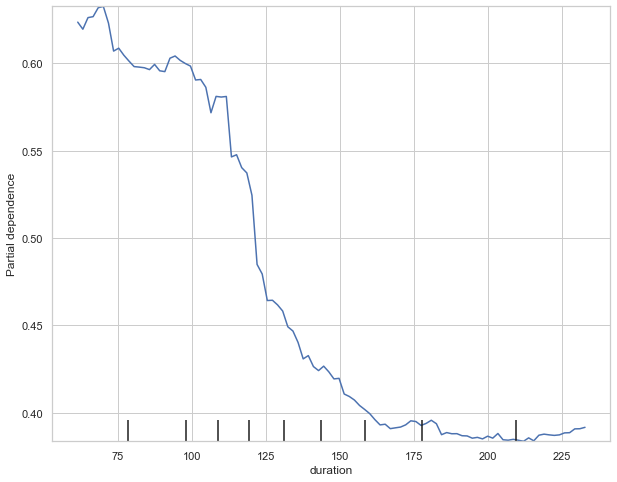

In [201]:
var = 'duration'
PartialDependenceDisplay.from_estimator(classifier, x_train, [var]);

#### # Change in load

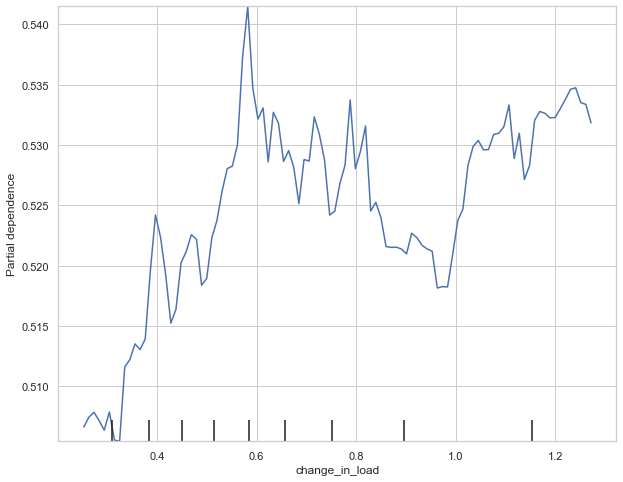

In [202]:
var = 'change_in_load'
PartialDependenceDisplay.from_estimator(classifier, x_train, [var]);

# File-7: Residual Analysis & Insights for Urination and Defecation

## # Rasidual Analysis

### Using Random Forest for Test set

In [203]:
classifier = RandomForestClassifier(n_estimators=55, criterion='entropy',max_depth =35, random_state=10)
classifier.fit(x_train, y_train)

print('\nTesting\n--------------------------')
y_test_pred=classifier.predict(x_test)
error_metrics(y_test, y_test_pred, x_test)


Testing
--------------------------
Accuracy %age: 91.16
ROC-AUC Score: 0.97

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1277
           1       0.95      0.87      0.91      1335

    accuracy                           0.91      2612
   macro avg       0.91      0.91      0.91      2612
weighted avg       0.91      0.91      0.91      2612


Confusion Matrix: 
[[1216   61]
 [ 170 1165]]


'Done'

### 1. Falsely identified as Defecation (False_0)

#### Number of Rows misidentified as Defecation

In [204]:
False_0 = x_test[(y_test == 1) & (y_test_pred[:].T == 0)]
False_0.shape

(170, 9)

#### Table of Feature's mean

In [205]:
# Features average value for 'Urination'
df_main_urination=df_main[df_main['activity_urination']==1]
urination_mean=df_main_urination[['duration', 'change_in_load', 'median', 'skewness', 'acceleration',
       'jerk', 'energy', 'power', 'momentum']].mean()

# Features average value for 'Defication'
df_main_defecation=df_main[df_main['activity_urination']==0]
defecation_mean=df_main_defecation[['duration', 'change_in_load', 'median', 'skewness', 'acceleration',
       'jerk', 'energy', 'power', 'momentum']].mean()

# Features average values for urination misidentified as defecation
False_0_mean=False_0[['duration', 'change_in_load', 'median', 'skewness', 'acceleration',
       'jerk', 'energy', 'power', 'momentum']].mean()

# Table of Feature's mean
data = {"Urination": urination_mean,
        "Defecation": defecation_mean,
        "Misidentified_as_defecation": False_0_mean}
df_mean = pd.concat(data,axis = 1)
df_mean

Urination  Defecation  Misidentified_as_defecation
duration        112.532604  165.516246                   165.475506
change_in_load    0.538491    0.755342                     0.666322
median            0.226917    0.368661                     0.301052
skewness          4.966353    4.051674                     4.137113
acceleration      0.112286    0.156251                     0.135600
jerk              1.800631    2.677805                     2.356729
energy          234.220964  828.667140                   612.586664
power             4.028411   10.859759                     7.995216
momentum         37.421950   72.144089                    63.849994

#### ( Those Urination has features values nearer to the Defecation values are misidentifier as Defecation )

#### Box plots of Urination misidentified as defecation

In [206]:
False_0_box = False_0[['duration', 'change_in_load', 'skewness', 'acceleration', 'jerk', 'energy', 'power','momentum']]
False_0_box.columns

Index(['duration', 'change_in_load', 'skewness', 'acceleration', 'jerk',
       'energy', 'power', 'momentum'],
      dtype='object')

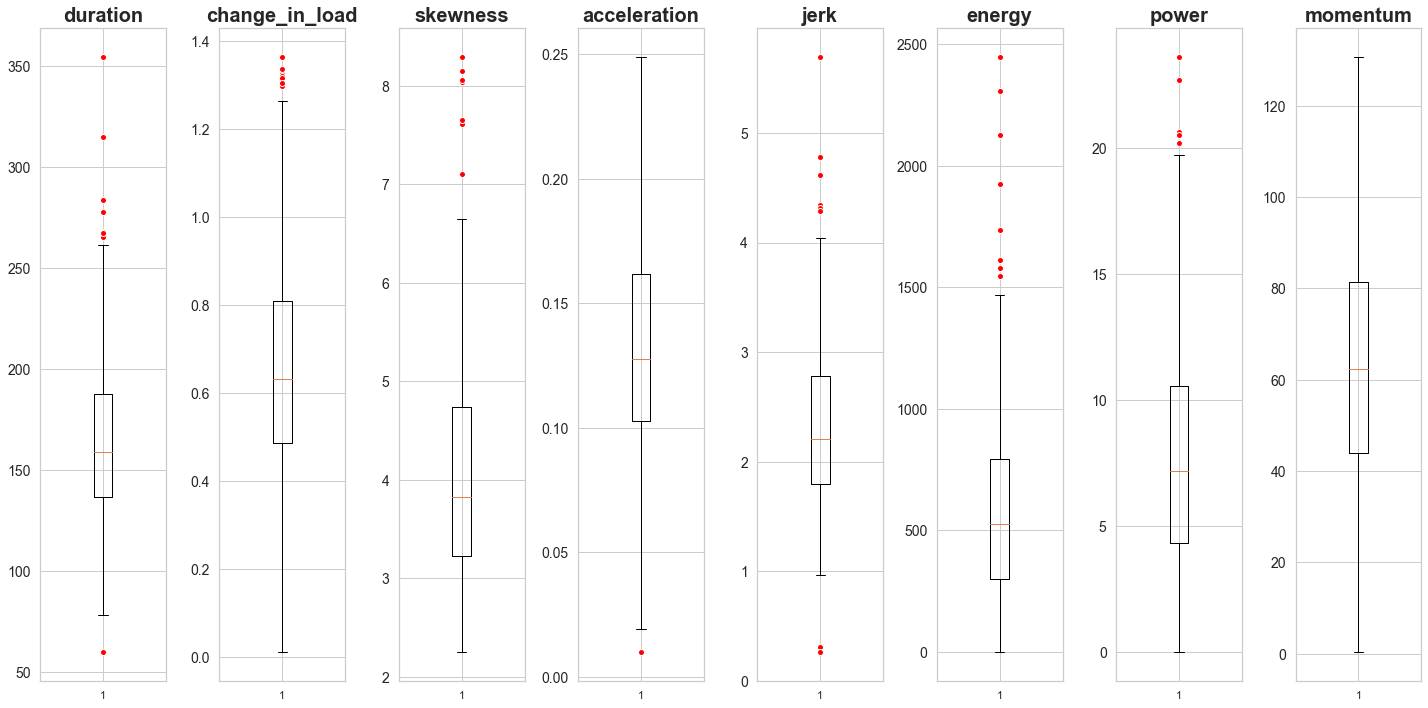

In [207]:
#Creating subplot of each column with its own scale

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(False_0_box.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(False_0_box.iloc[:,i], flierprops=red_circle)
    ax.set_title(False_0_box.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

### 2. Falsely identified as Urination (False_1)

#### Number of Rows misidentified as Urination

In [208]:
False_1 = x_test[(y_test == 0) & (y_test_pred[:].T == 1)]
False_1.shape

(61, 9)

#### Box plots of Defecation misidentified as Urination

In [209]:
False_1_box = False_1[['duration', 'change_in_load', 'skewness', 'acceleration', 'jerk', 'energy', 'power','momentum']]
False_1_box.columns

Index(['duration', 'change_in_load', 'skewness', 'acceleration', 'jerk',
       'energy', 'power', 'momentum'],
      dtype='object')

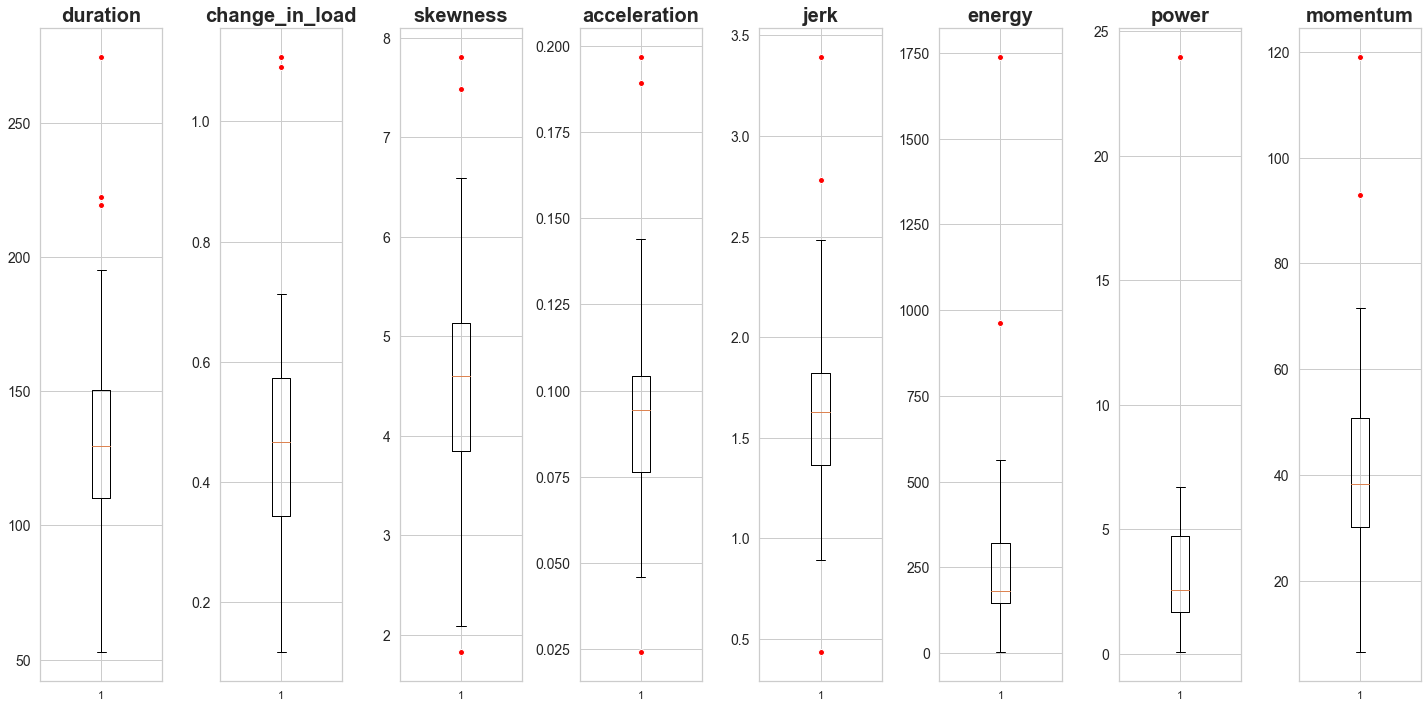

In [210]:
#Creating subplot of each column with its own scale

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(False_1_box.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(False_1_box.iloc[:,i], flierprops=red_circle)
    ax.set_title(False_1_box.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

In [211]:
False_1_box.shape

(61, 8)

### Removing 3 outlier rows from 61 rows

In [212]:
# "Change in load" 
False_1_box=False_1_box[False_1_box['change_in_load']<1]


# 'Energy' 
False_1_box=False_1_box[False_1_box['energy']<960]


False_1_box.shape

(58, 8)

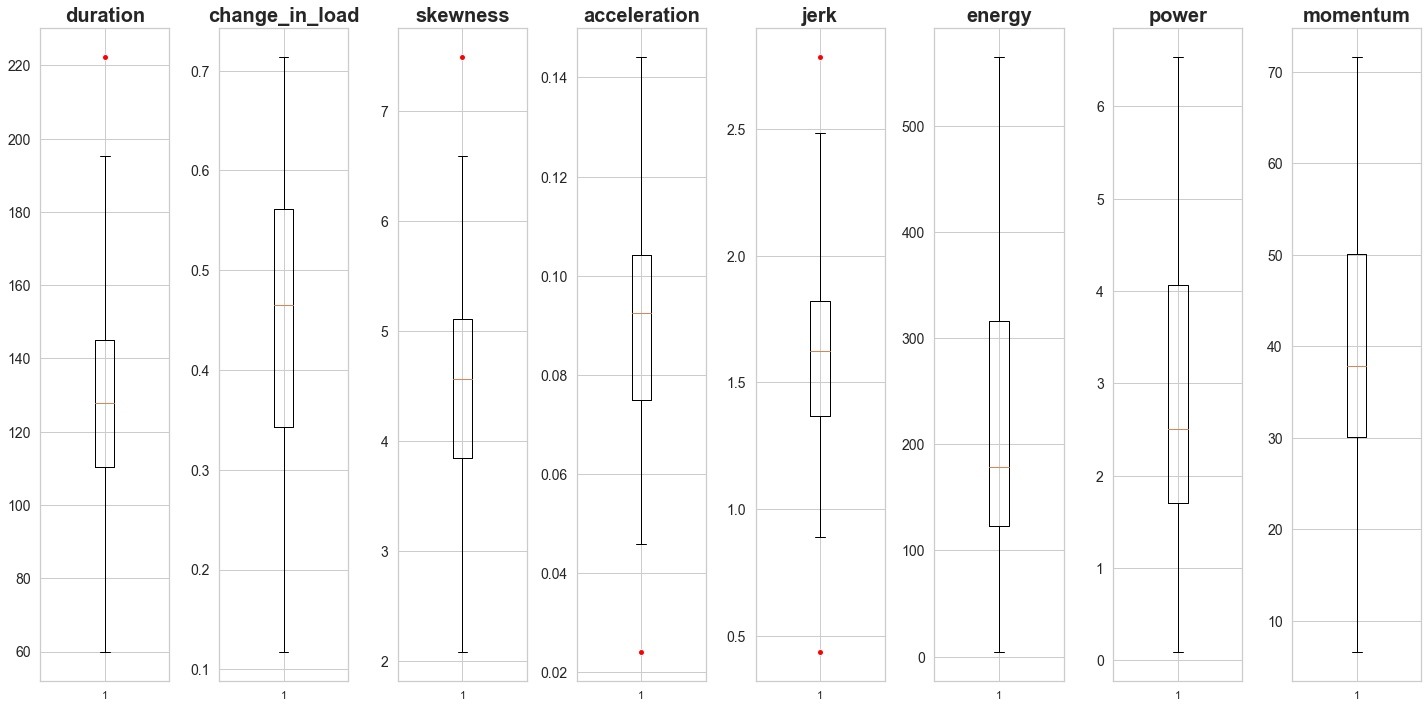

In [213]:
#Creating subplot of each column with its own scale

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(False_1_box.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(False_1_box.iloc[:,i], flierprops=red_circle)
    ax.set_title(False_1_box.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

#### Table of Feature's mean

In [214]:
# Features average value for 'Defication'
df_main_defecation=df_main[df_main['activity_urination']==0]
defecation_mean=df_main_defecation[['duration', 'change_in_load', 'median', 'skewness', 'acceleration',
       'jerk', 'energy', 'power', 'momentum']].mean()

# Features average value for 'Urination'
df_main_defecation=df_main[df_main['activity_urination']==1]
urination_mean=df_main_defecation[['duration', 'change_in_load', 'median', 'skewness', 'acceleration',
       'jerk', 'energy', 'power', 'momentum']].mean()

# Features average values for Defication misidentified as Urination
False_1=False_1[False_1['change_in_load']<1]
False_1=False_1[False_1['energy']<960]

False_1_mean=False_1[['duration', 'change_in_load', 'median', 'skewness', 'acceleration',
       'jerk', 'energy', 'power', 'momentum']].mean()

# Table of Feature's mean
data = {"Urination": urination_mean,
        "Defecation": defecation_mean,
        "Misidentified_as_urination": False_1_mean}
df_mean = pd.concat(data,axis = 1)
df_mean

Urination  Defecation  Misidentified_as_urination
duration        112.532604  165.516246                  129.734578
change_in_load    0.538491    0.755342                    0.457096
median            0.226917    0.368661                    0.115183
skewness          4.966353    4.051674                    4.548847
acceleration      0.112286    0.156251                    0.090299
jerk              1.800631    2.677805                    1.636049
energy          234.220964  828.667140                  218.698001
power             4.028411   10.859759                    2.955174
momentum         37.421950   72.144089                   40.090914

#### ( Those defecation has features value nearer to urination values are misidentified as urination )

## # Improvement of Model Performance

### # Introducing 'load/sec' and removing acceleration column to improve the performance 

In [215]:
df_main=df_main1.copy()

In [216]:
df_main=df_main[df_main['activity']!='non_elimination']
df_main.shape

(8929, 18)

In [217]:
df_main['load_change/sec']=df_main['change_in_load']/df_main['duration']
df_main['energy/sec']=df_main['energy']/df_main['duration']

In [218]:
### Data cleaning & Outlier Treatment:

# Replacing NaN Name as 'unknown'
df_main['name'].fillna('unknown',inplace=True)

# Dropping NaN Rows 
df_main.dropna(inplace=True)

# Dropping rows with weight less than 1kg and more than 8kg
df_main=df_main[(df_main['weight']>1000) & (df_main['weight']<8000)]

# Activity "duration" 
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['duration']>450))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['duration']>400))]

# "Change in load" 
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['change_in_load']>1.8))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['change_in_load']>1.5))]

# 'Variance' 
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['variance']>8))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['variance']>7))]

# 'Skewness' 
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['skewness']>10))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['skewness']>12))]

# 'Acceleration' 
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['acceleration']>0.41))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['acceleration']>0.34))]

# 'Jerk' 
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['jerk']>7))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['jerk']>5.8))]

# 'Velocity'
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['velocity']>45))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['velocity']>34))]

# 'Energy' 
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['energy']>5000))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['energy']>3000))]

# 'Power' 
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['power']>47))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['power']>27))]

# 'Momentum' 
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['momentum']>195))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['momentum']>135))]

df_main=df_main[~((df_main['activity']=='defecation') & (df_main['energy']>4500))]

df_main.shape

(8785, 20)

In [219]:
# Onehot encoding
df_main=pd.get_dummies(df_main, columns=['activity'])

# Droping non numeric columns
df_main.drop(['name', 'start_time', 'activity_defecation'],axis=1,inplace=True)

### Deleting 'kurtosis', 'variance', 'maximum', 'velocity', '0.9_quantile' columns as a result of Backward elimination in modelling
df_main.drop(['kurtosis', 'variance', 'maximum', 'velocity', '0.9_quantile', 'acceleration'], axis=1, inplace=True)

# Deleting weight columns
df_main.drop(['weight'],axis=1,inplace=True)


# Upsampling
df_majority = df_main[df_main.activity_urination==1]
df_minority = df_main[df_main.activity_urination==0]
df_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=0)
df_main = pd.concat([df_majority, df_upsampled])


# Data splitting to train, validartion and test set
df_shuffeled=df_main.sample(frac=1,random_state=101)
df_train=df_shuffeled[:int(len(df_shuffeled)*0.6)]
df_validate=df_shuffeled[int(len(df_shuffeled)*.6):int(len(df_shuffeled)*0.8)]
df_test=df_shuffeled[int(len(df_shuffeled)*0.8):]

x_train = df_train.drop(columns='activity_urination')
y_train = df_train['activity_urination']
x_validate = df_validate.drop(columns='activity_urination')
y_validate = df_validate['activity_urination']
x_test = df_test.drop(columns='activity_urination')
y_test = df_test['activity_urination']


Training
--------------------------
Accuracy %age: 99.99
ROC-AUC Score: 1.0

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3938
           1       1.00      1.00      1.00      3898

    accuracy                           1.00      7836
   macro avg       1.00      1.00      1.00      7836
weighted avg       1.00      1.00      1.00      7836


Confusion Matrix: 
[[3938    0]
 [   1 3897]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


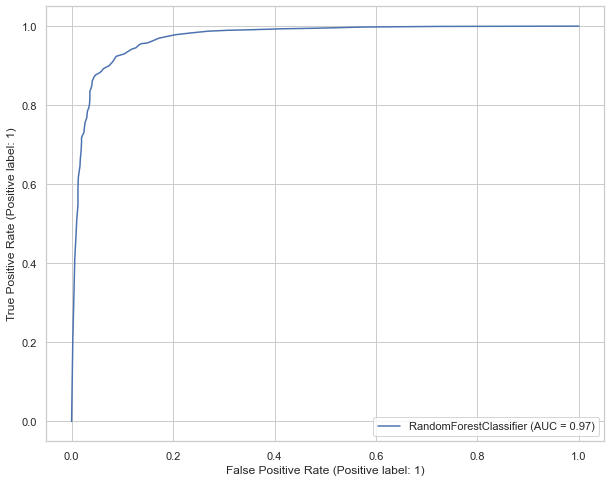


Validation
--------------------------
Accuracy %age: 91.23
ROC-AUC Score: 0.97

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1315
           1       0.96      0.86      0.91      1297

    accuracy                           0.91      2612
   macro avg       0.92      0.91      0.91      2612
weighted avg       0.92      0.91      0.91      2612


Confusion Matrix: 
[[1267   48]
 [ 181 1116]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


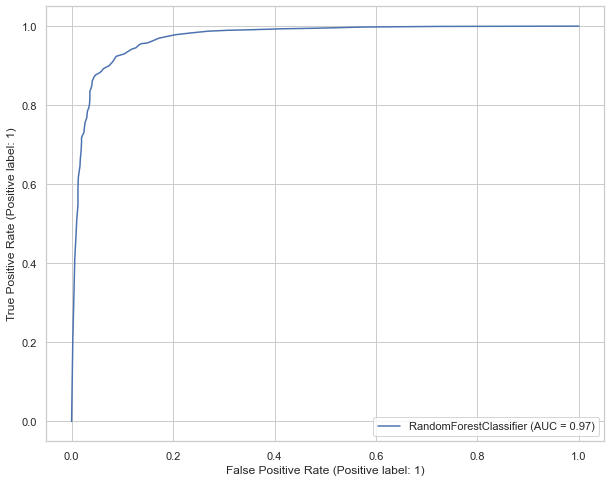


Testing
--------------------------
Accuracy %age: 91.39
ROC-AUC Score: 0.97

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1277
           1       0.95      0.88      0.91      1335

    accuracy                           0.91      2612
   macro avg       0.92      0.91      0.91      2612
weighted avg       0.92      0.91      0.91      2612


Confusion Matrix: 
[[1217   60]
 [ 165 1170]]


C:\Users\ajit.mishra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


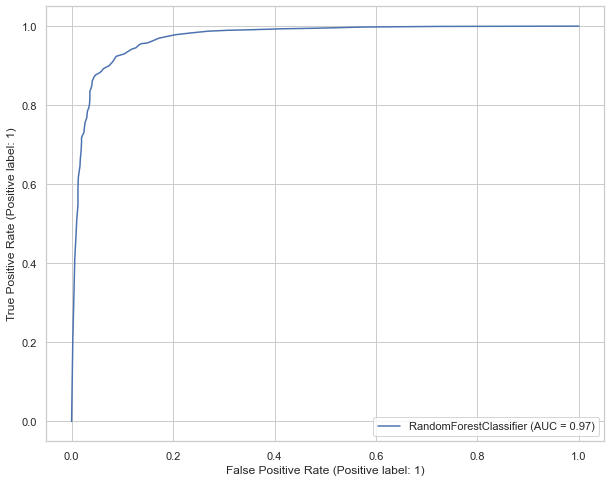

In [220]:
# Model Performance evaluation:

# For Training:
classifier = RandomForestClassifier(n_estimators=55, criterion='entropy',max_depth =35, random_state=10)
classifier.fit(x_train, y_train)
print('\nTraining\n--------------------------')
y_train_pred=classifier.predict(x_train)
error_metrics(y_train, y_train_pred, x_train)
plot_roc_curve(classifier, x_test, y_test)
plt.show()

# For Validation:
print('\nValidation\n--------------------------')
y_validate_pred=classifier.predict(x_validate)
error_metrics(y_validate, y_validate_pred, x_validate)
plot_roc_curve(classifier, x_test, y_test)
plt.show()

# For Test:
print('\nTesting\n--------------------------')
y_test_pred=classifier.predict(x_test)
error_metrics(y_test, y_test_pred, x_test)
plot_roc_curve(classifier, x_test, y_test)
plt.show()

In [221]:
df_main.columns

Index(['duration', 'change_in_load', 'median', 'skewness', 'jerk', 'energy',
       'power', 'momentum', 'load_change/sec', 'energy/sec',
       'activity_urination'],
      dtype='object')

In [222]:
# Test accuracy improved. It was 91.16 now it is 92.76
# previously False_0 (Falsely identified as defecation) was was 170 now it has decreased to 103
# previously False_1 (Falsely identified as urination) was was 61 now it has increased to 86
# But overall model performance has increased

## # Insights

### 1. Rightly identifies as Urination

In [223]:
True_1 = x_test[(y_test == 1) & (y_test_pred[:].T == 1)]
True_1.shape

(1170, 10)

In [224]:
True_1.mean()

duration           103.517693
change_in_load       0.517643
median               0.215652
skewness             5.119980
jerk                 1.698150
energy             174.311898
power                3.402449
momentum            33.044837
load_change/sec      0.005822
energy/sec           1.561510
dtype: float64

### 2. Rightly identified as defecation

In [225]:
True_0 = x_test[(y_test == 0) & (y_test_pred[:].T == 0)]
True_0.shape

(1217, 10)

In [226]:
True_0.mean()

duration           169.895269
change_in_load       0.767503
median               0.379341
skewness             4.067380
jerk                 2.726052
energy             882.585058
power               11.376915
momentum            74.422399
load_change/sec      0.004984
energy/sec           4.862633
dtype: float64

#### Mean Table of Rightly identified activities

In [227]:
df_insight = pd.DataFrame()
df_insight['Defecation'] = True_0.mean()
df_insight['Urination'] = True_1.mean()
df_insight

Defecation   Urination
duration         169.895269  103.517693
change_in_load     0.767503    0.517643
median             0.379341    0.215652
skewness           4.067380    5.119980
jerk               2.726052    1.698150
energy           882.585058  174.311898
power             11.376915    3.402449
momentum          74.422399   33.044837
load_change/sec    0.004984    0.005822
energy/sec         4.862633    1.561510